<a href="https://colab.research.google.com/github/NeuroDesk/example-notebooks/blob/main/books/functional_imaging/fmriprep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Google Colab"/>  </a>

# fMRIprep Example

Author: Steffen Bollmann

## Setup Neurodesk

In [1]:
%%capture
import os
import sys
IN_COLAB = 'google.colab' in sys.modules

if IN_COLAB:
  os.environ["LD_PRELOAD"] = "";
  os.environ["APPTAINER_BINDPATH"] = "/content,/tmp,/cvmfs"
  os.environ["MPLCONFIGDIR"] = "/content/matplotlib-mpldir"
  os.environ["LMOD_CMD"] = "/usr/share/lmod/lmod/libexec/lmod"

  !curl -J -O https://raw.githubusercontent.com/NeuroDesk/neurocommand/main/googlecolab_setup.sh
  !chmod +x googlecolab_setup.sh
  !./googlecolab_setup.sh

  os.environ["MODULEPATH"] = ':'.join(map(str, list(map(lambda x: os.path.join(os.path.abspath('/cvmfs/neurodesk.ardc.edu.au/neurodesk-modules/'), x),os.listdir('/cvmfs/neurodesk.ardc.edu.au/neurodesk-modules/')))))


In [2]:
# Output CPU information:
!cat /proc/cpuinfo | grep 'vendor' | uniq
!cat /proc/cpuinfo | grep 'model name' | uniq

vendor_id	: AuthenticAMD
model name	: AMD EPYC-Rome Processor


## Run fMRIprep

In [2]:
# load fmriprep
import lmod
import os
await lmod.load('fmriprep/24.1.0')
await lmod.list()

['fmriprep/24.1.0']

In [3]:
# Request a freesurfer license and store it in your homedirectory. This is just an exampe - please replace with your license id:
!echo "Steffen.Bollmann@cai.uq.edu.au" > ~/.license
!echo "21029" >> ~/.license
!echo "*Cqyn12sqTCxo" >> ~/.license
!echo "FSxgcvGkNR59Y" >> ~/.license

In [4]:
# download data
!datalad install https://github.com/OpenNeuroDatasets/ds000102.git
!cd ds000102 && datalad get sub-08

In [ ]:
%%bash
export SUBJECTS_DIR=$PWD/fmriprep-freesurfer-dir
export ITK_GLOBAL_DEFAULT_NUMBER_OF_THREADS=2 
export MPLCONFIGDIR=~/matplotlib-mpldir 

fmriprep ds000102/ fmriprep-output participant \
--fs-license-file ~/.license \
--output-spaces T1w MNI152NLin2009cAsym fsaverage fsnative \
--participant-label 08 \
--nprocs $ITK_GLOBAL_DEFAULT_NUMBER_OF_THREADS \
--mem 10000 \
--skip_bids_validation \
--fs-subjects-dir $SUBJECTS_DIR \
-v

2024-10-15 23:24:28,970 [ WARNING] WARNING: SOCKS support in urllib3 requires the installation of optional dependencies: specifically, PySocks.  For more information, see https://urllib3.readthedocs.io/en/latest/advanced-usage.html#socks-proxies
2024-10-15 23:24:33,274 [    INFO] Telemetry system to collect crashes and errors is enabled - thanks for your feedback!. Use option ``--notrack`` to opt out.
2024-10-15 23:24:34,028 [ WARNING] WARNING: `sentry_sdk.Hub` is deprecated and will be removed in a future major release. Please consult our 1.x to 2.x migration guide for details on how to migrate `Hub` usage to the new API: https://docs.sentry.io/platforms/python/migration/1.x-to-2.x
2024-10-15 23:24:36,548 [ WARNING] WARNING: sentry_sdk.configure_scope is deprecated and will be removed in the next major version. Please consult our migration guide to learn how to migrate to the new API: https://docs.sentry.io/platforms/python/migration/1.x-to-2.x#scope-configuring
2024-10-15 23:25:11,16

241015-23:25:18,323 nipype.workflow IMPORTANT:
	 Running fMRIPrep version 24.1.0

         License NOTICE ##################################################
         fMRIPrep 24.1.0
         Copyright The NiPreps Developers.
         
         This product includes software developed by
         the NiPreps Community (https://nipreps.org/).
         
         Portions of this software were developed at the Department of
         Psychology at Stanford University, Stanford, CA, US.
         
         This software is also distributed as a Docker container image.
         The bootstrapping file for the image ("Dockerfile") is licensed
         under the MIT License.
         
         This software may be distributed through an add-on package called
         "Docker Wrapper" that is under the BSD 3-clause License.
         #################################################################


2024-10-15 23:25:18,323 [IMPORTANT] Running fMRIPrep version 24.1.0

         License NOTICE ##################################################
         fMRIPrep 24.1.0
         Copyright The NiPreps Developers.
         
         This product includes software developed by
         the NiPreps Community (https://nipreps.org/).
         
         Portions of this software were developed at the Department of
         Psychology at Stanford University, Stanford, CA, US.
         
         This software is also distributed as a Docker container image.
         The bootstrapping file for the image ("Dockerfile") is licensed
         under the MIT License.
         
         This software may be distributed through an add-on package called
         "Docker Wrapper" that is under the BSD 3-clause License.
         #################################################################


241015-23:25:18,365 nipype.workflow IMPORTANT:
	 Building fMRIPrep's workflow:
           * BIDS dataset path: /home/jovyan/example-notebooks/books/functional_imaging/ds000102.
           * Participant list: ['08'].
           * Run identifier: 20241015-232429_15780f30-1c17-4b2e-8c7c-502ef33980db.
           * Output spaces: T1w MNI152NLin2009cAsym:res-native fsaverage:den-164k fsnative.
           * Pre-run FreeSurfer's SUBJECTS_DIR: /home/jovyan/example-notebooks/books/functional_imaging/fmriprep-freesurfer-dir.


2024-10-15 23:25:18,365 [IMPORTANT] Building fMRIPrep's workflow:
           * BIDS dataset path: /home/jovyan/example-notebooks/books/functional_imaging/ds000102.
           * Participant list: ['08'].
           * Run identifier: 20241015-232429_15780f30-1c17-4b2e-8c7c-502ef33980db.
           * Output spaces: T1w MNI152NLin2009cAsym:res-native fsaverage:den-164k fsnative.
           * Pre-run FreeSurfer's SUBJECTS_DIR: /home/jovyan/example-notebooks/books/functional_imaging/fmriprep-freesurfer-dir.


241015-23:25:20,373 nipype.workflow INFO:
	 ANAT Stage 1: Adding template workflow


2024-10-15 23:25:20,373 [    INFO] ANAT Stage 1: Adding template workflow
2024-10-15 23:25:22,541 [ WARNING] WARNING: 'locale.getdefaultlocale' is deprecated and slated for removal in Python 3.15. Use setlocale(), getencoding() and getlocale() instead.
2024-10-15 23:25:22,542 [ WARNING] WARNING: 'locale.getdefaultlocale' is deprecated and slated for removal in Python 3.15. Use setlocale(), getencoding() and getlocale() instead.


241015-23:25:23,18 nipype.workflow INFO:
	 ANAT Stage 2: Preparing brain extraction workflow


2024-10-15 23:25:23,018 [    INFO] ANAT Stage 2: Preparing brain extraction workflow


241015-23:25:23,262 nipype.workflow INFO:
	 ANAT Stage 3: Preparing segmentation workflow


2024-10-15 23:25:23,262 [    INFO] ANAT Stage 3: Preparing segmentation workflow


241015-23:25:23,279 nipype.workflow INFO:
	 ANAT Stage 4: Preparing normalization workflow for ['MNI152NLin2009cAsym']


2024-10-15 23:25:23,279 [    INFO] ANAT Stage 4: Preparing normalization workflow for ['MNI152NLin2009cAsym']


241015-23:25:23,308 nipype.workflow INFO:
	 ANAT Stage 5: Preparing surface reconstruction workflow


2024-10-15 23:25:23,308 [    INFO] ANAT Stage 5: Preparing surface reconstruction workflow


241015-23:25:23,362 nipype.workflow INFO:
	 ANAT Stage 6: Preparing mask refinement workflow


2024-10-15 23:25:23,362 [    INFO] ANAT Stage 6: Preparing mask refinement workflow


241015-23:25:23,367 nipype.workflow INFO:
	 ANAT No T2w images provided - skipping Stage 7


2024-10-15 23:25:23,367 [    INFO] ANAT No T2w images provided - skipping Stage 7
2024-10-15 23:25:23,367 [    INFO] ANAT Stage 8: Creating GIFTI surfaces for ['white', 'pial', 'midthickness', 'sphere_reg', 'sphere']


241015-23:25:23,367 nipype.workflow INFO:
	 ANAT Stage 8: Creating GIFTI surfaces for ['white', 'pial', 'midthickness', 'sphere_reg', 'sphere']
241015-23:25:23,408 nipype.workflow INFO:
	 ANAT Stage 8: Creating GIFTI metrics for ['thickness', 'sulc']


2024-10-15 23:25:23,408 [    INFO] ANAT Stage 8: Creating GIFTI metrics for ['thickness', 'sulc']


241015-23:25:23,425 nipype.workflow INFO:
	 ANAT Stage 8a: Creating cortical ribbon mask


2024-10-15 23:25:23,425 [    INFO] ANAT Stage 8a: Creating cortical ribbon mask


241015-23:25:23,434 nipype.workflow INFO:
	 ANAT Stage 9: Creating fsLR registration sphere


2024-10-15 23:25:23,434 [    INFO] ANAT Stage 9: Creating fsLR registration sphere


241015-23:25:23,450 nipype.workflow INFO:
	 ANAT Stage 10: Creating MSM-Sulc registration sphere


2024-10-15 23:25:23,450 [    INFO] ANAT Stage 10: Creating MSM-Sulc registration sphere


241015-23:25:23,947 nipype.workflow INFO:
	 No single-band-reference found for sub-08_task-flanker_run-1_bold.nii.gz.


2024-10-15 23:25:23,947 [    INFO] No single-band-reference found for sub-08_task-flanker_run-1_bold.nii.gz.


241015-23:25:24,223 nipype.workflow INFO:
	 Stage 1: Adding HMC boldref workflow


2024-10-15 23:25:24,223 [    INFO] Stage 1: Adding HMC boldref workflow


241015-23:25:24,250 nipype.workflow INFO:
	 Stage 2: Adding motion correction workflow


2024-10-15 23:25:24,250 [    INFO] Stage 2: Adding motion correction workflow


241015-23:25:24,288 nipype.workflow INFO:
	 Stage 3: Adding coregistration boldref workflow


2024-10-15 23:25:24,288 [    INFO] Stage 3: Adding coregistration boldref workflow
2024-10-15 23:25:24,290 [ WARNING] WARNING: niworkflows.interfaces.nibabel.BinaryDilation is deprecated in favor of
niworkflows.interfaces.morphology.BinaryDilation. Please validate that
interface for your use case and switch.



241015-23:25:24,753 nipype.workflow INFO:
	 No single-band-reference found for sub-08_task-flanker_run-2_bold.nii.gz.


2024-10-15 23:25:24,753 [    INFO] No single-band-reference found for sub-08_task-flanker_run-2_bold.nii.gz.


241015-23:25:24,858 nipype.workflow INFO:
	 Stage 1: Adding HMC boldref workflow


2024-10-15 23:25:24,858 [    INFO] Stage 1: Adding HMC boldref workflow


241015-23:25:24,871 nipype.workflow INFO:
	 Stage 2: Adding motion correction workflow


2024-10-15 23:25:24,871 [    INFO] Stage 2: Adding motion correction workflow


241015-23:25:24,882 nipype.workflow INFO:
	 Stage 3: Adding coregistration boldref workflow


2024-10-15 23:25:24,882 [    INFO] Stage 3: Adding coregistration boldref workflow
2024-10-15 23:25:24,884 [ WARNING] WARNING: niworkflows.interfaces.nibabel.BinaryDilation is deprecated in favor of
niworkflows.interfaces.morphology.BinaryDilation. Please validate that
interface for your use case and switch.

2024-10-15 23:25:31,379 [ WARNING] WARNING: SOCKS support in urllib3 requires the installation of optional dependencies: specifically, PySocks.  For more information, see https://urllib3.readthedocs.io/en/latest/advanced-usage.html#socks-proxies
2024-10-15 23:25:31,720 [ WARNING] WARNING: Niworkflows will be deprecating reporting in favor of a standalone library "nireports".
2024-10-15 23:25:31,888 [ WARNING] WARNING: Niworkflows will be deprecating visualizations in favor of a standalone library "nireports".


241015-23:25:33,142 nipype.workflow INFO:
	 fMRIPrep workflow graph with 580 nodes built successfully.


2024-10-15 23:25:33,142 [    INFO] fMRIPrep workflow graph with 580 nodes built successfully.
2024-10-15 23:25:39,386 [ WARNING] WARNING: Niworkflows will be deprecating reporting in favor of a standalone library "nireports".
2024-10-15 23:25:39,580 [ WARNING] WARNING: Niworkflows will be deprecating visualizations in favor of a standalone library "nireports".
2024-10-15 23:25:59,298 [ WARNING] WARNING: SOCKS support in urllib3 requires the installation of optional dependencies: specifically, PySocks.  For more information, see https://urllib3.readthedocs.io/en/latest/advanced-usage.html#socks-proxies
2024-10-15 23:25:59,614 [ WARNING] WARNING: Niworkflows will be deprecating reporting in favor of a standalone library "nireports".
2024-10-15 23:25:59,770 [ WARNING] WARNING: Niworkflows will be deprecating visualizations in favor of a standalone library "nireports".
2024-10-15 23:26:05,628 [ WARNING] WARNING: sentry_sdk.configure_scope is deprecated and will be removed in the next major

241015-23:26:06,865 nipype.workflow IMPORTANT:
	 fMRIPrep started!


2024-10-15 23:26:06,865 [IMPORTANT] fMRIPrep started!


241015-23:26:09,448 nipype.workflow INFO:
	 Workflow fmriprep_24_1_wf settings: ['check', 'execution', 'logging', 'monitoring']


2024-10-15 23:26:09,448 [    INFO] Workflow fmriprep_24_1_wf settings: ['check', 'execution', 'logging', 'monitoring']


241015-23:26:10,0 nipype.workflow INFO:
	 Running in parallel.


2024-10-15 23:26:10,000 [    INFO] Running in parallel.


241015-23:26:10,4 nipype.workflow WARNING:
	 Some nodes exceed the total amount of memory available (10.00GB).


2024-10-15 23:26:10,004 [ WARNING] Some nodes exceed the total amount of memory available (10.00GB).


241015-23:26:10,19 nipype.workflow INFO:
	 [MultiProc] Running 0 tasks, and 21 jobs ready. Free memory (GB): 10.00/10.00, Free processors: 2/2.


2024-10-15 23:26:10,019 [    INFO] [MultiProc] Running 0 tasks, and 21 jobs ready. Free memory (GB): 10.00/10.00, Free processors: 2/2.


241015-23:26:10,374 nipype.workflow INFO:
	 [Node] Setting-up "fmriprep_24_1_wf.fsdir_run_20241015_232429_15780f30_1c17_4b2e_8c7c_502ef33980db" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/fsdir_run_20241015_232429_15780f30_1c17_4b2e_8c7c_502ef33980db".


2024-10-15 23:26:10,374 [    INFO] [Node] Setting-up "fmriprep_24_1_wf.fsdir_run_20241015_232429_15780f30_1c17_4b2e_8c7c_502ef33980db" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/fsdir_run_20241015_232429_15780f30_1c17_4b2e_8c7c_502ef33980db".


241015-23:26:10,377 nipype.workflow INFO:
	 [Node] Executing "fsdir_run_20241015_232429_15780f30_1c17_4b2e_8c7c_502ef33980db" <niworkflows.interfaces.bids.BIDSFreeSurferDir>


2024-10-15 23:26:10,377 [    INFO] [Node] Executing "fsdir_run_20241015_232429_15780f30_1c17_4b2e_8c7c_502ef33980db" <niworkflows.interfaces.bids.BIDSFreeSurferDir>


241015-23:26:13,148 nipype.workflow INFO:
	 [Node] Finished "fsdir_run_20241015_232429_15780f30_1c17_4b2e_8c7c_502ef33980db", elapsed time 2.762988s.


2024-10-15 23:26:13,148 [    INFO] [Node] Finished "fsdir_run_20241015_232429_15780f30_1c17_4b2e_8c7c_502ef33980db", elapsed time 2.762988s.


241015-23:26:13,152 nipype.workflow INFO:
	 [Job 0] Completed (fmriprep_24_1_wf.fsdir_run_20241015_232429_15780f30_1c17_4b2e_8c7c_502ef33980db).


2024-10-15 23:26:13,152 [    INFO] [Job 0] Completed (fmriprep_24_1_wf.fsdir_run_20241015_232429_15780f30_1c17_4b2e_8c7c_502ef33980db).


241015-23:26:13,471 nipype.workflow INFO:
	 [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.about" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/about".


2024-10-15 23:26:13,471 [    INFO] [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.about" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/about".


241015-23:26:13,477 nipype.workflow INFO:
	 [Node] Executing "about" <fmriprep.interfaces.reports.AboutSummary>


2024-10-15 23:26:13,477 [    INFO] [Node] Executing "about" <fmriprep.interfaces.reports.AboutSummary>


241015-23:26:13,478 nipype.workflow INFO:
	 [Node] Finished "about", elapsed time 0.000432s.


2024-10-15 23:26:13,478 [    INFO] [Node] Finished "about", elapsed time 0.000432s.


241015-23:26:13,481 nipype.workflow INFO:
	 [Job 2] Completed (fmriprep_24_1_wf.sub_08_wf.about).


2024-10-15 23:26:13,481 [    INFO] [Job 2] Completed (fmriprep_24_1_wf.sub_08_wf.about).


241015-23:26:13,838 nipype.workflow INFO:
	 [MultiProc] Running 2 tasks, and 17 jobs ready. Free memory (GB): 9.60/10.00, Free processors: 0/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.brain_extraction_wf.res_tmpl
                       * fmriprep_24_1_wf.sub_08_wf.bidssrc


2024-10-15 23:26:13,838 [    INFO] [MultiProc] Running 2 tasks, and 17 jobs ready. Free memory (GB): 9.60/10.00, Free processors: 0/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.brain_extraction_wf.res_tmpl
                       * fmriprep_24_1_wf.sub_08_wf.bidssrc


241015-23:26:20,232 nipype.workflow INFO:
	 [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.brain_extraction_wf.res_tmpl" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/anat_fit_wf/brain_extraction_wf/res_tmpl".


2024-10-15 23:26:20,232 [    INFO] [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.brain_extraction_wf.res_tmpl" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/anat_fit_wf/brain_extraction_wf/res_tmpl".


241015-23:26:20,237 nipype.workflow INFO:
	 [Node] Executing "res_tmpl" <niworkflows.interfaces.nibabel.RegridToZooms>


2024-10-15 23:26:20,237 [    INFO] [Node] Executing "res_tmpl" <niworkflows.interfaces.nibabel.RegridToZooms>


241015-23:26:21,277 nipype.workflow INFO:
	 [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.bidssrc" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/bidssrc".


2024-10-15 23:26:21,277 [    INFO] [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.bidssrc" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/bidssrc".


241015-23:26:21,279 nipype.workflow INFO:
	 [Node] Executing "bidssrc" <niworkflows.interfaces.bids.BIDSDataGrabber>


2024-10-15 23:26:21,279 [    INFO] [Node] Executing "bidssrc" <niworkflows.interfaces.bids.BIDSDataGrabber>


241015-23:26:21,287 nipype.interface INFO:
	 No "t2w" images found for sub-08
241015-23:26:21,287 nipype.interface INFO:
	 No "flair" images found for sub-08
241015-23:26:21,287 nipype.interface INFO:
	 No "fmap" images found for sub-08
241015-23:26:21,287 nipype.interface INFO:
	 No "sbref" images found for sub-08
241015-23:26:21,287 nipype.interface INFO:
	 No "roi" images found for sub-08
241015-23:26:21,287 nipype.interface INFO:
	 No "pet" images found for sub-08
241015-23:26:21,287 nipype.interface INFO:
	 No "asl" images found for sub-08


2024-10-15 23:26:21,287 [    INFO] No "t2w" images found for sub-08
2024-10-15 23:26:21,287 [    INFO] No "flair" images found for sub-08
2024-10-15 23:26:21,287 [    INFO] No "fmap" images found for sub-08
2024-10-15 23:26:21,287 [    INFO] No "sbref" images found for sub-08
2024-10-15 23:26:21,287 [    INFO] No "roi" images found for sub-08
2024-10-15 23:26:21,287 [    INFO] No "pet" images found for sub-08
2024-10-15 23:26:21,287 [    INFO] No "asl" images found for sub-08


241015-23:26:21,288 nipype.workflow INFO:
	 [Node] Finished "bidssrc", elapsed time 0.000749s.


2024-10-15 23:26:21,288 [    INFO] [Node] Finished "bidssrc", elapsed time 0.000749s.


241015-23:26:21,839 nipype.workflow INFO:
	 [Job 1] Completed (fmriprep_24_1_wf.sub_08_wf.bidssrc).


2024-10-15 23:26:21,839 [    INFO] [Job 1] Completed (fmriprep_24_1_wf.sub_08_wf.bidssrc).


241015-23:26:21,844 nipype.workflow INFO:
	 [MultiProc] Running 1 tasks, and 20 jobs ready. Free memory (GB): 9.80/10.00, Free processors: 1/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.brain_extraction_wf.res_tmpl


2024-10-15 23:26:21,844 [    INFO] [MultiProc] Running 1 tasks, and 20 jobs ready. Free memory (GB): 9.80/10.00, Free processors: 1/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.brain_extraction_wf.res_tmpl


241015-23:26:22,134 nipype.workflow INFO:
	 [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.brain_extraction_wf.full_wm" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/anat_fit_wf/brain_extraction_wf/full_wm".


2024-10-15 23:26:22,134 [    INFO] [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.brain_extraction_wf.full_wm" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/anat_fit_wf/brain_extraction_wf/full_wm".


241015-23:26:22,138 nipype.workflow INFO:
	 [Node] Executing "full_wm" <nipype.interfaces.utility.wrappers.Function>


2024-10-15 23:26:22,138 [    INFO] [Node] Executing "full_wm" <nipype.interfaces.utility.wrappers.Function>


241015-23:26:23,49 nipype.workflow INFO:
	 [Node] Finished "res_tmpl", elapsed time 2.804299s.


2024-10-15 23:26:23,049 [    INFO] [Node] Finished "res_tmpl", elapsed time 2.804299s.


241015-23:26:23,236 nipype.workflow INFO:
	 [Node] Finished "full_wm", elapsed time 1.097074s.


2024-10-15 23:26:23,236 [    INFO] [Node] Finished "full_wm", elapsed time 1.097074s.


241015-23:26:23,839 nipype.workflow INFO:
	 [Job 3] Completed (fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.brain_extraction_wf.res_tmpl).


2024-10-15 23:26:23,839 [    INFO] [Job 3] Completed (fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.brain_extraction_wf.res_tmpl).


241015-23:26:23,842 nipype.workflow INFO:
	 [Job 4] Completed (fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.brain_extraction_wf.full_wm).


2024-10-15 23:26:23,842 [    INFO] [Job 4] Completed (fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.brain_extraction_wf.full_wm).


241015-23:26:23,845 nipype.workflow INFO:
	 [MultiProc] Running 0 tasks, and 19 jobs ready. Free memory (GB): 10.00/10.00, Free processors: 2/2.


2024-10-15 23:26:23,845 [    INFO] [MultiProc] Running 0 tasks, and 19 jobs ready. Free memory (GB): 10.00/10.00, Free processors: 2/2.


241015-23:26:24,185 nipype.workflow INFO:
	 [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_1_wf.bold_fit_wf.hmc_boldref_wf.val_bold" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/bold_task_flanker_run_1_wf/bold_fit_wf/hmc_boldref_wf/val_bold".


2024-10-15 23:26:24,185 [    INFO] [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_1_wf.bold_fit_wf.hmc_boldref_wf.val_bold" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/bold_task_flanker_run_1_wf/bold_fit_wf/hmc_boldref_wf/val_bold".


241015-23:26:24,188 nipype.workflow INFO:
	 [Node] Executing "val_bold" <niworkflows.interfaces.header.ValidateImage>


2024-10-15 23:26:24,188 [    INFO] [Node] Executing "val_bold" <niworkflows.interfaces.header.ValidateImage>


241015-23:26:24,277 nipype.workflow INFO:
	 [Node] Finished "val_bold", elapsed time 0.08823s.


2024-10-15 23:26:24,277 [    INFO] [Node] Finished "val_bold", elapsed time 0.08823s.


241015-23:26:24,329 nipype.workflow INFO:
	 [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.brain_extraction_wf.lap_tmpl" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/anat_fit_wf/brain_extraction_wf/lap_tmpl".


2024-10-15 23:26:24,329 [    INFO] [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.brain_extraction_wf.lap_tmpl" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/anat_fit_wf/brain_extraction_wf/lap_tmpl".


241015-23:26:24,331 nipype.workflow INFO:
	 [Node] Executing "lap_tmpl" <nipype.interfaces.ants.utils.ImageMath>


2024-10-15 23:26:24,331 [    INFO] [Node] Executing "lap_tmpl" <nipype.interfaces.ants.utils.ImageMath>
2024-10-15 23:26:24,583 [ WARNING] WARNING: 'locale.getdefaultlocale' is deprecated and slated for removal in Python 3.15. Use setlocale(), getencoding() and getlocale() instead.
2024-10-15 23:26:24,584 [ WARNING] WARNING: 'locale.getdefaultlocale' is deprecated and slated for removal in Python 3.15. Use setlocale(), getencoding() and getlocale() instead.


241015-23:26:25,841 nipype.workflow INFO:
	 [Job 6] Completed (fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_1_wf.bold_fit_wf.hmc_boldref_wf.val_bold).


2024-10-15 23:26:25,841 [    INFO] [Job 6] Completed (fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_1_wf.bold_fit_wf.hmc_boldref_wf.val_bold).


241015-23:26:25,845 nipype.workflow INFO:
	 [MultiProc] Running 1 tasks, and 18 jobs ready. Free memory (GB): 9.80/10.00, Free processors: 1/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.brain_extraction_wf.lap_tmpl


2024-10-15 23:26:25,845 [    INFO] [MultiProc] Running 1 tasks, and 18 jobs ready. Free memory (GB): 9.80/10.00, Free processors: 1/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.brain_extraction_wf.lap_tmpl


241015-23:26:26,174 nipype.workflow INFO:
	 [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_1_wf.bold_fit_wf.hmc_boldref_wf.get_dummy" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/bold_task_flanker_run_1_wf/bold_fit_wf/hmc_boldref_wf/get_dummy".


2024-10-15 23:26:26,174 [    INFO] [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_1_wf.bold_fit_wf.hmc_boldref_wf.get_dummy" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/bold_task_flanker_run_1_wf/bold_fit_wf/hmc_boldref_wf/get_dummy".


241015-23:26:26,177 nipype.workflow INFO:
	 [Node] Executing "get_dummy" <niworkflows.interfaces.bold.NonsteadyStatesDetector>


2024-10-15 23:26:26,177 [    INFO] [Node] Executing "get_dummy" <niworkflows.interfaces.bold.NonsteadyStatesDetector>


241015-23:26:27,283 nipype.workflow INFO:
	 [Node] Finished "get_dummy", elapsed time 1.104616s.


2024-10-15 23:26:27,283 [    INFO] [Node] Finished "get_dummy", elapsed time 1.104616s.


241015-23:26:27,841 nipype.workflow INFO:
	 [Job 7] Completed (fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_1_wf.bold_fit_wf.hmc_boldref_wf.get_dummy).


2024-10-15 23:26:27,841 [    INFO] [Job 7] Completed (fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_1_wf.bold_fit_wf.hmc_boldref_wf.get_dummy).


241015-23:26:27,845 nipype.workflow INFO:
	 [MultiProc] Running 1 tasks, and 19 jobs ready. Free memory (GB): 9.80/10.00, Free processors: 1/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.brain_extraction_wf.lap_tmpl


2024-10-15 23:26:27,845 [    INFO] [MultiProc] Running 1 tasks, and 19 jobs ready. Free memory (GB): 9.80/10.00, Free processors: 1/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.brain_extraction_wf.lap_tmpl


241015-23:26:28,139 nipype.workflow INFO:
	 [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_1_wf.bold_fit_wf.ds_hmc_boldref_wf.sources" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/bold_task_flanker_run_1_wf/bold_fit_wf/ds_hmc_boldref_wf/sources".


2024-10-15 23:26:28,139 [    INFO] [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_1_wf.bold_fit_wf.ds_hmc_boldref_wf.sources" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/bold_task_flanker_run_1_wf/bold_fit_wf/ds_hmc_boldref_wf/sources".


241015-23:26:28,142 nipype.workflow INFO:
	 [Node] Executing "sources" <fmriprep.interfaces.bids.BIDSURI>


2024-10-15 23:26:28,142 [    INFO] [Node] Executing "sources" <fmriprep.interfaces.bids.BIDSURI>


241015-23:26:28,143 nipype.workflow INFO:
	 [Node] Finished "sources", elapsed time 0.000407s.


2024-10-15 23:26:28,143 [    INFO] [Node] Finished "sources", elapsed time 0.000407s.


241015-23:26:29,841 nipype.workflow INFO:
	 [Job 8] Completed (fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_1_wf.bold_fit_wf.ds_hmc_boldref_wf.sources).


2024-10-15 23:26:29,841 [    INFO] [Job 8] Completed (fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_1_wf.bold_fit_wf.ds_hmc_boldref_wf.sources).


241015-23:26:29,846 nipype.workflow INFO:
	 [MultiProc] Running 1 tasks, and 18 jobs ready. Free memory (GB): 9.80/10.00, Free processors: 1/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.brain_extraction_wf.lap_tmpl


2024-10-15 23:26:29,846 [    INFO] [MultiProc] Running 1 tasks, and 18 jobs ready. Free memory (GB): 9.80/10.00, Free processors: 1/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.brain_extraction_wf.lap_tmpl


241015-23:26:30,213 nipype.workflow INFO:
	 [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_1_wf.bold_fit_wf.ds_hmc_wf.sources" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/bold_task_flanker_run_1_wf/bold_fit_wf/ds_hmc_wf/sources".


2024-10-15 23:26:30,213 [    INFO] [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_1_wf.bold_fit_wf.ds_hmc_wf.sources" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/bold_task_flanker_run_1_wf/bold_fit_wf/ds_hmc_wf/sources".


241015-23:26:30,218 nipype.workflow INFO:
	 [Node] Executing "sources" <fmriprep.interfaces.bids.BIDSURI>


2024-10-15 23:26:30,218 [    INFO] [Node] Executing "sources" <fmriprep.interfaces.bids.BIDSURI>


241015-23:26:30,220 nipype.workflow INFO:
	 [Node] Finished "sources", elapsed time 0.000599s.


2024-10-15 23:26:30,220 [    INFO] [Node] Finished "sources", elapsed time 0.000599s.


241015-23:26:31,842 nipype.workflow INFO:
	 [Job 9] Completed (fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_1_wf.bold_fit_wf.ds_hmc_wf.sources).


2024-10-15 23:26:31,842 [    INFO] [Job 9] Completed (fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_1_wf.bold_fit_wf.ds_hmc_wf.sources).


241015-23:26:31,847 nipype.workflow INFO:
	 [MultiProc] Running 1 tasks, and 17 jobs ready. Free memory (GB): 9.80/10.00, Free processors: 1/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.brain_extraction_wf.lap_tmpl


2024-10-15 23:26:31,847 [    INFO] [MultiProc] Running 1 tasks, and 17 jobs ready. Free memory (GB): 9.80/10.00, Free processors: 1/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.brain_extraction_wf.lap_tmpl


241015-23:26:32,191 nipype.workflow INFO:
	 [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_1_wf.bold_fit_wf.ds_boldmask_wf.sources" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/bold_task_flanker_run_1_wf/bold_fit_wf/ds_boldmask_wf/sources".


2024-10-15 23:26:32,191 [    INFO] [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_1_wf.bold_fit_wf.ds_boldmask_wf.sources" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/bold_task_flanker_run_1_wf/bold_fit_wf/ds_boldmask_wf/sources".


241015-23:26:32,196 nipype.workflow INFO:
	 [Node] Executing "sources" <fmriprep.interfaces.bids.BIDSURI>


2024-10-15 23:26:32,196 [    INFO] [Node] Executing "sources" <fmriprep.interfaces.bids.BIDSURI>


241015-23:26:32,198 nipype.workflow INFO:
	 [Node] Finished "sources", elapsed time 0.000971s.


2024-10-15 23:26:32,198 [    INFO] [Node] Finished "sources", elapsed time 0.000971s.


241015-23:26:33,841 nipype.workflow INFO:
	 [Job 10] Completed (fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_1_wf.bold_fit_wf.ds_boldmask_wf.sources).


2024-10-15 23:26:33,841 [    INFO] [Job 10] Completed (fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_1_wf.bold_fit_wf.ds_boldmask_wf.sources).


241015-23:26:33,845 nipype.workflow INFO:
	 [MultiProc] Running 1 tasks, and 16 jobs ready. Free memory (GB): 9.80/10.00, Free processors: 1/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.brain_extraction_wf.lap_tmpl


2024-10-15 23:26:33,845 [    INFO] [MultiProc] Running 1 tasks, and 16 jobs ready. Free memory (GB): 9.80/10.00, Free processors: 1/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.brain_extraction_wf.lap_tmpl


241015-23:26:34,169 nipype.workflow INFO:
	 [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_1_wf.bold_native_wf.bold_source" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/bold_task_flanker_run_1_wf/bold_native_wf/bold_source".


2024-10-15 23:26:34,169 [    INFO] [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_1_wf.bold_native_wf.bold_source" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/bold_task_flanker_run_1_wf/bold_native_wf/bold_source".


241015-23:26:34,172 nipype.workflow INFO:
	 [Node] Executing "bold_source" <nipype.interfaces.utility.base.Select>


2024-10-15 23:26:34,172 [    INFO] [Node] Executing "bold_source" <nipype.interfaces.utility.base.Select>


241015-23:26:34,173 nipype.workflow INFO:
	 [Node] Finished "bold_source", elapsed time 0.000436s.


2024-10-15 23:26:34,173 [    INFO] [Node] Finished "bold_source", elapsed time 0.000436s.
2024-10-15 23:26:34,751 [ WARNING] WARNING: 'locale.getdefaultlocale' is deprecated and slated for removal in Python 3.15. Use setlocale(), getencoding() and getlocale() instead.
2024-10-15 23:26:34,752 [ WARNING] WARNING: 'locale.getdefaultlocale' is deprecated and slated for removal in Python 3.15. Use setlocale(), getencoding() and getlocale() instead.


241015-23:26:35,843 nipype.workflow INFO:
	 [Job 11] Completed (fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_1_wf.bold_native_wf.bold_source).


2024-10-15 23:26:35,843 [    INFO] [Job 11] Completed (fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_1_wf.bold_native_wf.bold_source).


241015-23:26:35,847 nipype.workflow INFO:
	 [MultiProc] Running 1 tasks, and 16 jobs ready. Free memory (GB): 9.80/10.00, Free processors: 1/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.brain_extraction_wf.lap_tmpl


2024-10-15 23:26:35,847 [    INFO] [MultiProc] Running 1 tasks, and 16 jobs ready. Free memory (GB): 9.80/10.00, Free processors: 1/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.brain_extraction_wf.lap_tmpl


241015-23:26:36,217 nipype.workflow INFO:
	 [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_2_wf.bold_fit_wf.hmc_boldref_wf.val_bold" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/bold_task_flanker_run_2_wf/bold_fit_wf/hmc_boldref_wf/val_bold".


2024-10-15 23:26:36,217 [    INFO] [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_2_wf.bold_fit_wf.hmc_boldref_wf.val_bold" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/bold_task_flanker_run_2_wf/bold_fit_wf/hmc_boldref_wf/val_bold".


241015-23:26:36,220 nipype.workflow INFO:
	 [Node] Executing "val_bold" <niworkflows.interfaces.header.ValidateImage>


2024-10-15 23:26:36,220 [    INFO] [Node] Executing "val_bold" <niworkflows.interfaces.header.ValidateImage>


241015-23:26:36,310 nipype.workflow INFO:
	 [Node] Finished "val_bold", elapsed time 0.089257s.


2024-10-15 23:26:36,310 [    INFO] [Node] Finished "val_bold", elapsed time 0.089257s.


241015-23:26:37,529 nipype.workflow INFO:
	 [Node] Finished "lap_tmpl", elapsed time 12.835325s.


2024-10-15 23:26:37,529 [    INFO] [Node] Finished "lap_tmpl", elapsed time 12.835325s.


241015-23:26:37,843 nipype.workflow INFO:
	 [Job 5] Completed (fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.brain_extraction_wf.lap_tmpl).


2024-10-15 23:26:37,843 [    INFO] [Job 5] Completed (fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.brain_extraction_wf.lap_tmpl).


241015-23:26:37,846 nipype.workflow INFO:
	 [Job 12] Completed (fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_2_wf.bold_fit_wf.hmc_boldref_wf.val_bold).


2024-10-15 23:26:37,846 [    INFO] [Job 12] Completed (fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_2_wf.bold_fit_wf.hmc_boldref_wf.val_bold).


241015-23:26:37,849 nipype.workflow INFO:
	 [MultiProc] Running 0 tasks, and 17 jobs ready. Free memory (GB): 10.00/10.00, Free processors: 2/2.


2024-10-15 23:26:37,849 [    INFO] [MultiProc] Running 0 tasks, and 17 jobs ready. Free memory (GB): 10.00/10.00, Free processors: 2/2.


241015-23:26:38,215 nipype.workflow INFO:
	 [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_2_wf.bold_fit_wf.hmc_boldref_wf.get_dummy" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/bold_task_flanker_run_2_wf/bold_fit_wf/hmc_boldref_wf/get_dummy".


2024-10-15 23:26:38,215 [    INFO] [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_2_wf.bold_fit_wf.hmc_boldref_wf.get_dummy" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/bold_task_flanker_run_2_wf/bold_fit_wf/hmc_boldref_wf/get_dummy".


241015-23:26:38,219 nipype.workflow INFO:
	 [Node] Executing "get_dummy" <niworkflows.interfaces.bold.NonsteadyStatesDetector>


2024-10-15 23:26:38,219 [    INFO] [Node] Executing "get_dummy" <niworkflows.interfaces.bold.NonsteadyStatesDetector>


241015-23:26:39,235 nipype.workflow INFO:
	 [Node] Finished "get_dummy", elapsed time 1.014578s.


2024-10-15 23:26:39,235 [    INFO] [Node] Finished "get_dummy", elapsed time 1.014578s.


241015-23:26:39,843 nipype.workflow INFO:
	 [Job 13] Completed (fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_2_wf.bold_fit_wf.hmc_boldref_wf.get_dummy).


2024-10-15 23:26:39,843 [    INFO] [Job 13] Completed (fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_2_wf.bold_fit_wf.hmc_boldref_wf.get_dummy).


241015-23:26:39,847 nipype.workflow INFO:
	 [MultiProc] Running 1 tasks, and 17 jobs ready. Free memory (GB): 9.80/10.00, Free processors: 1/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_2_wf.bold_fit_wf.ds_hmc_boldref_wf.sources


2024-10-15 23:26:39,847 [    INFO] [MultiProc] Running 1 tasks, and 17 jobs ready. Free memory (GB): 9.80/10.00, Free processors: 1/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_2_wf.bold_fit_wf.ds_hmc_boldref_wf.sources


241015-23:26:40,164 nipype.workflow INFO:
	 [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_2_wf.bold_fit_wf.ds_hmc_wf.sources" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/bold_task_flanker_run_2_wf/bold_fit_wf/ds_hmc_wf/sources".


2024-10-15 23:26:40,164 [    INFO] [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_2_wf.bold_fit_wf.ds_hmc_wf.sources" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/bold_task_flanker_run_2_wf/bold_fit_wf/ds_hmc_wf/sources".


241015-23:26:40,169 nipype.workflow INFO:
	 [Node] Executing "sources" <fmriprep.interfaces.bids.BIDSURI>


2024-10-15 23:26:40,169 [    INFO] [Node] Executing "sources" <fmriprep.interfaces.bids.BIDSURI>


241015-23:26:40,171 nipype.workflow INFO:
	 [Node] Finished "sources", elapsed time 0.000361s.


2024-10-15 23:26:40,171 [    INFO] [Node] Finished "sources", elapsed time 0.000361s.


241015-23:26:40,692 nipype.workflow INFO:
	 [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_2_wf.bold_fit_wf.ds_hmc_boldref_wf.sources" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/bold_task_flanker_run_2_wf/bold_fit_wf/ds_hmc_boldref_wf/sources".


2024-10-15 23:26:40,692 [    INFO] [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_2_wf.bold_fit_wf.ds_hmc_boldref_wf.sources" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/bold_task_flanker_run_2_wf/bold_fit_wf/ds_hmc_boldref_wf/sources".


241015-23:26:40,695 nipype.workflow INFO:
	 [Node] Executing "sources" <fmriprep.interfaces.bids.BIDSURI>


2024-10-15 23:26:40,695 [    INFO] [Node] Executing "sources" <fmriprep.interfaces.bids.BIDSURI>


241015-23:26:40,697 nipype.workflow INFO:
	 [Node] Finished "sources", elapsed time 0.000394s.


2024-10-15 23:26:40,697 [    INFO] [Node] Finished "sources", elapsed time 0.000394s.


241015-23:26:41,844 nipype.workflow INFO:
	 [Job 14] Completed (fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_2_wf.bold_fit_wf.ds_hmc_boldref_wf.sources).


2024-10-15 23:26:41,844 [    INFO] [Job 14] Completed (fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_2_wf.bold_fit_wf.ds_hmc_boldref_wf.sources).


241015-23:26:41,846 nipype.workflow INFO:
	 [Job 15] Completed (fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_2_wf.bold_fit_wf.ds_hmc_wf.sources).


2024-10-15 23:26:41,846 [    INFO] [Job 15] Completed (fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_2_wf.bold_fit_wf.ds_hmc_wf.sources).


241015-23:26:41,849 nipype.workflow INFO:
	 [MultiProc] Running 0 tasks, and 16 jobs ready. Free memory (GB): 10.00/10.00, Free processors: 2/2.


2024-10-15 23:26:41,849 [    INFO] [MultiProc] Running 0 tasks, and 16 jobs ready. Free memory (GB): 10.00/10.00, Free processors: 2/2.


241015-23:26:42,217 nipype.workflow INFO:
	 [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_2_wf.bold_fit_wf.ds_boldmask_wf.sources" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/bold_task_flanker_run_2_wf/bold_fit_wf/ds_boldmask_wf/sources".


2024-10-15 23:26:42,217 [    INFO] [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_2_wf.bold_fit_wf.ds_boldmask_wf.sources" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/bold_task_flanker_run_2_wf/bold_fit_wf/ds_boldmask_wf/sources".


241015-23:26:42,218 nipype.workflow INFO:
	 [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_2_wf.bold_native_wf.bold_source" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/bold_task_flanker_run_2_wf/bold_native_wf/bold_source".
241015-23:26:42,221 nipype.workflow INFO:
	 [Node] Executing "bold_source" <nipype.interfaces.utility.base.Select>


2024-10-15 23:26:42,218 [    INFO] [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_2_wf.bold_native_wf.bold_source" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/bold_task_flanker_run_2_wf/bold_native_wf/bold_source".
2024-10-15 23:26:42,221 [    INFO] [Node] Executing "bold_source" <nipype.interfaces.utility.base.Select>


241015-23:26:42,223 nipype.workflow INFO:
	 [Node] Executing "sources" <fmriprep.interfaces.bids.BIDSURI>
241015-23:26:42,223 nipype.workflow INFO:
	 [Node] Finished "bold_source", elapsed time 0.000915s.
241015-23:26:42,225 nipype.workflow INFO:
	 [Node] Finished "sources", elapsed time 0.000537s.


2024-10-15 23:26:42,223 [    INFO] [Node] Executing "sources" <fmriprep.interfaces.bids.BIDSURI>
2024-10-15 23:26:42,223 [    INFO] [Node] Finished "bold_source", elapsed time 0.000915s.
2024-10-15 23:26:42,225 [    INFO] [Node] Finished "sources", elapsed time 0.000537s.


241015-23:26:43,844 nipype.workflow INFO:
	 [Job 16] Completed (fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_2_wf.bold_fit_wf.ds_boldmask_wf.sources).


2024-10-15 23:26:43,844 [    INFO] [Job 16] Completed (fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_2_wf.bold_fit_wf.ds_boldmask_wf.sources).


241015-23:26:43,846 nipype.workflow INFO:
	 [Job 17] Completed (fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_2_wf.bold_native_wf.bold_source).


2024-10-15 23:26:43,846 [    INFO] [Job 17] Completed (fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_2_wf.bold_native_wf.bold_source).


241015-23:26:43,850 nipype.workflow INFO:
	 [MultiProc] Running 0 tasks, and 15 jobs ready. Free memory (GB): 10.00/10.00, Free processors: 2/2.


2024-10-15 23:26:43,850 [    INFO] [MultiProc] Running 0 tasks, and 15 jobs ready. Free memory (GB): 10.00/10.00, Free processors: 2/2.


241015-23:26:44,199 nipype.workflow INFO:
	 [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.register_template_wf.split_desc" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/anat_fit_wf/register_template_wf/_template_MNI152NLin2009cAsym/split_desc".


2024-10-15 23:26:44,199 [    INFO] [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.register_template_wf.split_desc" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/anat_fit_wf/register_template_wf/_template_MNI152NLin2009cAsym/split_desc".


241015-23:26:44,201 nipype.workflow INFO:
	 [Node] Executing "split_desc" <smriprep.interfaces.templateflow.TemplateDesc>
241015-23:26:44,203 nipype.workflow INFO:
	 [Node] Finished "split_desc", elapsed time 0.000223s.


2024-10-15 23:26:44,201 [    INFO] [Node] Executing "split_desc" <smriprep.interfaces.templateflow.TemplateDesc>
2024-10-15 23:26:44,203 [    INFO] [Node] Finished "split_desc", elapsed time 0.000223s.


241015-23:26:44,205 nipype.workflow INFO:
	 [Job 18] Completed (fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.register_template_wf.split_desc).


2024-10-15 23:26:44,205 [    INFO] [Job 18] Completed (fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.register_template_wf.split_desc).


241015-23:26:44,501 nipype.workflow INFO:
	 [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.template_iterator_wf.spacesource" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/template_iterator_wf/_in_tuple_MNI152NLin2009cAsym.resnative/spacesource".


2024-10-15 23:26:44,501 [    INFO] [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.template_iterator_wf.spacesource" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/template_iterator_wf/_in_tuple_MNI152NLin2009cAsym.resnative/spacesource".


241015-23:26:44,504 nipype.workflow INFO:
	 [Node] Executing "spacesource" <niworkflows.interfaces.space.SpaceDataSource>


2024-10-15 23:26:44,504 [    INFO] [Node] Executing "spacesource" <niworkflows.interfaces.space.SpaceDataSource>


241015-23:26:44,506 nipype.workflow INFO:
	 [Node] Finished "spacesource", elapsed time 0.000283s.
241015-23:26:44,508 nipype.workflow INFO:
	 [Job 19] Completed (fmriprep_24_1_wf.sub_08_wf.template_iterator_wf.spacesource).


2024-10-15 23:26:44,506 [    INFO] [Node] Finished "spacesource", elapsed time 0.000283s.
2024-10-15 23:26:44,508 [    INFO] [Job 19] Completed (fmriprep_24_1_wf.sub_08_wf.template_iterator_wf.spacesource).


241015-23:26:44,817 nipype.workflow INFO:
	 [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.anat_reports_wf.template_iterator_wf.spacesource" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/anat_fit_wf/anat_reports_wf/template_iterator_wf/_in_tuple_MNI152NLin2009cAsym.resnative/spacesource".


2024-10-15 23:26:44,817 [    INFO] [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.anat_reports_wf.template_iterator_wf.spacesource" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/anat_fit_wf/anat_reports_wf/template_iterator_wf/_in_tuple_MNI152NLin2009cAsym.resnative/spacesource".


241015-23:26:44,820 nipype.workflow INFO:
	 [Node] Executing "spacesource" <niworkflows.interfaces.space.SpaceDataSource>
241015-23:26:44,821 nipype.workflow INFO:
	 [Node] Finished "spacesource", elapsed time 0.000234s.


2024-10-15 23:26:44,820 [    INFO] [Node] Executing "spacesource" <niworkflows.interfaces.space.SpaceDataSource>
2024-10-15 23:26:44,821 [    INFO] [Node] Finished "spacesource", elapsed time 0.000234s.


241015-23:26:44,823 nipype.workflow INFO:
	 [Job 20] Completed (fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.anat_reports_wf.template_iterator_wf.spacesource).


2024-10-15 23:26:44,823 [    INFO] [Job 20] Completed (fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.anat_reports_wf.template_iterator_wf.spacesource).


241015-23:26:45,132 nipype.workflow INFO:
	 [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.bids_info" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/bids_info".


2024-10-15 23:26:45,132 [    INFO] [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.bids_info" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/bids_info".


241015-23:26:45,137 nipype.workflow INFO:
	 [Node] Executing "bids_info" <niworkflows.interfaces.bids.BIDSInfo>


2024-10-15 23:26:45,137 [    INFO] [Node] Executing "bids_info" <niworkflows.interfaces.bids.BIDSInfo>


241015-23:26:45,142 nipype.workflow INFO:
	 [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.anat_template_wf.anat_ref_dimensions" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/anat_fit_wf/anat_template_wf/anat_ref_dimensions".


2024-10-15 23:26:45,142 [    INFO] [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.anat_template_wf.anat_ref_dimensions" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/anat_fit_wf/anat_template_wf/anat_ref_dimensions".


241015-23:26:45,148 nipype.workflow INFO:
	 [Node] Executing "anat_ref_dimensions" <niworkflows.interfaces.images.TemplateDimensions>


2024-10-15 23:26:45,148 [    INFO] [Node] Executing "anat_ref_dimensions" <niworkflows.interfaces.images.TemplateDimensions>


241015-23:26:45,152 nipype.workflow INFO:
	 [Node] Finished "bids_info", elapsed time 0.013513s.


2024-10-15 23:26:45,152 [    INFO] [Node] Finished "bids_info", elapsed time 0.013513s.


241015-23:26:45,667 nipype.workflow INFO:
	 [Node] Finished "anat_ref_dimensions", elapsed time 0.517631s.


2024-10-15 23:26:45,667 [    INFO] [Node] Finished "anat_ref_dimensions", elapsed time 0.517631s.


241015-23:26:45,844 nipype.workflow INFO:
	 [Job 21] Completed (fmriprep_24_1_wf.sub_08_wf.bids_info).


2024-10-15 23:26:45,844 [    INFO] [Job 21] Completed (fmriprep_24_1_wf.sub_08_wf.bids_info).


241015-23:26:45,847 nipype.workflow INFO:
	 [Job 22] Completed (fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.anat_template_wf.anat_ref_dimensions).


2024-10-15 23:26:45,847 [    INFO] [Job 22] Completed (fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.anat_template_wf.anat_ref_dimensions).


241015-23:26:45,851 nipype.workflow INFO:
	 [MultiProc] Running 0 tasks, and 22 jobs ready. Free memory (GB): 10.00/10.00, Free processors: 2/2.


2024-10-15 23:26:45,851 [    INFO] [MultiProc] Running 0 tasks, and 22 jobs ready. Free memory (GB): 10.00/10.00, Free processors: 2/2.


241015-23:26:46,226 nipype.workflow INFO:
	 [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.ds_report_about" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/ds_report_about".


2024-10-15 23:26:46,226 [    INFO] [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.ds_report_about" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/ds_report_about".


241015-23:26:46,234 nipype.workflow INFO:
	 [Node] Executing "ds_report_about" <fmriprep.interfaces.DerivativesDataSink>


2024-10-15 23:26:46,234 [    INFO] [Node] Executing "ds_report_about" <fmriprep.interfaces.DerivativesDataSink>


241015-23:26:46,253 nipype.workflow INFO:
	 [Node] Finished "ds_report_about", elapsed time 0.018033s.


2024-10-15 23:26:46,253 [    INFO] [Node] Finished "ds_report_about", elapsed time 0.018033s.


241015-23:26:46,256 nipype.workflow INFO:
	 [Job 23] Completed (fmriprep_24_1_wf.sub_08_wf.ds_report_about).


2024-10-15 23:26:46,256 [    INFO] [Job 23] Completed (fmriprep_24_1_wf.sub_08_wf.ds_report_about).


241015-23:26:46,558 nipype.workflow INFO:
	 [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_1_wf.bold_fit_wf.func_fit_reports_wf.ds_report_validation" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/bold_task_flanker_run_1_wf/bold_fit_wf/func_fit_reports_wf/ds_report_validation".


2024-10-15 23:26:46,558 [    INFO] [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_1_wf.bold_fit_wf.func_fit_reports_wf.ds_report_validation" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/bold_task_flanker_run_1_wf/bold_fit_wf/func_fit_reports_wf/ds_report_validation".


241015-23:26:46,561 nipype.workflow INFO:
	 [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.brain_extraction_wf.mrg_tmpl" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/anat_fit_wf/brain_extraction_wf/mrg_tmpl".


2024-10-15 23:26:46,561 [    INFO] [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.brain_extraction_wf.mrg_tmpl" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/anat_fit_wf/brain_extraction_wf/mrg_tmpl".


241015-23:26:46,566 nipype.workflow INFO:
	 [Node] Executing "ds_report_validation" <fmriprep.interfaces.DerivativesDataSink>


2024-10-15 23:26:46,566 [    INFO] [Node] Executing "ds_report_validation" <fmriprep.interfaces.DerivativesDataSink>


241015-23:26:46,566 nipype.workflow INFO:
	 [Node] Executing "mrg_tmpl" <nipype.interfaces.utility.base.Merge>
241015-23:26:46,567 nipype.workflow INFO:
	 [Node] Finished "mrg_tmpl", elapsed time 0.000395s.


2024-10-15 23:26:46,566 [    INFO] [Node] Executing "mrg_tmpl" <nipype.interfaces.utility.base.Merge>
2024-10-15 23:26:46,567 [    INFO] [Node] Finished "mrg_tmpl", elapsed time 0.000395s.


241015-23:26:46,580 nipype.workflow INFO:
	 [Node] Finished "ds_report_validation", elapsed time 0.012721s.


2024-10-15 23:26:46,580 [    INFO] [Node] Finished "ds_report_validation", elapsed time 0.012721s.


241015-23:26:46,582 nipype.workflow INFO:
	 [Job 25] Completed (fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_1_wf.bold_fit_wf.func_fit_reports_wf.ds_report_validation).


2024-10-15 23:26:46,582 [    INFO] [Job 25] Completed (fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_1_wf.bold_fit_wf.func_fit_reports_wf.ds_report_validation).


241015-23:26:46,909 nipype.workflow INFO:
	 [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_1_wf.bold_fit_wf.hmc_boldref_wf.gen_avg" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/bold_task_flanker_run_1_wf/bold_fit_wf/hmc_boldref_wf/gen_avg".


2024-10-15 23:26:46,909 [    INFO] [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_1_wf.bold_fit_wf.hmc_boldref_wf.gen_avg" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/bold_task_flanker_run_1_wf/bold_fit_wf/hmc_boldref_wf/gen_avg".


241015-23:26:46,918 nipype.workflow INFO:
	 [Node] Executing "gen_avg" <niworkflows.interfaces.images.RobustAverage>


2024-10-15 23:26:46,918 [    INFO] [Node] Executing "gen_avg" <niworkflows.interfaces.images.RobustAverage>


241015-23:26:47,844 nipype.workflow INFO:
	 [Job 24] Completed (fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.brain_extraction_wf.mrg_tmpl).


2024-10-15 23:26:47,844 [    INFO] [Job 24] Completed (fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.brain_extraction_wf.mrg_tmpl).


241015-23:26:47,849 nipype.workflow INFO:
	 [MultiProc] Running 1 tasks, and 18 jobs ready. Free memory (GB): 9.00/10.00, Free processors: 1/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_1_wf.bold_fit_wf.hmc_boldref_wf.gen_avg


2024-10-15 23:26:47,849 [    INFO] [MultiProc] Running 1 tasks, and 18 jobs ready. Free memory (GB): 9.00/10.00, Free processors: 1/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_1_wf.bold_fit_wf.hmc_boldref_wf.gen_avg


241015-23:26:48,231 nipype.workflow INFO:
	 [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_1_wf.bold_fit_wf.hmc_boldref_wf.calc_dummy_scans" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/bold_task_flanker_run_1_wf/bold_fit_wf/hmc_boldref_wf/calc_dummy_scans".


2024-10-15 23:26:48,231 [    INFO] [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_1_wf.bold_fit_wf.hmc_boldref_wf.calc_dummy_scans" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/bold_task_flanker_run_1_wf/bold_fit_wf/hmc_boldref_wf/calc_dummy_scans".


241015-23:26:48,235 nipype.workflow INFO:
	 [Node] Executing "calc_dummy_scans" <nipype.interfaces.utility.wrappers.Function>


2024-10-15 23:26:48,235 [    INFO] [Node] Executing "calc_dummy_scans" <nipype.interfaces.utility.wrappers.Function>


241015-23:26:48,237 nipype.workflow INFO:
	 [Node] Finished "calc_dummy_scans", elapsed time 0.000635s.


2024-10-15 23:26:48,237 [    INFO] [Node] Finished "calc_dummy_scans", elapsed time 0.000635s.


241015-23:26:48,239 nipype.workflow INFO:
	 [Job 27] Completed (fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_1_wf.bold_fit_wf.hmc_boldref_wf.calc_dummy_scans).


2024-10-15 23:26:48,239 [    INFO] [Job 27] Completed (fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_1_wf.bold_fit_wf.hmc_boldref_wf.calc_dummy_scans).


241015-23:26:48,543 nipype.workflow INFO:
	 [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_1_wf.bold_native_wf.validate_bold" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/bold_task_flanker_run_1_wf/bold_native_wf/validate_bold".


2024-10-15 23:26:48,543 [    INFO] [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_1_wf.bold_native_wf.validate_bold" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/bold_task_flanker_run_1_wf/bold_native_wf/validate_bold".
2024-10-15 23:26:48,544 [ WARNING] WARNING: 'locale.getdefaultlocale' is deprecated and slated for removal in Python 3.15. Use setlocale(), getencoding() and getlocale() instead.
2024-10-15 23:26:48,545 [ WARNING] WARNING: 'locale.getdefaultlocale' is deprecated and slated for removal in Python 3.15. Use setlocale(), getencoding() and getlocale() instead.
2024-10-15 23:26:48,546 [    INFO] [Node] Executing "validate_bold" <niworkflows.interfaces.header.ValidateImage>


241015-23:26:48,546 nipype.workflow INFO:
	 [Node] Executing "validate_bold" <niworkflows.interfaces.header.ValidateImage>
241015-23:26:48,570 nipype.interface INFO:
	 stderr 2024-10-15T23:26:48.570804:++ 3dvolreg: AFNI version=AFNI_24.2.06 (Sep 11 2024) [64-bit]
241015-23:26:48,571 nipype.interface INFO:
	 stderr 2024-10-15T23:26:48.570804:++ Authored by: RW Cox


2024-10-15 23:26:48,570 [    INFO] stderr 2024-10-15T23:26:48.570804:++ 3dvolreg: AFNI version=AFNI_24.2.06 (Sep 11 2024) [64-bit]
2024-10-15 23:26:48,571 [    INFO] stderr 2024-10-15T23:26:48.570804:++ Authored by: RW Cox


241015-23:26:48,574 nipype.interface INFO:
	 stderr 2024-10-15T23:26:48.574726:** AFNI converts NIFTI_datatype=4 (INT16) in file /home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/bold_task_flanker_run_1_wf/bold_fit_wf/hmc_boldref_wf/gen_avg/sub-08_task-flanker_run-1_bold_sliced.nii.gz to FLOAT32
241015-23:26:48,574 nipype.interface INFO:
	 stderr 2024-10-15T23:26:48.574726:     Warnings of this type will be muted for this session.
241015-23:26:48,574 nipype.interface INFO:
	 stderr 2024-10-15T23:26:48.574726:     Set AFNI_NIFTI_TYPE_WARN to YES to see them all, NO to see none.


2024-10-15 23:26:48,574 [    INFO] stderr 2024-10-15T23:26:48.574726:** AFNI converts NIFTI_datatype=4 (INT16) in file /home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/bold_task_flanker_run_1_wf/bold_fit_wf/hmc_boldref_wf/gen_avg/sub-08_task-flanker_run-1_bold_sliced.nii.gz to FLOAT32
2024-10-15 23:26:48,574 [    INFO] stderr 2024-10-15T23:26:48.574726:     Warnings of this type will be muted for this session.
2024-10-15 23:26:48,574 [    INFO] stderr 2024-10-15T23:26:48.574726:     Set AFNI_NIFTI_TYPE_WARN to YES to see them all, NO to see none.


241015-23:26:48,580 nipype.interface INFO:
	 stderr 2024-10-15T23:26:48.580785:++ Coarse del was 10, replaced with 4


2024-10-15 23:26:48,580 [    INFO] stderr 2024-10-15T23:26:48.580785:++ Coarse del was 10, replaced with 4


241015-23:26:48,638 nipype.workflow INFO:
	 [Node] Finished "validate_bold", elapsed time 0.09087s.


2024-10-15 23:26:48,638 [    INFO] [Node] Finished "validate_bold", elapsed time 0.09087s.


241015-23:26:49,845 nipype.workflow INFO:
	 [Job 28] Completed (fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_1_wf.bold_native_wf.validate_bold).


2024-10-15 23:26:49,845 [    INFO] [Job 28] Completed (fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_1_wf.bold_native_wf.validate_bold).


241015-23:26:49,854 nipype.workflow INFO:
	 [MultiProc] Running 1 tasks, and 16 jobs ready. Free memory (GB): 9.00/10.00, Free processors: 1/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_1_wf.bold_fit_wf.hmc_boldref_wf.gen_avg


2024-10-15 23:26:49,854 [    INFO] [MultiProc] Running 1 tasks, and 16 jobs ready. Free memory (GB): 9.00/10.00, Free processors: 1/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_1_wf.bold_fit_wf.hmc_boldref_wf.gen_avg


241015-23:26:50,236 nipype.workflow INFO:
	 [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_2_wf.bold_fit_wf.func_fit_reports_wf.ds_report_validation" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/bold_task_flanker_run_2_wf/bold_fit_wf/func_fit_reports_wf/ds_report_validation".


2024-10-15 23:26:50,236 [    INFO] [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_2_wf.bold_fit_wf.func_fit_reports_wf.ds_report_validation" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/bold_task_flanker_run_2_wf/bold_fit_wf/func_fit_reports_wf/ds_report_validation".


241015-23:26:50,243 nipype.workflow INFO:
	 [Node] Executing "ds_report_validation" <fmriprep.interfaces.DerivativesDataSink>


2024-10-15 23:26:50,243 [    INFO] [Node] Executing "ds_report_validation" <fmriprep.interfaces.DerivativesDataSink>


241015-23:26:50,257 nipype.workflow INFO:
	 [Node] Finished "ds_report_validation", elapsed time 0.012762s.


2024-10-15 23:26:50,257 [    INFO] [Node] Finished "ds_report_validation", elapsed time 0.012762s.


241015-23:26:50,260 nipype.workflow INFO:
	 [Job 29] Completed (fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_2_wf.bold_fit_wf.func_fit_reports_wf.ds_report_validation).


2024-10-15 23:26:50,260 [    INFO] [Job 29] Completed (fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_2_wf.bold_fit_wf.func_fit_reports_wf.ds_report_validation).


241015-23:26:50,668 nipype.workflow INFO:
	 [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_2_wf.bold_fit_wf.hmc_boldref_wf.gen_avg" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/bold_task_flanker_run_2_wf/bold_fit_wf/hmc_boldref_wf/gen_avg".


2024-10-15 23:26:50,668 [    INFO] [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_2_wf.bold_fit_wf.hmc_boldref_wf.gen_avg" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/bold_task_flanker_run_2_wf/bold_fit_wf/hmc_boldref_wf/gen_avg".


241015-23:26:50,679 nipype.workflow INFO:
	 [Node] Executing "gen_avg" <niworkflows.interfaces.images.RobustAverage>


2024-10-15 23:26:50,679 [    INFO] [Node] Executing "gen_avg" <niworkflows.interfaces.images.RobustAverage>


241015-23:26:51,848 nipype.workflow INFO:
	 [MultiProc] Running 2 tasks, and 14 jobs ready. Free memory (GB): 8.00/10.00, Free processors: 0/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_2_wf.bold_fit_wf.hmc_boldref_wf.gen_avg
                       * fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_1_wf.bold_fit_wf.hmc_boldref_wf.gen_avg


2024-10-15 23:26:51,848 [    INFO] [MultiProc] Running 2 tasks, and 14 jobs ready. Free memory (GB): 8.00/10.00, Free processors: 0/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_2_wf.bold_fit_wf.hmc_boldref_wf.gen_avg
                       * fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_1_wf.bold_fit_wf.hmc_boldref_wf.gen_avg
2024-10-15 23:26:52,056 [ WARNING] WARNING: 'locale.getdefaultlocale' is deprecated and slated for removal in Python 3.15. Use setlocale(), getencoding() and getlocale() instead.
2024-10-15 23:26:52,056 [ WARNING] WARNING: 'locale.getdefaultlocale' is deprecated and slated for removal in Python 3.15. Use setlocale(), getencoding() and getlocale() instead.


241015-23:26:52,73 nipype.interface INFO:
	 stderr 2024-10-15T23:26:52.073803:++ 3dvolreg: AFNI version=AFNI_24.2.06 (Sep 11 2024) [64-bit]


2024-10-15 23:26:52,073 [    INFO] stderr 2024-10-15T23:26:52.073803:++ 3dvolreg: AFNI version=AFNI_24.2.06 (Sep 11 2024) [64-bit]


241015-23:26:52,74 nipype.interface INFO:
	 stderr 2024-10-15T23:26:52.073803:++ Authored by: RW Cox


2024-10-15 23:26:52,074 [    INFO] stderr 2024-10-15T23:26:52.073803:++ Authored by: RW Cox


241015-23:26:52,74 nipype.interface INFO:
	 stderr 2024-10-15T23:26:52.074596:** AFNI converts NIFTI_datatype=4 (INT16) in file /home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/bold_task_flanker_run_2_wf/bold_fit_wf/hmc_boldref_wf/gen_avg/sub-08_task-flanker_run-2_bold_sliced.nii.gz to FLOAT32
241015-23:26:52,74 nipype.interface INFO:
	 stderr 2024-10-15T23:26:52.074596:     Warnings of this type will be muted for this session.
241015-23:26:52,74 nipype.interface INFO:
	 stderr 2024-10-15T23:26:52.074596:     Set AFNI_NIFTI_TYPE_WARN to YES to see them all, NO to see none.
241015-23:26:52,75 nipype.interface INFO:
	 stderr 2024-10-15T23:26:52.075093:++ Coarse del was 10, replaced with 4


2024-10-15 23:26:52,074 [    INFO] stderr 2024-10-15T23:26:52.074596:** AFNI converts NIFTI_datatype=4 (INT16) in file /home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/bold_task_flanker_run_2_wf/bold_fit_wf/hmc_boldref_wf/gen_avg/sub-08_task-flanker_run-2_bold_sliced.nii.gz to FLOAT32
2024-10-15 23:26:52,074 [    INFO] stderr 2024-10-15T23:26:52.074596:     Warnings of this type will be muted for this session.
2024-10-15 23:26:52,074 [    INFO] stderr 2024-10-15T23:26:52.074596:     Set AFNI_NIFTI_TYPE_WARN to YES to see them all, NO to see none.
2024-10-15 23:26:52,075 [    INFO] stderr 2024-10-15T23:26:52.075093:++ Coarse del was 10, replaced with 4


241015-23:27:05,36 nipype.interface INFO:
	 stderr 2024-10-15T23:27:05.035900:++ Max displacement in automask = 0.12 (mm) at sub-brick 18
241015-23:27:05,36 nipype.interface INFO:
	 stderr 2024-10-15T23:27:05.035900:++ Max delta displ  in automask = 0.10 (mm) at sub-brick 5


2024-10-15 23:27:05,036 [    INFO] stderr 2024-10-15T23:27:05.035900:++ Max displacement in automask = 0.12 (mm) at sub-brick 18
2024-10-15 23:27:05,036 [    INFO] stderr 2024-10-15T23:27:05.035900:++ Max delta displ  in automask = 0.10 (mm) at sub-brick 5


241015-23:27:07,21 nipype.workflow INFO:
	 [Node] Finished "gen_avg", elapsed time 20.101864s.


2024-10-15 23:27:07,021 [    INFO] [Node] Finished "gen_avg", elapsed time 20.101864s.


241015-23:27:07,849 nipype.workflow INFO:
	 [Job 26] Completed (fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_1_wf.bold_fit_wf.hmc_boldref_wf.gen_avg).


2024-10-15 23:27:07,849 [    INFO] [Job 26] Completed (fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_1_wf.bold_fit_wf.hmc_boldref_wf.gen_avg).


241015-23:27:07,853 nipype.workflow INFO:
	 [MultiProc] Running 1 tasks, and 17 jobs ready. Free memory (GB): 9.00/10.00, Free processors: 1/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_2_wf.bold_fit_wf.hmc_boldref_wf.gen_avg


2024-10-15 23:27:07,853 [    INFO] [MultiProc] Running 1 tasks, and 17 jobs ready. Free memory (GB): 9.00/10.00, Free processors: 1/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_2_wf.bold_fit_wf.hmc_boldref_wf.gen_avg


241015-23:27:08,205 nipype.workflow INFO:
	 [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_2_wf.bold_fit_wf.hmc_boldref_wf.calc_dummy_scans" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/bold_task_flanker_run_2_wf/bold_fit_wf/hmc_boldref_wf/calc_dummy_scans".


2024-10-15 23:27:08,205 [    INFO] [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_2_wf.bold_fit_wf.hmc_boldref_wf.calc_dummy_scans" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/bold_task_flanker_run_2_wf/bold_fit_wf/hmc_boldref_wf/calc_dummy_scans".


241015-23:27:08,210 nipype.workflow INFO:
	 [Node] Executing "calc_dummy_scans" <nipype.interfaces.utility.wrappers.Function>


2024-10-15 23:27:08,210 [    INFO] [Node] Executing "calc_dummy_scans" <nipype.interfaces.utility.wrappers.Function>


241015-23:27:08,212 nipype.workflow INFO:
	 [Node] Finished "calc_dummy_scans", elapsed time 0.000776s.


2024-10-15 23:27:08,212 [    INFO] [Node] Finished "calc_dummy_scans", elapsed time 0.000776s.


241015-23:27:08,215 nipype.workflow INFO:
	 [Job 31] Completed (fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_2_wf.bold_fit_wf.hmc_boldref_wf.calc_dummy_scans).


2024-10-15 23:27:08,215 [    INFO] [Job 31] Completed (fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_2_wf.bold_fit_wf.hmc_boldref_wf.calc_dummy_scans).


241015-23:27:08,528 nipype.workflow INFO:
	 [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_2_wf.bold_native_wf.validate_bold" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/bold_task_flanker_run_2_wf/bold_native_wf/validate_bold".


2024-10-15 23:27:08,528 [    INFO] [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_2_wf.bold_native_wf.validate_bold" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/bold_task_flanker_run_2_wf/bold_native_wf/validate_bold".


241015-23:27:08,532 nipype.workflow INFO:
	 [Node] Executing "validate_bold" <niworkflows.interfaces.header.ValidateImage>


2024-10-15 23:27:08,532 [    INFO] [Node] Executing "validate_bold" <niworkflows.interfaces.header.ValidateImage>


241015-23:27:08,621 nipype.workflow INFO:
	 [Node] Finished "validate_bold", elapsed time 0.087389s.


2024-10-15 23:27:08,621 [    INFO] [Node] Finished "validate_bold", elapsed time 0.087389s.


241015-23:27:09,850 nipype.workflow INFO:
	 [Job 32] Completed (fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_2_wf.bold_native_wf.validate_bold).


2024-10-15 23:27:09,850 [    INFO] [Job 32] Completed (fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_2_wf.bold_native_wf.validate_bold).


241015-23:27:09,854 nipype.workflow INFO:
	 [MultiProc] Running 1 tasks, and 15 jobs ready. Free memory (GB): 9.00/10.00, Free processors: 1/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_2_wf.bold_fit_wf.hmc_boldref_wf.gen_avg


2024-10-15 23:27:09,854 [    INFO] [MultiProc] Running 1 tasks, and 15 jobs ready. Free memory (GB): 9.00/10.00, Free processors: 1/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_2_wf.bold_fit_wf.hmc_boldref_wf.gen_avg


241015-23:27:10,255 nipype.workflow INFO:
	 [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.register_template_wf.tf_select" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/anat_fit_wf/register_template_wf/_template_MNI152NLin2009cAsym/tf_select".


2024-10-15 23:27:10,255 [    INFO] [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.register_template_wf.tf_select" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/anat_fit_wf/register_template_wf/_template_MNI152NLin2009cAsym/tf_select".


241015-23:27:10,259 nipype.workflow INFO:
	 [Node] Executing "tf_select" <smriprep.interfaces.templateflow.TemplateFlowSelect>


2024-10-15 23:27:10,259 [    INFO] [Node] Executing "tf_select" <smriprep.interfaces.templateflow.TemplateFlowSelect>


241015-23:27:10,440 nipype.workflow INFO:
	 [Node] Finished "tf_select", elapsed time 0.179621s.


2024-10-15 23:27:10,440 [    INFO] [Node] Finished "tf_select", elapsed time 0.179621s.


241015-23:27:10,442 nipype.workflow INFO:
	 [Job 33] Completed (fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.register_template_wf.tf_select).


2024-10-15 23:27:10,442 [    INFO] [Job 33] Completed (fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.register_template_wf.tf_select).


241015-23:27:10,788 nipype.workflow INFO:
	 [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.register_template_wf.fmt_cohort" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/anat_fit_wf/register_template_wf/_template_MNI152NLin2009cAsym/fmt_cohort".


2024-10-15 23:27:10,788 [    INFO] [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.register_template_wf.fmt_cohort" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/anat_fit_wf/register_template_wf/_template_MNI152NLin2009cAsym/fmt_cohort".


241015-23:27:10,792 nipype.workflow INFO:
	 [Node] Executing "fmt_cohort" <nipype.interfaces.utility.wrappers.Function>


2024-10-15 23:27:10,792 [    INFO] [Node] Executing "fmt_cohort" <nipype.interfaces.utility.wrappers.Function>


241015-23:27:10,793 nipype.workflow INFO:
	 [Node] Finished "fmt_cohort", elapsed time 0.000689s.


2024-10-15 23:27:10,793 [    INFO] [Node] Finished "fmt_cohort", elapsed time 0.000689s.


241015-23:27:10,795 nipype.workflow INFO:
	 [Job 34] Completed (fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.register_template_wf.fmt_cohort).


2024-10-15 23:27:10,795 [    INFO] [Job 34] Completed (fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.register_template_wf.fmt_cohort).


241015-23:27:11,115 nipype.workflow INFO:
	 [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.template_iterator_wf.gen_tplid" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/template_iterator_wf/_in_tuple_MNI152NLin2009cAsym.resnative/gen_tplid".


2024-10-15 23:27:11,115 [    INFO] [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.template_iterator_wf.gen_tplid" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/template_iterator_wf/_in_tuple_MNI152NLin2009cAsym.resnative/gen_tplid".


241015-23:27:11,118 nipype.workflow INFO:
	 [Node] Executing "gen_tplid" <nipype.interfaces.utility.wrappers.Function>


2024-10-15 23:27:11,118 [    INFO] [Node] Executing "gen_tplid" <nipype.interfaces.utility.wrappers.Function>


241015-23:27:11,120 nipype.workflow INFO:
	 [Node] Finished "gen_tplid", elapsed time 0.00067s.


2024-10-15 23:27:11,120 [    INFO] [Node] Finished "gen_tplid", elapsed time 0.00067s.


241015-23:27:11,122 nipype.workflow INFO:
	 [Job 35] Completed (fmriprep_24_1_wf.sub_08_wf.template_iterator_wf.gen_tplid).


2024-10-15 23:27:11,122 [    INFO] [Job 35] Completed (fmriprep_24_1_wf.sub_08_wf.template_iterator_wf.gen_tplid).


241015-23:27:11,433 nipype.workflow INFO:
	 [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.template_iterator_wf.select_tpl" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/template_iterator_wf/_in_tuple_MNI152NLin2009cAsym.resnative/select_tpl".


2024-10-15 23:27:11,433 [    INFO] [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.template_iterator_wf.select_tpl" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/template_iterator_wf/_in_tuple_MNI152NLin2009cAsym.resnative/select_tpl".


241015-23:27:11,437 nipype.workflow INFO:
	 [Node] Executing "select_tpl" <smriprep.interfaces.templateflow.TemplateFlowSelect>


2024-10-15 23:27:11,437 [    INFO] [Node] Executing "select_tpl" <smriprep.interfaces.templateflow.TemplateFlowSelect>


241015-23:27:11,618 nipype.workflow INFO:
	 [Node] Finished "select_tpl", elapsed time 0.179943s.


2024-10-15 23:27:11,618 [    INFO] [Node] Finished "select_tpl", elapsed time 0.179943s.


241015-23:27:11,620 nipype.workflow INFO:
	 [Job 36] Completed (fmriprep_24_1_wf.sub_08_wf.template_iterator_wf.select_tpl).


2024-10-15 23:27:11,620 [    INFO] [Job 36] Completed (fmriprep_24_1_wf.sub_08_wf.template_iterator_wf.select_tpl).


241015-23:27:11,926 nipype.workflow INFO:
	 [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.anat_reports_wf.template_iterator_wf.gen_tplid" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/anat_fit_wf/anat_reports_wf/template_iterator_wf/_in_tuple_MNI152NLin2009cAsym.resnative/gen_tplid".


2024-10-15 23:27:11,926 [    INFO] [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.anat_reports_wf.template_iterator_wf.gen_tplid" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/anat_fit_wf/anat_reports_wf/template_iterator_wf/_in_tuple_MNI152NLin2009cAsym.resnative/gen_tplid".


241015-23:27:11,929 nipype.workflow INFO:
	 [Node] Executing "gen_tplid" <nipype.interfaces.utility.wrappers.Function>


2024-10-15 23:27:11,929 [    INFO] [Node] Executing "gen_tplid" <nipype.interfaces.utility.wrappers.Function>


241015-23:27:11,931 nipype.workflow INFO:
	 [Node] Finished "gen_tplid", elapsed time 0.000554s.


2024-10-15 23:27:11,931 [    INFO] [Node] Finished "gen_tplid", elapsed time 0.000554s.


241015-23:27:11,933 nipype.workflow INFO:
	 [Job 37] Completed (fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.anat_reports_wf.template_iterator_wf.gen_tplid).


2024-10-15 23:27:11,933 [    INFO] [Job 37] Completed (fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.anat_reports_wf.template_iterator_wf.gen_tplid).


241015-23:27:12,221 nipype.workflow INFO:
	 [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.anat_reports_wf.template_iterator_wf.select_tpl" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/anat_fit_wf/anat_reports_wf/template_iterator_wf/_in_tuple_MNI152NLin2009cAsym.resnative/select_tpl".


2024-10-15 23:27:12,221 [    INFO] [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.anat_reports_wf.template_iterator_wf.select_tpl" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/anat_fit_wf/anat_reports_wf/template_iterator_wf/_in_tuple_MNI152NLin2009cAsym.resnative/select_tpl".


241015-23:27:12,224 nipype.workflow INFO:
	 [Node] Executing "select_tpl" <smriprep.interfaces.templateflow.TemplateFlowSelect>


2024-10-15 23:27:12,224 [    INFO] [Node] Executing "select_tpl" <smriprep.interfaces.templateflow.TemplateFlowSelect>


241015-23:27:12,308 nipype.interface INFO:
	 stderr 2024-10-15T23:27:12.307938:++ Max displacement in automask = 1.01 (mm) at sub-brick 17
241015-23:27:12,308 nipype.interface INFO:
	 stderr 2024-10-15T23:27:12.307938:++ Max delta displ  in automask = 0.39 (mm) at sub-brick 17


2024-10-15 23:27:12,308 [    INFO] stderr 2024-10-15T23:27:12.307938:++ Max displacement in automask = 1.01 (mm) at sub-brick 17
2024-10-15 23:27:12,308 [    INFO] stderr 2024-10-15T23:27:12.307938:++ Max delta displ  in automask = 0.39 (mm) at sub-brick 17


241015-23:27:12,369 nipype.workflow INFO:
	 [Node] Finished "select_tpl", elapsed time 0.144077s.


2024-10-15 23:27:12,369 [    INFO] [Node] Finished "select_tpl", elapsed time 0.144077s.


241015-23:27:12,371 nipype.workflow INFO:
	 [Job 38] Completed (fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.anat_reports_wf.template_iterator_wf.select_tpl).


2024-10-15 23:27:12,371 [    INFO] [Job 38] Completed (fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.anat_reports_wf.template_iterator_wf.select_tpl).


241015-23:27:12,658 nipype.workflow INFO:
	 [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.summary" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/summary".


2024-10-15 23:27:12,658 [    INFO] [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.summary" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/summary".


241015-23:27:12,664 nipype.workflow INFO:
	 [Node] Executing "summary" <fmriprep.interfaces.reports.SubjectSummary>


2024-10-15 23:27:12,664 [    INFO] [Node] Executing "summary" <fmriprep.interfaces.reports.SubjectSummary>


241015-23:27:12,668 nipype.workflow INFO:
	 [Node] Finished "summary", elapsed time 0.002818s.


2024-10-15 23:27:12,668 [    INFO] [Node] Finished "summary", elapsed time 0.002818s.


241015-23:27:12,669 nipype.workflow INFO:
	 [Job 39] Completed (fmriprep_24_1_wf.sub_08_wf.summary).


2024-10-15 23:27:12,669 [    INFO] [Job 39] Completed (fmriprep_24_1_wf.sub_08_wf.summary).


241015-23:27:12,931 nipype.workflow INFO:
	 [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.fs_isrunning" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/anat_fit_wf/fs_isrunning".


2024-10-15 23:27:12,931 [    INFO] [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.fs_isrunning" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/anat_fit_wf/fs_isrunning".


241015-23:27:12,932 nipype.workflow INFO:
	 [MultiProc] Running 2 tasks, and 8 jobs ready. Free memory (GB): 8.80/10.00, Free processors: 0/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.fs_isrunning
                       * fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_2_wf.bold_fit_wf.hmc_boldref_wf.gen_avg


2024-10-15 23:27:12,932 [    INFO] [MultiProc] Running 2 tasks, and 8 jobs ready. Free memory (GB): 8.80/10.00, Free processors: 0/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.fs_isrunning
                       * fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_2_wf.bold_fit_wf.hmc_boldref_wf.gen_avg


241015-23:27:12,937 nipype.workflow INFO:
	 [Node] Executing "fs_isrunning" <nipype.interfaces.utility.wrappers.Function>
241015-23:27:12,940 nipype.workflow INFO:
	 [Node] Finished "fs_isrunning", elapsed time 0.001409s.


2024-10-15 23:27:12,937 [    INFO] [Node] Executing "fs_isrunning" <nipype.interfaces.utility.wrappers.Function>
2024-10-15 23:27:12,940 [    INFO] [Node] Finished "fs_isrunning", elapsed time 0.001409s.


241015-23:27:14,0 nipype.workflow INFO:
	 [Node] Finished "gen_avg", elapsed time 23.320179s.


2024-10-15 23:27:14,000 [    INFO] [Node] Finished "gen_avg", elapsed time 23.320179s.


241015-23:27:14,933 nipype.workflow INFO:
	 [Job 30] Completed (fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_2_wf.bold_fit_wf.hmc_boldref_wf.gen_avg).


2024-10-15 23:27:14,933 [    INFO] [Job 30] Completed (fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_2_wf.bold_fit_wf.hmc_boldref_wf.gen_avg).


241015-23:27:14,935 nipype.workflow INFO:
	 [Job 40] Completed (fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.fs_isrunning).


2024-10-15 23:27:14,935 [    INFO] [Job 40] Completed (fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.fs_isrunning).


241015-23:27:14,938 nipype.workflow INFO:
	 [MultiProc] Running 0 tasks, and 11 jobs ready. Free memory (GB): 10.00/10.00, Free processors: 2/2.


2024-10-15 23:27:14,938 [    INFO] [MultiProc] Running 0 tasks, and 11 jobs ready. Free memory (GB): 10.00/10.00, Free processors: 2/2.


241015-23:27:15,329 nipype.workflow INFO:
	 [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.ds_t1w_mask_wf.raw_sources" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/anat_fit_wf/ds_t1w_mask_wf/raw_sources".


2024-10-15 23:27:15,329 [    INFO] [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.ds_t1w_mask_wf.raw_sources" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/anat_fit_wf/ds_t1w_mask_wf/raw_sources".


241015-23:27:15,335 nipype.workflow INFO:
	 [Node] Executing "raw_sources" <nipype.interfaces.utility.wrappers.Function>


2024-10-15 23:27:15,335 [    INFO] [Node] Executing "raw_sources" <nipype.interfaces.utility.wrappers.Function>


241015-23:27:15,337 nipype.workflow INFO:
	 [Node] Finished "raw_sources", elapsed time 0.000895s.


2024-10-15 23:27:15,337 [    INFO] [Node] Finished "raw_sources", elapsed time 0.000895s.


241015-23:27:15,388 nipype.workflow INFO:
	 [Node] Setting-up "_denoise0" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/anat_fit_wf/anat_template_wf/denoise/mapflow/_denoise0".


2024-10-15 23:27:15,388 [    INFO] [Node] Setting-up "_denoise0" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/anat_fit_wf/anat_template_wf/denoise/mapflow/_denoise0".


241015-23:27:15,390 nipype.workflow INFO:
	 [Node] Executing "_denoise0" <nipype.interfaces.ants.segmentation.DenoiseImage>


2024-10-15 23:27:15,390 [    INFO] [Node] Executing "_denoise0" <nipype.interfaces.ants.segmentation.DenoiseImage>
2024-10-15 23:27:15,626 [ WARNING] WARNING: 'locale.getdefaultlocale' is deprecated and slated for removal in Python 3.15. Use setlocale(), getencoding() and getlocale() instead.
2024-10-15 23:27:15,626 [ WARNING] WARNING: 'locale.getdefaultlocale' is deprecated and slated for removal in Python 3.15. Use setlocale(), getencoding() and getlocale() instead.


241015-23:27:16,934 nipype.workflow INFO:
	 [Job 42] Completed (fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.ds_t1w_mask_wf.raw_sources).


2024-10-15 23:27:16,934 [    INFO] [Job 42] Completed (fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.ds_t1w_mask_wf.raw_sources).


241015-23:27:16,939 nipype.workflow INFO:
	 [MultiProc] Running 1 tasks, and 9 jobs ready. Free memory (GB): 9.80/10.00, Free processors: 1/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.anat_template_wf.denoise


2024-10-15 23:27:16,939 [    INFO] [MultiProc] Running 1 tasks, and 9 jobs ready. Free memory (GB): 9.80/10.00, Free processors: 1/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.anat_template_wf.denoise


241015-23:27:17,252 nipype.workflow INFO:
	 [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.ds_ribbon_mask_wf.raw_sources" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/anat_fit_wf/ds_ribbon_mask_wf/raw_sources".


2024-10-15 23:27:17,252 [    INFO] [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.ds_ribbon_mask_wf.raw_sources" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/anat_fit_wf/ds_ribbon_mask_wf/raw_sources".


241015-23:27:17,256 nipype.workflow INFO:
	 [Node] Executing "raw_sources" <nipype.interfaces.utility.wrappers.Function>


2024-10-15 23:27:17,256 [    INFO] [Node] Executing "raw_sources" <nipype.interfaces.utility.wrappers.Function>


241015-23:27:17,259 nipype.workflow INFO:
	 [Node] Finished "raw_sources", elapsed time 0.000847s.


2024-10-15 23:27:17,259 [    INFO] [Node] Finished "raw_sources", elapsed time 0.000847s.


241015-23:27:18,934 nipype.workflow INFO:
	 [Job 43] Completed (fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.ds_ribbon_mask_wf.raw_sources).


2024-10-15 23:27:18,934 [    INFO] [Job 43] Completed (fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.ds_ribbon_mask_wf.raw_sources).


241015-23:27:18,938 nipype.workflow INFO:
	 [MultiProc] Running 1 tasks, and 8 jobs ready. Free memory (GB): 9.80/10.00, Free processors: 1/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.anat_template_wf.denoise


2024-10-15 23:27:18,938 [    INFO] [MultiProc] Running 1 tasks, and 8 jobs ready. Free memory (GB): 9.80/10.00, Free processors: 1/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.anat_template_wf.denoise


241015-23:27:19,250 nipype.workflow INFO:
	 [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.anat_reports_wf.t1w_conform_check" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/anat_fit_wf/anat_reports_wf/t1w_conform_check".


2024-10-15 23:27:19,250 [    INFO] [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.anat_reports_wf.t1w_conform_check" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/anat_fit_wf/anat_reports_wf/t1w_conform_check".


241015-23:27:19,254 nipype.workflow INFO:
	 [Node] Executing "t1w_conform_check" <nipype.interfaces.utility.wrappers.Function>


2024-10-15 23:27:19,254 [    INFO] [Node] Executing "t1w_conform_check" <nipype.interfaces.utility.wrappers.Function>


241015-23:27:19,255 nipype.workflow INFO:
	 [Node] Finished "t1w_conform_check", elapsed time 0.00059s.


2024-10-15 23:27:19,255 [    INFO] [Node] Finished "t1w_conform_check", elapsed time 0.00059s.


241015-23:27:19,257 nipype.workflow INFO:
	 [Job 44] Completed (fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.anat_reports_wf.t1w_conform_check).


2024-10-15 23:27:19,257 [    INFO] [Job 44] Completed (fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.anat_reports_wf.t1w_conform_check).


241015-23:27:19,536 nipype.workflow INFO:
	 [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_1_wf.bold_fit_wf.fmapref_buffer" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/bold_task_flanker_run_1_wf/bold_fit_wf/fmapref_buffer".


2024-10-15 23:27:19,536 [    INFO] [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_1_wf.bold_fit_wf.fmapref_buffer" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/bold_task_flanker_run_1_wf/bold_fit_wf/fmapref_buffer".


241015-23:27:19,541 nipype.workflow INFO:
	 [Node] Executing "fmapref_buffer" <nipype.interfaces.utility.wrappers.Function>


2024-10-15 23:27:19,541 [    INFO] [Node] Executing "fmapref_buffer" <nipype.interfaces.utility.wrappers.Function>


241015-23:27:19,546 nipype.workflow INFO:
	 [Node] Finished "fmapref_buffer", elapsed time 0.00407s.


2024-10-15 23:27:19,546 [    INFO] [Node] Finished "fmapref_buffer", elapsed time 0.00407s.


241015-23:27:20,935 nipype.workflow INFO:
	 [Job 45] Completed (fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_1_wf.bold_fit_wf.fmapref_buffer).


2024-10-15 23:27:20,935 [    INFO] [Job 45] Completed (fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_1_wf.bold_fit_wf.fmapref_buffer).


241015-23:27:20,939 nipype.workflow INFO:
	 [MultiProc] Running 1 tasks, and 8 jobs ready. Free memory (GB): 9.80/10.00, Free processors: 1/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.anat_template_wf.denoise


2024-10-15 23:27:20,939 [    INFO] [MultiProc] Running 1 tasks, and 8 jobs ready. Free memory (GB): 9.80/10.00, Free processors: 1/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.anat_template_wf.denoise


241015-23:27:22,75 nipype.workflow INFO:
	 [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_1_wf.bold_fit_wf.ds_hmc_boldref_wf.ds_boldref" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/bold_task_flanker_run_1_wf/bold_fit_wf/ds_hmc_boldref_wf/ds_boldref".


2024-10-15 23:27:22,075 [    INFO] [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_1_wf.bold_fit_wf.ds_hmc_boldref_wf.ds_boldref" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/bold_task_flanker_run_1_wf/bold_fit_wf/ds_hmc_boldref_wf/ds_boldref".


241015-23:27:22,82 nipype.workflow INFO:
	 [Node] Executing "ds_boldref" <fmriprep.interfaces.DerivativesDataSink>


2024-10-15 23:27:22,082 [    INFO] [Node] Executing "ds_boldref" <fmriprep.interfaces.DerivativesDataSink>


241015-23:27:22,111 nipype.interface WARNING:
	 Changing /home/jovyan/example-notebooks/books/functional_imaging/fmriprep-output/sub-08/func/sub-08_task-flanker_run-1_desc-hmc_boldref.nii.gz dtype from int16 to float32


2024-10-15 23:27:22,111 [ WARNING] Changing /home/jovyan/example-notebooks/books/functional_imaging/fmriprep-output/sub-08/func/sub-08_task-flanker_run-1_desc-hmc_boldref.nii.gz dtype from int16 to float32


241015-23:27:22,242 nipype.workflow INFO:
	 [Node] Finished "ds_boldref", elapsed time 0.157856s.


2024-10-15 23:27:22,242 [    INFO] [Node] Finished "ds_boldref", elapsed time 0.157856s.


241015-23:27:22,245 nipype.workflow INFO:
	 [Job 46] Completed (fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_1_wf.bold_fit_wf.ds_hmc_boldref_wf.ds_boldref).


2024-10-15 23:27:22,245 [    INFO] [Job 46] Completed (fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_1_wf.bold_fit_wf.ds_hmc_boldref_wf.ds_boldref).


241015-23:27:22,662 nipype.workflow INFO:
	 [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_1_wf.bold_fit_wf.bold_hmc_wf.mcflirt" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/bold_task_flanker_run_1_wf/bold_fit_wf/bold_hmc_wf/mcflirt".


2024-10-15 23:27:22,662 [    INFO] [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_1_wf.bold_fit_wf.bold_hmc_wf.mcflirt" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/bold_task_flanker_run_1_wf/bold_fit_wf/bold_hmc_wf/mcflirt".


241015-23:27:22,668 nipype.workflow INFO:
	 [Node] Executing "mcflirt" <nipype.interfaces.fsl.preprocess.MCFLIRT>


2024-10-15 23:27:22,668 [    INFO] [Node] Executing "mcflirt" <nipype.interfaces.fsl.preprocess.MCFLIRT>


241015-23:27:22,937 nipype.workflow INFO:
	 [MultiProc] Running 2 tasks, and 7 jobs ready. Free memory (GB): 9.27/10.00, Free processors: 0/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_1_wf.bold_fit_wf.bold_hmc_wf.mcflirt
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.anat_template_wf.denoise


2024-10-15 23:27:22,937 [    INFO] [MultiProc] Running 2 tasks, and 7 jobs ready. Free memory (GB): 9.27/10.00, Free processors: 0/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_1_wf.bold_fit_wf.bold_hmc_wf.mcflirt
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.anat_template_wf.denoise
2024-10-15 23:27:52,492 [ WARNING] WARNING: 'locale.getdefaultlocale' is deprecated and slated for removal in Python 3.15. Use setlocale(), getencoding() and getlocale() instead.
2024-10-15 23:27:52,493 [ WARNING] WARNING: 'locale.getdefaultlocale' is deprecated and slated for removal in Python 3.15. Use setlocale(), getencoding() and getlocale() instead.


241015-23:27:52,827 nipype.workflow INFO:
	 [Node] Finished "mcflirt", elapsed time 30.157369s.


2024-10-15 23:27:52,827 [    INFO] [Node] Finished "mcflirt", elapsed time 30.157369s.


241015-23:27:52,942 nipype.workflow INFO:
	 [Job 47] Completed (fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_1_wf.bold_fit_wf.bold_hmc_wf.mcflirt).


2024-10-15 23:27:52,942 [    INFO] [Job 47] Completed (fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_1_wf.bold_fit_wf.bold_hmc_wf.mcflirt).


241015-23:27:52,946 nipype.workflow INFO:
	 [MultiProc] Running 1 tasks, and 10 jobs ready. Free memory (GB): 9.80/10.00, Free processors: 1/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.anat_template_wf.denoise


2024-10-15 23:27:52,946 [    INFO] [MultiProc] Running 1 tasks, and 10 jobs ready. Free memory (GB): 9.80/10.00, Free processors: 1/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.anat_template_wf.denoise


241015-23:27:53,312 nipype.workflow INFO:
	 [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_2_wf.bold_fit_wf.fmapref_buffer" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/bold_task_flanker_run_2_wf/bold_fit_wf/fmapref_buffer".


2024-10-15 23:27:53,312 [    INFO] [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_2_wf.bold_fit_wf.fmapref_buffer" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/bold_task_flanker_run_2_wf/bold_fit_wf/fmapref_buffer".


241015-23:27:53,317 nipype.workflow INFO:
	 [Node] Executing "fmapref_buffer" <nipype.interfaces.utility.wrappers.Function>


2024-10-15 23:27:53,317 [    INFO] [Node] Executing "fmapref_buffer" <nipype.interfaces.utility.wrappers.Function>


241015-23:27:53,318 nipype.workflow INFO:
	 [Node] Finished "fmapref_buffer", elapsed time 0.000777s.


2024-10-15 23:27:53,318 [    INFO] [Node] Finished "fmapref_buffer", elapsed time 0.000777s.


241015-23:27:54,942 nipype.workflow INFO:
	 [Job 48] Completed (fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_2_wf.bold_fit_wf.fmapref_buffer).


2024-10-15 23:27:54,942 [    INFO] [Job 48] Completed (fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_2_wf.bold_fit_wf.fmapref_buffer).


241015-23:27:54,946 nipype.workflow INFO:
	 [MultiProc] Running 1 tasks, and 10 jobs ready. Free memory (GB): 9.80/10.00, Free processors: 1/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.anat_template_wf.denoise


2024-10-15 23:27:54,946 [    INFO] [MultiProc] Running 1 tasks, and 10 jobs ready. Free memory (GB): 9.80/10.00, Free processors: 1/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.anat_template_wf.denoise


241015-23:27:55,294 nipype.workflow INFO:
	 [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_2_wf.bold_fit_wf.ds_hmc_boldref_wf.ds_boldref" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/bold_task_flanker_run_2_wf/bold_fit_wf/ds_hmc_boldref_wf/ds_boldref".


2024-10-15 23:27:55,294 [    INFO] [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_2_wf.bold_fit_wf.ds_hmc_boldref_wf.ds_boldref" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/bold_task_flanker_run_2_wf/bold_fit_wf/ds_hmc_boldref_wf/ds_boldref".


241015-23:27:55,302 nipype.workflow INFO:
	 [Node] Executing "ds_boldref" <fmriprep.interfaces.DerivativesDataSink>


2024-10-15 23:27:55,302 [    INFO] [Node] Executing "ds_boldref" <fmriprep.interfaces.DerivativesDataSink>


241015-23:27:55,331 nipype.interface WARNING:
	 Changing /home/jovyan/example-notebooks/books/functional_imaging/fmriprep-output/sub-08/func/sub-08_task-flanker_run-2_desc-hmc_boldref.nii.gz dtype from int16 to float32


2024-10-15 23:27:55,331 [ WARNING] Changing /home/jovyan/example-notebooks/books/functional_imaging/fmriprep-output/sub-08/func/sub-08_task-flanker_run-2_desc-hmc_boldref.nii.gz dtype from int16 to float32


241015-23:27:55,422 nipype.workflow INFO:
	 [Node] Finished "ds_boldref", elapsed time 0.118382s.


2024-10-15 23:27:55,422 [    INFO] [Node] Finished "ds_boldref", elapsed time 0.118382s.


241015-23:27:55,425 nipype.workflow INFO:
	 [Job 49] Completed (fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_2_wf.bold_fit_wf.ds_hmc_boldref_wf.ds_boldref).


2024-10-15 23:27:55,425 [    INFO] [Job 49] Completed (fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_2_wf.bold_fit_wf.ds_hmc_boldref_wf.ds_boldref).


241015-23:27:55,759 nipype.workflow INFO:
	 [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_2_wf.bold_fit_wf.bold_hmc_wf.mcflirt" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/bold_task_flanker_run_2_wf/bold_fit_wf/bold_hmc_wf/mcflirt".


2024-10-15 23:27:55,759 [    INFO] [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_2_wf.bold_fit_wf.bold_hmc_wf.mcflirt" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/bold_task_flanker_run_2_wf/bold_fit_wf/bold_hmc_wf/mcflirt".


241015-23:27:55,766 nipype.workflow INFO:
	 [Node] Executing "mcflirt" <nipype.interfaces.fsl.preprocess.MCFLIRT>


2024-10-15 23:27:55,766 [    INFO] [Node] Executing "mcflirt" <nipype.interfaces.fsl.preprocess.MCFLIRT>


241015-23:27:56,945 nipype.workflow INFO:
	 [MultiProc] Running 2 tasks, and 9 jobs ready. Free memory (GB): 9.27/10.00, Free processors: 0/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_2_wf.bold_fit_wf.bold_hmc_wf.mcflirt
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.anat_template_wf.denoise


2024-10-15 23:27:56,945 [    INFO] [MultiProc] Running 2 tasks, and 9 jobs ready. Free memory (GB): 9.27/10.00, Free processors: 0/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_2_wf.bold_fit_wf.bold_hmc_wf.mcflirt
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.anat_template_wf.denoise
2024-10-15 23:28:33,970 [ WARNING] WARNING: 'locale.getdefaultlocale' is deprecated and slated for removal in Python 3.15. Use setlocale(), getencoding() and getlocale() instead.
2024-10-15 23:28:33,971 [ WARNING] WARNING: 'locale.getdefaultlocale' is deprecated and slated for removal in Python 3.15. Use setlocale(), getencoding() and getlocale() instead.


241015-23:28:34,209 nipype.workflow INFO:
	 [Node] Finished "mcflirt", elapsed time 38.442083s.


2024-10-15 23:28:34,209 [    INFO] [Node] Finished "mcflirt", elapsed time 38.442083s.


241015-23:28:34,952 nipype.workflow INFO:
	 [Job 50] Completed (fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_2_wf.bold_fit_wf.bold_hmc_wf.mcflirt).


2024-10-15 23:28:34,952 [    INFO] [Job 50] Completed (fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_2_wf.bold_fit_wf.bold_hmc_wf.mcflirt).


241015-23:28:34,958 nipype.workflow INFO:
	 [MultiProc] Running 1 tasks, and 12 jobs ready. Free memory (GB): 9.80/10.00, Free processors: 1/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.anat_template_wf.denoise


2024-10-15 23:28:34,958 [    INFO] [MultiProc] Running 1 tasks, and 12 jobs ready. Free memory (GB): 9.80/10.00, Free processors: 1/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.anat_template_wf.denoise


241015-23:28:35,391 nipype.workflow INFO:
	 [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.ds_report_summary" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/ds_report_summary".


2024-10-15 23:28:35,391 [    INFO] [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.ds_report_summary" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/ds_report_summary".


241015-23:28:35,400 nipype.workflow INFO:
	 [Node] Executing "ds_report_summary" <fmriprep.interfaces.DerivativesDataSink>


2024-10-15 23:28:35,400 [    INFO] [Node] Executing "ds_report_summary" <fmriprep.interfaces.DerivativesDataSink>


241015-23:28:35,417 nipype.workflow INFO:
	 [Node] Finished "ds_report_summary", elapsed time 0.016065s.


2024-10-15 23:28:35,417 [    INFO] [Node] Finished "ds_report_summary", elapsed time 0.016065s.


241015-23:28:35,420 nipype.workflow INFO:
	 [Job 51] Completed (fmriprep_24_1_wf.sub_08_wf.ds_report_summary).


2024-10-15 23:28:35,420 [    INFO] [Job 51] Completed (fmriprep_24_1_wf.sub_08_wf.ds_report_summary).


241015-23:28:35,822 nipype.workflow INFO:
	 [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.anat_reports_wf.ds_t1w_conform_report" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/anat_fit_wf/anat_reports_wf/ds_t1w_conform_report".


2024-10-15 23:28:35,822 [    INFO] [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.anat_reports_wf.ds_t1w_conform_report" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/anat_fit_wf/anat_reports_wf/ds_t1w_conform_report".


241015-23:28:35,829 nipype.workflow INFO:
	 [Node] Executing "ds_t1w_conform_report" <smriprep.interfaces.DerivativesDataSink>


2024-10-15 23:28:35,829 [    INFO] [Node] Executing "ds_t1w_conform_report" <smriprep.interfaces.DerivativesDataSink>


241015-23:28:35,843 nipype.workflow INFO:
	 [Node] Finished "ds_t1w_conform_report", elapsed time 0.012284s.


2024-10-15 23:28:35,843 [    INFO] [Node] Finished "ds_t1w_conform_report", elapsed time 0.012284s.


241015-23:28:35,845 nipype.workflow INFO:
	 [Job 53] Completed (fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.anat_reports_wf.ds_t1w_conform_report).


2024-10-15 23:28:35,845 [    INFO] [Job 53] Completed (fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.anat_reports_wf.ds_t1w_conform_report).


241015-23:28:36,232 nipype.workflow INFO:
	 [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_1_wf.bold_fit_wf.enhance_and_skullstrip_bold_wf.init_aff" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/bold_task_flanker_run_1_wf/bold_fit_wf/enhance_and_skullstrip_bold_wf/init_aff".


2024-10-15 23:28:36,232 [    INFO] [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_1_wf.bold_fit_wf.enhance_and_skullstrip_bold_wf.init_aff" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/bold_task_flanker_run_1_wf/bold_fit_wf/enhance_and_skullstrip_bold_wf/init_aff".


241015-23:28:36,238 nipype.workflow INFO:
	 [Node] Executing "init_aff" <nipype.interfaces.ants.utils.AI>


2024-10-15 23:28:36,238 [    INFO] [Node] Executing "init_aff" <nipype.interfaces.ants.utils.AI>


241015-23:28:36,955 nipype.workflow INFO:
	 [MultiProc] Running 2 tasks, and 9 jobs ready. Free memory (GB): 9.60/10.00, Free processors: 0/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_1_wf.bold_fit_wf.enhance_and_skullstrip_bold_wf.init_aff
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.anat_template_wf.denoise


2024-10-15 23:28:36,955 [    INFO] [MultiProc] Running 2 tasks, and 9 jobs ready. Free memory (GB): 9.60/10.00, Free processors: 0/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_1_wf.bold_fit_wf.enhance_and_skullstrip_bold_wf.init_aff
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.anat_template_wf.denoise
2024-10-15 23:31:51,215 [ WARNING] WARNING: 'locale.getdefaultlocale' is deprecated and slated for removal in Python 3.15. Use setlocale(), getencoding() and getlocale() instead.
2024-10-15 23:31:51,216 [ WARNING] WARNING: 'locale.getdefaultlocale' is deprecated and slated for removal in Python 3.15. Use setlocale(), getencoding() and getlocale() instead.


241015-23:31:51,421 nipype.workflow INFO:
	 [Node] Finished "init_aff", elapsed time 195.181727s.


2024-10-15 23:31:51,421 [    INFO] [Node] Finished "init_aff", elapsed time 195.181727s.


241015-23:31:52,997 nipype.workflow INFO:
	 [Job 54] Completed (fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_1_wf.bold_fit_wf.enhance_and_skullstrip_bold_wf.init_aff).


2024-10-15 23:31:52,997 [    INFO] [Job 54] Completed (fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_1_wf.bold_fit_wf.enhance_and_skullstrip_bold_wf.init_aff).


241015-23:31:53,3 nipype.workflow INFO:
	 [MultiProc] Running 1 tasks, and 10 jobs ready. Free memory (GB): 9.80/10.00, Free processors: 1/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.anat_template_wf.denoise


2024-10-15 23:31:53,003 [    INFO] [MultiProc] Running 1 tasks, and 10 jobs ready. Free memory (GB): 9.80/10.00, Free processors: 1/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.anat_template_wf.denoise


241015-23:31:53,388 nipype.workflow INFO:
	 [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_1_wf.bold_fit_wf.ds_coreg_boldref_wf.sources" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/bold_task_flanker_run_1_wf/bold_fit_wf/ds_coreg_boldref_wf/sources".


2024-10-15 23:31:53,388 [    INFO] [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_1_wf.bold_fit_wf.ds_coreg_boldref_wf.sources" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/bold_task_flanker_run_1_wf/bold_fit_wf/ds_coreg_boldref_wf/sources".


241015-23:31:53,395 nipype.workflow INFO:
	 [Node] Executing "sources" <fmriprep.interfaces.bids.BIDSURI>


2024-10-15 23:31:53,395 [    INFO] [Node] Executing "sources" <fmriprep.interfaces.bids.BIDSURI>


241015-23:31:53,397 nipype.workflow INFO:
	 [Node] Finished "sources", elapsed time 0.000517s.


2024-10-15 23:31:53,397 [    INFO] [Node] Finished "sources", elapsed time 0.000517s.


241015-23:31:54,997 nipype.workflow INFO:
	 [Job 55] Completed (fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_1_wf.bold_fit_wf.ds_coreg_boldref_wf.sources).


2024-10-15 23:31:54,997 [    INFO] [Job 55] Completed (fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_1_wf.bold_fit_wf.ds_coreg_boldref_wf.sources).


241015-23:31:55,2 nipype.workflow INFO:
	 [MultiProc] Running 1 tasks, and 9 jobs ready. Free memory (GB): 9.80/10.00, Free processors: 1/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.anat_template_wf.denoise


2024-10-15 23:31:55,002 [    INFO] [MultiProc] Running 1 tasks, and 9 jobs ready. Free memory (GB): 9.80/10.00, Free processors: 1/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.anat_template_wf.denoise


241015-23:31:55,502 nipype.workflow INFO:
	 [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_1_wf.bold_fit_wf.bold_hmc_wf.fsl2itk" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/bold_task_flanker_run_1_wf/bold_fit_wf/bold_hmc_wf/fsl2itk".


2024-10-15 23:31:55,502 [    INFO] [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_1_wf.bold_fit_wf.bold_hmc_wf.fsl2itk" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/bold_task_flanker_run_1_wf/bold_fit_wf/bold_hmc_wf/fsl2itk".


241015-23:31:55,550 nipype.workflow INFO:
	 [Node] Executing "fsl2itk" <niworkflows.interfaces.itk.MCFLIRT2ITK>


2024-10-15 23:31:55,550 [    INFO] [Node] Executing "fsl2itk" <niworkflows.interfaces.itk.MCFLIRT2ITK>


241015-23:31:55,550 nipype.interface WARNING:
	 Multithreading is deprecated. Remove the num_threads input.


2024-10-15 23:31:55,550 [ WARNING] Multithreading is deprecated. Remove the num_threads input.


241015-23:31:55,742 nipype.workflow INFO:
	 [Node] Finished "fsl2itk", elapsed time 0.19153s.


2024-10-15 23:31:55,742 [    INFO] [Node] Finished "fsl2itk", elapsed time 0.19153s.


241015-23:31:56,997 nipype.workflow INFO:
	 [Job 56] Completed (fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_1_wf.bold_fit_wf.bold_hmc_wf.fsl2itk).


2024-10-15 23:31:56,997 [    INFO] [Job 56] Completed (fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_1_wf.bold_fit_wf.bold_hmc_wf.fsl2itk).


241015-23:31:57,2 nipype.workflow INFO:
	 [MultiProc] Running 1 tasks, and 9 jobs ready. Free memory (GB): 9.80/10.00, Free processors: 1/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.anat_template_wf.denoise


2024-10-15 23:31:57,002 [    INFO] [MultiProc] Running 1 tasks, and 9 jobs ready. Free memory (GB): 9.80/10.00, Free processors: 1/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.anat_template_wf.denoise


241015-23:31:57,986 nipype.workflow INFO:
	 [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_1_wf.bold_fit_wf.bold_hmc_wf.normalize_motion" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/bold_task_flanker_run_1_wf/bold_fit_wf/bold_hmc_wf/normalize_motion".


2024-10-15 23:31:57,986 [    INFO] [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_1_wf.bold_fit_wf.bold_hmc_wf.normalize_motion" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/bold_task_flanker_run_1_wf/bold_fit_wf/bold_hmc_wf/normalize_motion".


241015-23:31:58,5 nipype.workflow INFO:
	 [Node] Executing "normalize_motion" <niworkflows.interfaces.confounds.NormalizeMotionParams>


2024-10-15 23:31:58,005 [    INFO] [Node] Executing "normalize_motion" <niworkflows.interfaces.confounds.NormalizeMotionParams>


241015-23:31:58,10 nipype.workflow INFO:
	 [Node] Finished "normalize_motion", elapsed time 0.004342s.


2024-10-15 23:31:58,010 [    INFO] [Node] Finished "normalize_motion", elapsed time 0.004342s.


241015-23:31:58,998 nipype.workflow INFO:
	 [Job 57] Completed (fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_1_wf.bold_fit_wf.bold_hmc_wf.normalize_motion).


2024-10-15 23:31:58,998 [    INFO] [Job 57] Completed (fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_1_wf.bold_fit_wf.bold_hmc_wf.normalize_motion).


241015-23:31:59,2 nipype.workflow INFO:
	 [MultiProc] Running 1 tasks, and 10 jobs ready. Free memory (GB): 9.80/10.00, Free processors: 1/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.anat_template_wf.denoise


2024-10-15 23:31:59,002 [    INFO] [MultiProc] Running 1 tasks, and 10 jobs ready. Free memory (GB): 9.80/10.00, Free processors: 1/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.anat_template_wf.denoise


241015-23:31:59,317 nipype.workflow INFO:
	 [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_1_wf.bold_confounds_wf.add_rmsd_header" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/bold_task_flanker_run_1_wf/bold_confounds_wf/add_rmsd_header".


2024-10-15 23:31:59,317 [    INFO] [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_1_wf.bold_confounds_wf.add_rmsd_header" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/bold_task_flanker_run_1_wf/bold_confounds_wf/add_rmsd_header".


241015-23:31:59,335 nipype.workflow INFO:
	 [Node] Executing "add_rmsd_header" <niworkflows.interfaces.utility.AddTSVHeader>


2024-10-15 23:31:59,335 [    INFO] [Node] Executing "add_rmsd_header" <niworkflows.interfaces.utility.AddTSVHeader>


241015-23:31:59,337 nipype.workflow INFO:
	 [Node] Finished "add_rmsd_header", elapsed time 0.001749s.


2024-10-15 23:31:59,337 [    INFO] [Node] Finished "add_rmsd_header", elapsed time 0.001749s.


241015-23:31:59,339 nipype.workflow INFO:
	 [Job 58] Completed (fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_1_wf.bold_confounds_wf.add_rmsd_header).


2024-10-15 23:31:59,339 [    INFO] [Job 58] Completed (fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_1_wf.bold_confounds_wf.add_rmsd_header).


241015-23:31:59,630 nipype.workflow INFO:
	 [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_2_wf.bold_fit_wf.enhance_and_skullstrip_bold_wf.init_aff" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/bold_task_flanker_run_2_wf/bold_fit_wf/enhance_and_skullstrip_bold_wf/init_aff".


2024-10-15 23:31:59,630 [    INFO] [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_2_wf.bold_fit_wf.enhance_and_skullstrip_bold_wf.init_aff" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/bold_task_flanker_run_2_wf/bold_fit_wf/enhance_and_skullstrip_bold_wf/init_aff".


241015-23:31:59,637 nipype.workflow INFO:
	 [Node] Executing "init_aff" <nipype.interfaces.ants.utils.AI>


2024-10-15 23:31:59,637 [    INFO] [Node] Executing "init_aff" <nipype.interfaces.ants.utils.AI>


241015-23:32:01,1 nipype.workflow INFO:
	 [MultiProc] Running 2 tasks, and 8 jobs ready. Free memory (GB): 9.60/10.00, Free processors: 0/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_2_wf.bold_fit_wf.enhance_and_skullstrip_bold_wf.init_aff
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.anat_template_wf.denoise


2024-10-15 23:32:01,001 [    INFO] [MultiProc] Running 2 tasks, and 8 jobs ready. Free memory (GB): 9.60/10.00, Free processors: 0/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_2_wf.bold_fit_wf.enhance_and_skullstrip_bold_wf.init_aff
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.anat_template_wf.denoise
2024-10-15 23:34:48,559 [ WARNING] WARNING: 'locale.getdefaultlocale' is deprecated and slated for removal in Python 3.15. Use setlocale(), getencoding() and getlocale() instead.
2024-10-15 23:34:48,560 [ WARNING] WARNING: 'locale.getdefaultlocale' is deprecated and slated for removal in Python 3.15. Use setlocale(), getencoding() and getlocale() instead.


241015-23:34:48,743 nipype.workflow INFO:
	 [Node] Finished "init_aff", elapsed time 169.104528s.


2024-10-15 23:34:48,743 [    INFO] [Node] Finished "init_aff", elapsed time 169.104528s.


241015-23:34:49,36 nipype.workflow INFO:
	 [Job 59] Completed (fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_2_wf.bold_fit_wf.enhance_and_skullstrip_bold_wf.init_aff).


2024-10-15 23:34:49,036 [    INFO] [Job 59] Completed (fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_2_wf.bold_fit_wf.enhance_and_skullstrip_bold_wf.init_aff).


241015-23:34:49,41 nipype.workflow INFO:
	 [MultiProc] Running 1 tasks, and 9 jobs ready. Free memory (GB): 9.80/10.00, Free processors: 1/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.anat_template_wf.denoise


2024-10-15 23:34:49,041 [    INFO] [MultiProc] Running 1 tasks, and 9 jobs ready. Free memory (GB): 9.80/10.00, Free processors: 1/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.anat_template_wf.denoise


241015-23:34:49,543 nipype.workflow INFO:
	 [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_2_wf.bold_fit_wf.ds_coreg_boldref_wf.sources" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/bold_task_flanker_run_2_wf/bold_fit_wf/ds_coreg_boldref_wf/sources".


2024-10-15 23:34:49,543 [    INFO] [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_2_wf.bold_fit_wf.ds_coreg_boldref_wf.sources" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/bold_task_flanker_run_2_wf/bold_fit_wf/ds_coreg_boldref_wf/sources".


241015-23:34:49,549 nipype.workflow INFO:
	 [Node] Executing "sources" <fmriprep.interfaces.bids.BIDSURI>


2024-10-15 23:34:49,549 [    INFO] [Node] Executing "sources" <fmriprep.interfaces.bids.BIDSURI>


241015-23:34:49,550 nipype.workflow INFO:
	 [Node] Finished "sources", elapsed time 0.000395s.


2024-10-15 23:34:49,550 [    INFO] [Node] Finished "sources", elapsed time 0.000395s.


241015-23:34:51,36 nipype.workflow INFO:
	 [Job 60] Completed (fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_2_wf.bold_fit_wf.ds_coreg_boldref_wf.sources).


2024-10-15 23:34:51,036 [    INFO] [Job 60] Completed (fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_2_wf.bold_fit_wf.ds_coreg_boldref_wf.sources).


241015-23:34:51,42 nipype.workflow INFO:
	 [MultiProc] Running 1 tasks, and 8 jobs ready. Free memory (GB): 9.80/10.00, Free processors: 1/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.anat_template_wf.denoise


2024-10-15 23:34:51,042 [    INFO] [MultiProc] Running 1 tasks, and 8 jobs ready. Free memory (GB): 9.80/10.00, Free processors: 1/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.anat_template_wf.denoise


241015-23:34:51,428 nipype.workflow INFO:
	 [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_2_wf.bold_fit_wf.bold_hmc_wf.fsl2itk" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/bold_task_flanker_run_2_wf/bold_fit_wf/bold_hmc_wf/fsl2itk".


2024-10-15 23:34:51,428 [    INFO] [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_2_wf.bold_fit_wf.bold_hmc_wf.fsl2itk" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/bold_task_flanker_run_2_wf/bold_fit_wf/bold_hmc_wf/fsl2itk".


241015-23:34:51,464 nipype.workflow INFO:
	 [Node] Executing "fsl2itk" <niworkflows.interfaces.itk.MCFLIRT2ITK>


2024-10-15 23:34:51,464 [    INFO] [Node] Executing "fsl2itk" <niworkflows.interfaces.itk.MCFLIRT2ITK>


241015-23:34:51,465 nipype.interface WARNING:
	 Multithreading is deprecated. Remove the num_threads input.


2024-10-15 23:34:51,465 [ WARNING] Multithreading is deprecated. Remove the num_threads input.


241015-23:34:51,571 nipype.workflow INFO:
	 [Node] Finished "fsl2itk", elapsed time 0.105607s.


2024-10-15 23:34:51,571 [    INFO] [Node] Finished "fsl2itk", elapsed time 0.105607s.


241015-23:34:53,37 nipype.workflow INFO:
	 [Job 61] Completed (fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_2_wf.bold_fit_wf.bold_hmc_wf.fsl2itk).


2024-10-15 23:34:53,037 [    INFO] [Job 61] Completed (fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_2_wf.bold_fit_wf.bold_hmc_wf.fsl2itk).


241015-23:34:53,41 nipype.workflow INFO:
	 [MultiProc] Running 1 tasks, and 8 jobs ready. Free memory (GB): 9.80/10.00, Free processors: 1/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.anat_template_wf.denoise


2024-10-15 23:34:53,041 [    INFO] [MultiProc] Running 1 tasks, and 8 jobs ready. Free memory (GB): 9.80/10.00, Free processors: 1/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.anat_template_wf.denoise


241015-23:34:53,433 nipype.workflow INFO:
	 [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_2_wf.bold_fit_wf.bold_hmc_wf.normalize_motion" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/bold_task_flanker_run_2_wf/bold_fit_wf/bold_hmc_wf/normalize_motion".


2024-10-15 23:34:53,433 [    INFO] [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_2_wf.bold_fit_wf.bold_hmc_wf.normalize_motion" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/bold_task_flanker_run_2_wf/bold_fit_wf/bold_hmc_wf/normalize_motion".


241015-23:34:53,451 nipype.workflow INFO:
	 [Node] Executing "normalize_motion" <niworkflows.interfaces.confounds.NormalizeMotionParams>


2024-10-15 23:34:53,451 [    INFO] [Node] Executing "normalize_motion" <niworkflows.interfaces.confounds.NormalizeMotionParams>


241015-23:34:53,456 nipype.workflow INFO:
	 [Node] Finished "normalize_motion", elapsed time 0.004203s.


2024-10-15 23:34:53,456 [    INFO] [Node] Finished "normalize_motion", elapsed time 0.004203s.


241015-23:34:55,38 nipype.workflow INFO:
	 [Job 62] Completed (fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_2_wf.bold_fit_wf.bold_hmc_wf.normalize_motion).


2024-10-15 23:34:55,038 [    INFO] [Job 62] Completed (fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_2_wf.bold_fit_wf.bold_hmc_wf.normalize_motion).


241015-23:34:55,43 nipype.workflow INFO:
	 [MultiProc] Running 1 tasks, and 9 jobs ready. Free memory (GB): 9.80/10.00, Free processors: 1/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.anat_template_wf.denoise


2024-10-15 23:34:55,043 [    INFO] [MultiProc] Running 1 tasks, and 9 jobs ready. Free memory (GB): 9.80/10.00, Free processors: 1/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.anat_template_wf.denoise


241015-23:34:55,440 nipype.workflow INFO:
	 [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_2_wf.bold_confounds_wf.add_rmsd_header" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/bold_task_flanker_run_2_wf/bold_confounds_wf/add_rmsd_header".


2024-10-15 23:34:55,440 [    INFO] [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_2_wf.bold_confounds_wf.add_rmsd_header" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/bold_task_flanker_run_2_wf/bold_confounds_wf/add_rmsd_header".


241015-23:34:55,460 nipype.workflow INFO:
	 [Node] Executing "add_rmsd_header" <niworkflows.interfaces.utility.AddTSVHeader>


2024-10-15 23:34:55,460 [    INFO] [Node] Executing "add_rmsd_header" <niworkflows.interfaces.utility.AddTSVHeader>


241015-23:34:55,464 nipype.workflow INFO:
	 [Node] Finished "add_rmsd_header", elapsed time 0.001982s.


2024-10-15 23:34:55,464 [    INFO] [Node] Finished "add_rmsd_header", elapsed time 0.001982s.


241015-23:34:55,467 nipype.workflow INFO:
	 [Job 63] Completed (fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_2_wf.bold_confounds_wf.add_rmsd_header).


2024-10-15 23:34:55,467 [    INFO] [Job 63] Completed (fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_2_wf.bold_confounds_wf.add_rmsd_header).


241015-23:34:55,955 nipype.workflow INFO:
	 [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_1_wf.bold_fit_wf.enhance_and_skullstrip_bold_wf.norm" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/bold_task_flanker_run_1_wf/bold_fit_wf/enhance_and_skullstrip_bold_wf/norm".


2024-10-15 23:34:55,955 [    INFO] [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_1_wf.bold_fit_wf.enhance_and_skullstrip_bold_wf.norm" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/bold_task_flanker_run_1_wf/bold_fit_wf/enhance_and_skullstrip_bold_wf/norm".


241015-23:34:55,967 nipype.workflow INFO:
	 [Node] Executing "norm" <niworkflows.interfaces.fixes.FixHeaderRegistration>


2024-10-15 23:34:55,967 [    INFO] [Node] Executing "norm" <niworkflows.interfaces.fixes.FixHeaderRegistration>


241015-23:34:57,40 nipype.workflow INFO:
	 [MultiProc] Running 2 tasks, and 7 jobs ready. Free memory (GB): 9.60/10.00, Free processors: 0/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_1_wf.bold_fit_wf.enhance_and_skullstrip_bold_wf.norm
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.anat_template_wf.denoise


2024-10-15 23:34:57,040 [    INFO] [MultiProc] Running 2 tasks, and 7 jobs ready. Free memory (GB): 9.60/10.00, Free processors: 0/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_1_wf.bold_fit_wf.enhance_and_skullstrip_bold_wf.norm
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.anat_template_wf.denoise
2024-10-15 23:35:05,166 [ WARNING] WARNING: 'locale.getdefaultlocale' is deprecated and slated for removal in Python 3.15. Use setlocale(), getencoding() and getlocale() instead.
2024-10-15 23:35:05,167 [ WARNING] WARNING: 'locale.getdefaultlocale' is deprecated and slated for removal in Python 3.15. Use setlocale(), getencoding() and getlocale() instead.


241015-23:35:05,383 nipype.workflow INFO:
	 [Node] Finished "norm", elapsed time 9.413491s.


2024-10-15 23:35:05,383 [    INFO] [Node] Finished "norm", elapsed time 9.413491s.


241015-23:35:07,40 nipype.workflow INFO:
	 [Job 65] Completed (fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_1_wf.bold_fit_wf.enhance_and_skullstrip_bold_wf.norm).


2024-10-15 23:35:07,040 [    INFO] [Job 65] Completed (fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_1_wf.bold_fit_wf.enhance_and_skullstrip_bold_wf.norm).


241015-23:35:07,45 nipype.workflow INFO:
	 [MultiProc] Running 1 tasks, and 8 jobs ready. Free memory (GB): 9.80/10.00, Free processors: 1/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.anat_template_wf.denoise


2024-10-15 23:35:07,045 [    INFO] [MultiProc] Running 1 tasks, and 8 jobs ready. Free memory (GB): 9.80/10.00, Free processors: 1/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.anat_template_wf.denoise


241015-23:35:07,437 nipype.workflow INFO:
	 [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_1_wf.bold_fit_wf.ds_hmc_wf.ds_xforms" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/bold_task_flanker_run_1_wf/bold_fit_wf/ds_hmc_wf/ds_xforms".


2024-10-15 23:35:07,437 [    INFO] [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_1_wf.bold_fit_wf.ds_hmc_wf.ds_xforms" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/bold_task_flanker_run_1_wf/bold_fit_wf/ds_hmc_wf/ds_xforms".


241015-23:35:07,445 nipype.workflow INFO:
	 [Node] Executing "ds_xforms" <fmriprep.interfaces.DerivativesDataSink>


2024-10-15 23:35:07,445 [    INFO] [Node] Executing "ds_xforms" <fmriprep.interfaces.DerivativesDataSink>


241015-23:35:07,462 nipype.workflow INFO:
	 [Node] Finished "ds_xforms", elapsed time 0.015412s.


2024-10-15 23:35:07,462 [    INFO] [Node] Finished "ds_xforms", elapsed time 0.015412s.


241015-23:35:07,465 nipype.workflow INFO:
	 [Job 66] Completed (fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_1_wf.bold_fit_wf.ds_hmc_wf.ds_xforms).


2024-10-15 23:35:07,465 [    INFO] [Job 66] Completed (fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_1_wf.bold_fit_wf.ds_hmc_wf.ds_xforms).


241015-23:35:07,933 nipype.workflow INFO:
	 [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_1_wf.bold_confounds_wf.fdisp" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/bold_task_flanker_run_1_wf/bold_confounds_wf/fdisp".


2024-10-15 23:35:07,933 [    INFO] [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_1_wf.bold_confounds_wf.fdisp" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/bold_task_flanker_run_1_wf/bold_confounds_wf/fdisp".


241015-23:35:07,937 nipype.workflow INFO:
	 [Node] Executing "fdisp" <nipype.algorithms.confounds.FramewiseDisplacement>


2024-10-15 23:35:07,937 [    INFO] [Node] Executing "fdisp" <nipype.algorithms.confounds.FramewiseDisplacement>


241015-23:35:07,942 nipype.workflow INFO:
	 [Node] Finished "fdisp", elapsed time 0.003249s.


2024-10-15 23:35:07,942 [    INFO] [Node] Finished "fdisp", elapsed time 0.003249s.


241015-23:35:09,40 nipype.workflow INFO:
	 [Job 67] Completed (fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_1_wf.bold_confounds_wf.fdisp).


2024-10-15 23:35:09,040 [    INFO] [Job 67] Completed (fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_1_wf.bold_confounds_wf.fdisp).


241015-23:35:09,46 nipype.workflow INFO:
	 [MultiProc] Running 1 tasks, and 6 jobs ready. Free memory (GB): 9.80/10.00, Free processors: 1/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.anat_template_wf.denoise


2024-10-15 23:35:09,046 [    INFO] [MultiProc] Running 1 tasks, and 6 jobs ready. Free memory (GB): 9.80/10.00, Free processors: 1/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.anat_template_wf.denoise


241015-23:35:09,416 nipype.workflow INFO:
	 [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_1_wf.bold_confounds_wf.add_motion_headers" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/bold_task_flanker_run_1_wf/bold_confounds_wf/add_motion_headers".


2024-10-15 23:35:09,416 [    INFO] [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_1_wf.bold_confounds_wf.add_motion_headers" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/bold_task_flanker_run_1_wf/bold_confounds_wf/add_motion_headers".


241015-23:35:09,420 nipype.workflow INFO:
	 [Node] Executing "add_motion_headers" <niworkflows.interfaces.utility.AddTSVHeader>


2024-10-15 23:35:09,420 [    INFO] [Node] Executing "add_motion_headers" <niworkflows.interfaces.utility.AddTSVHeader>


241015-23:35:09,424 nipype.workflow INFO:
	 [Node] Finished "add_motion_headers", elapsed time 0.003198s.


2024-10-15 23:35:09,424 [    INFO] [Node] Finished "add_motion_headers", elapsed time 0.003198s.


241015-23:35:09,426 nipype.workflow INFO:
	 [Job 68] Completed (fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_1_wf.bold_confounds_wf.add_motion_headers).


2024-10-15 23:35:09,426 [    INFO] [Job 68] Completed (fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_1_wf.bold_confounds_wf.add_motion_headers).


241015-23:35:09,793 nipype.workflow INFO:
	 [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_2_wf.bold_fit_wf.enhance_and_skullstrip_bold_wf.norm" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/bold_task_flanker_run_2_wf/bold_fit_wf/enhance_and_skullstrip_bold_wf/norm".


2024-10-15 23:35:09,793 [    INFO] [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_2_wf.bold_fit_wf.enhance_and_skullstrip_bold_wf.norm" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/bold_task_flanker_run_2_wf/bold_fit_wf/enhance_and_skullstrip_bold_wf/norm".


241015-23:35:09,803 nipype.workflow INFO:
	 [Node] Executing "norm" <niworkflows.interfaces.fixes.FixHeaderRegistration>


2024-10-15 23:35:09,803 [    INFO] [Node] Executing "norm" <niworkflows.interfaces.fixes.FixHeaderRegistration>


241015-23:35:11,43 nipype.workflow INFO:
	 [MultiProc] Running 2 tasks, and 4 jobs ready. Free memory (GB): 9.60/10.00, Free processors: 0/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_2_wf.bold_fit_wf.enhance_and_skullstrip_bold_wf.norm
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.anat_template_wf.denoise


2024-10-15 23:35:11,043 [    INFO] [MultiProc] Running 2 tasks, and 4 jobs ready. Free memory (GB): 9.60/10.00, Free processors: 0/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_2_wf.bold_fit_wf.enhance_and_skullstrip_bold_wf.norm
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.anat_template_wf.denoise
2024-10-15 23:35:13,858 [ WARNING] WARNING: 'locale.getdefaultlocale' is deprecated and slated for removal in Python 3.15. Use setlocale(), getencoding() and getlocale() instead.
2024-10-15 23:35:13,858 [ WARNING] WARNING: 'locale.getdefaultlocale' is deprecated and slated for removal in Python 3.15. Use setlocale(), getencoding() and getlocale() instead.


241015-23:35:14,94 nipype.workflow INFO:
	 [Node] Finished "norm", elapsed time 4.288883s.


2024-10-15 23:35:14,094 [    INFO] [Node] Finished "norm", elapsed time 4.288883s.


241015-23:35:15,41 nipype.workflow INFO:
	 [Job 69] Completed (fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_2_wf.bold_fit_wf.enhance_and_skullstrip_bold_wf.norm).


2024-10-15 23:35:15,041 [    INFO] [Job 69] Completed (fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_2_wf.bold_fit_wf.enhance_and_skullstrip_bold_wf.norm).


241015-23:35:15,45 nipype.workflow INFO:
	 [MultiProc] Running 1 tasks, and 5 jobs ready. Free memory (GB): 9.80/10.00, Free processors: 1/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.anat_template_wf.denoise


2024-10-15 23:35:15,045 [    INFO] [MultiProc] Running 1 tasks, and 5 jobs ready. Free memory (GB): 9.80/10.00, Free processors: 1/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.anat_template_wf.denoise


241015-23:35:15,422 nipype.workflow INFO:
	 [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_2_wf.bold_fit_wf.ds_hmc_wf.ds_xforms" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/bold_task_flanker_run_2_wf/bold_fit_wf/ds_hmc_wf/ds_xforms".


2024-10-15 23:35:15,422 [    INFO] [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_2_wf.bold_fit_wf.ds_hmc_wf.ds_xforms" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/bold_task_flanker_run_2_wf/bold_fit_wf/ds_hmc_wf/ds_xforms".


241015-23:35:15,430 nipype.workflow INFO:
	 [Node] Executing "ds_xforms" <fmriprep.interfaces.DerivativesDataSink>


2024-10-15 23:35:15,430 [    INFO] [Node] Executing "ds_xforms" <fmriprep.interfaces.DerivativesDataSink>


241015-23:35:15,442 nipype.workflow INFO:
	 [Node] Finished "ds_xforms", elapsed time 0.010779s.


2024-10-15 23:35:15,442 [    INFO] [Node] Finished "ds_xforms", elapsed time 0.010779s.


241015-23:35:15,445 nipype.workflow INFO:
	 [Job 70] Completed (fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_2_wf.bold_fit_wf.ds_hmc_wf.ds_xforms).


2024-10-15 23:35:15,445 [    INFO] [Job 70] Completed (fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_2_wf.bold_fit_wf.ds_hmc_wf.ds_xforms).


241015-23:35:15,821 nipype.workflow INFO:
	 [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_2_wf.bold_confounds_wf.fdisp" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/bold_task_flanker_run_2_wf/bold_confounds_wf/fdisp".


2024-10-15 23:35:15,821 [    INFO] [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_2_wf.bold_confounds_wf.fdisp" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/bold_task_flanker_run_2_wf/bold_confounds_wf/fdisp".


241015-23:35:15,826 nipype.workflow INFO:
	 [Node] Executing "fdisp" <nipype.algorithms.confounds.FramewiseDisplacement>


2024-10-15 23:35:15,826 [    INFO] [Node] Executing "fdisp" <nipype.algorithms.confounds.FramewiseDisplacement>


241015-23:35:15,831 nipype.workflow INFO:
	 [Node] Finished "fdisp", elapsed time 0.003762s.


2024-10-15 23:35:15,831 [    INFO] [Node] Finished "fdisp", elapsed time 0.003762s.


241015-23:35:17,42 nipype.workflow INFO:
	 [Job 71] Completed (fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_2_wf.bold_confounds_wf.fdisp).


2024-10-15 23:35:17,042 [    INFO] [Job 71] Completed (fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_2_wf.bold_confounds_wf.fdisp).


241015-23:35:17,46 nipype.workflow INFO:
	 [MultiProc] Running 1 tasks, and 3 jobs ready. Free memory (GB): 9.80/10.00, Free processors: 1/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.anat_template_wf.denoise


2024-10-15 23:35:17,046 [    INFO] [MultiProc] Running 1 tasks, and 3 jobs ready. Free memory (GB): 9.80/10.00, Free processors: 1/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.anat_template_wf.denoise


241015-23:35:17,457 nipype.workflow INFO:
	 [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_2_wf.bold_confounds_wf.add_motion_headers" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/bold_task_flanker_run_2_wf/bold_confounds_wf/add_motion_headers".


2024-10-15 23:35:17,457 [    INFO] [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_2_wf.bold_confounds_wf.add_motion_headers" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/bold_task_flanker_run_2_wf/bold_confounds_wf/add_motion_headers".


241015-23:35:17,462 nipype.workflow INFO:
	 [Node] Executing "add_motion_headers" <niworkflows.interfaces.utility.AddTSVHeader>


2024-10-15 23:35:17,462 [    INFO] [Node] Executing "add_motion_headers" <niworkflows.interfaces.utility.AddTSVHeader>


241015-23:35:17,466 nipype.workflow INFO:
	 [Node] Finished "add_motion_headers", elapsed time 0.003532s.


2024-10-15 23:35:17,466 [    INFO] [Node] Finished "add_motion_headers", elapsed time 0.003532s.


241015-23:35:17,469 nipype.workflow INFO:
	 [Job 72] Completed (fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_2_wf.bold_confounds_wf.add_motion_headers).


2024-10-15 23:35:17,469 [    INFO] [Job 72] Completed (fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_2_wf.bold_confounds_wf.add_motion_headers).


241015-23:35:17,880 nipype.workflow INFO:
	 [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_1_wf.bold_fit_wf.enhance_and_skullstrip_bold_wf.map_brainmask" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/bold_task_flanker_run_1_wf/bold_fit_wf/enhance_and_skullstrip_bold_wf/map_brainmask".


2024-10-15 23:35:17,880 [    INFO] [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_1_wf.bold_fit_wf.enhance_and_skullstrip_bold_wf.map_brainmask" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/bold_task_flanker_run_1_wf/bold_fit_wf/enhance_and_skullstrip_bold_wf/map_brainmask".


241015-23:35:17,886 nipype.workflow INFO:
	 [Node] Executing "map_brainmask" <niworkflows.interfaces.fixes.FixHeaderApplyTransforms>


2024-10-15 23:35:17,886 [    INFO] [Node] Executing "map_brainmask" <niworkflows.interfaces.fixes.FixHeaderApplyTransforms>
2024-10-15 23:35:18,836 [ WARNING] WARNING: 'locale.getdefaultlocale' is deprecated and slated for removal in Python 3.15. Use setlocale(), getencoding() and getlocale() instead.
2024-10-15 23:35:18,836 [ WARNING] WARNING: 'locale.getdefaultlocale' is deprecated and slated for removal in Python 3.15. Use setlocale(), getencoding() and getlocale() instead.


241015-23:35:19,45 nipype.workflow INFO:
	 [MultiProc] Running 2 tasks, and 1 jobs ready. Free memory (GB): 9.60/10.00, Free processors: 0/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_1_wf.bold_fit_wf.enhance_and_skullstrip_bold_wf.map_brainmask
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.anat_template_wf.denoise


2024-10-15 23:35:19,045 [    INFO] [MultiProc] Running 2 tasks, and 1 jobs ready. Free memory (GB): 9.60/10.00, Free processors: 0/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_1_wf.bold_fit_wf.enhance_and_skullstrip_bold_wf.map_brainmask
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.anat_template_wf.denoise


241015-23:35:19,153 nipype.workflow INFO:
	 [Node] Finished "map_brainmask", elapsed time 1.26608s.


2024-10-15 23:35:19,153 [    INFO] [Node] Finished "map_brainmask", elapsed time 1.26608s.


241015-23:35:21,43 nipype.workflow INFO:
	 [Job 74] Completed (fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_1_wf.bold_fit_wf.enhance_and_skullstrip_bold_wf.map_brainmask).


2024-10-15 23:35:21,043 [    INFO] [Job 74] Completed (fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_1_wf.bold_fit_wf.enhance_and_skullstrip_bold_wf.map_brainmask).


241015-23:35:21,48 nipype.workflow INFO:
	 [MultiProc] Running 1 tasks, and 2 jobs ready. Free memory (GB): 9.80/10.00, Free processors: 1/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.anat_template_wf.denoise


2024-10-15 23:35:21,048 [    INFO] [MultiProc] Running 1 tasks, and 2 jobs ready. Free memory (GB): 9.80/10.00, Free processors: 1/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.anat_template_wf.denoise


241015-23:35:21,500 nipype.workflow INFO:
	 [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_2_wf.bold_fit_wf.enhance_and_skullstrip_bold_wf.map_brainmask" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/bold_task_flanker_run_2_wf/bold_fit_wf/enhance_and_skullstrip_bold_wf/map_brainmask".


2024-10-15 23:35:21,500 [    INFO] [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_2_wf.bold_fit_wf.enhance_and_skullstrip_bold_wf.map_brainmask" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/bold_task_flanker_run_2_wf/bold_fit_wf/enhance_and_skullstrip_bold_wf/map_brainmask".


241015-23:35:21,506 nipype.workflow INFO:
	 [Node] Executing "map_brainmask" <niworkflows.interfaces.fixes.FixHeaderApplyTransforms>


2024-10-15 23:35:21,506 [    INFO] [Node] Executing "map_brainmask" <niworkflows.interfaces.fixes.FixHeaderApplyTransforms>
2024-10-15 23:35:22,276 [ WARNING] WARNING: 'locale.getdefaultlocale' is deprecated and slated for removal in Python 3.15. Use setlocale(), getencoding() and getlocale() instead.
2024-10-15 23:35:22,276 [ WARNING] WARNING: 'locale.getdefaultlocale' is deprecated and slated for removal in Python 3.15. Use setlocale(), getencoding() and getlocale() instead.


241015-23:35:22,556 nipype.workflow INFO:
	 [Node] Finished "map_brainmask", elapsed time 1.048219s.


2024-10-15 23:35:22,556 [    INFO] [Node] Finished "map_brainmask", elapsed time 1.048219s.


241015-23:35:23,44 nipype.workflow INFO:
	 [Job 75] Completed (fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_2_wf.bold_fit_wf.enhance_and_skullstrip_bold_wf.map_brainmask).


2024-10-15 23:35:23,044 [    INFO] [Job 75] Completed (fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_2_wf.bold_fit_wf.enhance_and_skullstrip_bold_wf.map_brainmask).


241015-23:35:23,48 nipype.workflow INFO:
	 [MultiProc] Running 1 tasks, and 2 jobs ready. Free memory (GB): 9.80/10.00, Free processors: 1/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.anat_template_wf.denoise


2024-10-15 23:35:23,048 [    INFO] [MultiProc] Running 1 tasks, and 2 jobs ready. Free memory (GB): 9.80/10.00, Free processors: 1/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.anat_template_wf.denoise


241015-23:35:23,430 nipype.workflow INFO:
	 [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_1_wf.bold_fit_wf.enhance_and_skullstrip_bold_wf.fix_header" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/bold_task_flanker_run_1_wf/bold_fit_wf/enhance_and_skullstrip_bold_wf/fix_header".


2024-10-15 23:35:23,430 [    INFO] [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_1_wf.bold_fit_wf.enhance_and_skullstrip_bold_wf.fix_header" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/bold_task_flanker_run_1_wf/bold_fit_wf/enhance_and_skullstrip_bold_wf/fix_header".


241015-23:35:23,435 nipype.workflow INFO:
	 [Node] Executing "fix_header" <niworkflows.interfaces.header.CopyHeader>


2024-10-15 23:35:23,435 [    INFO] [Node] Executing "fix_header" <niworkflows.interfaces.header.CopyHeader>


241015-23:35:23,505 nipype.workflow INFO:
	 [Node] Finished "fix_header", elapsed time 0.06871s.


2024-10-15 23:35:23,505 [    INFO] [Node] Finished "fix_header", elapsed time 0.06871s.


241015-23:35:23,507 nipype.workflow INFO:
	 [Job 79] Completed (fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_1_wf.bold_fit_wf.enhance_and_skullstrip_bold_wf.fix_header).


2024-10-15 23:35:23,507 [    INFO] [Job 79] Completed (fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_1_wf.bold_fit_wf.enhance_and_skullstrip_bold_wf.fix_header).


241015-23:35:23,801 nipype.workflow INFO:
	 [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_2_wf.bold_fit_wf.enhance_and_skullstrip_bold_wf.fix_header" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/bold_task_flanker_run_2_wf/bold_fit_wf/enhance_and_skullstrip_bold_wf/fix_header".


2024-10-15 23:35:23,801 [    INFO] [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_2_wf.bold_fit_wf.enhance_and_skullstrip_bold_wf.fix_header" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/bold_task_flanker_run_2_wf/bold_fit_wf/enhance_and_skullstrip_bold_wf/fix_header".


241015-23:35:23,806 nipype.workflow INFO:
	 [Node] Executing "fix_header" <niworkflows.interfaces.header.CopyHeader>


2024-10-15 23:35:23,806 [    INFO] [Node] Executing "fix_header" <niworkflows.interfaces.header.CopyHeader>


241015-23:35:23,857 nipype.workflow INFO:
	 [Node] Finished "fix_header", elapsed time 0.049541s.


2024-10-15 23:35:23,857 [    INFO] [Node] Finished "fix_header", elapsed time 0.049541s.


241015-23:35:23,860 nipype.workflow INFO:
	 [Job 80] Completed (fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_2_wf.bold_fit_wf.enhance_and_skullstrip_bold_wf.fix_header).


2024-10-15 23:35:23,860 [    INFO] [Job 80] Completed (fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_2_wf.bold_fit_wf.enhance_and_skullstrip_bold_wf.fix_header).


241015-23:35:25,46 nipype.workflow INFO:
	 [MultiProc] Running 1 tasks, and 2 jobs ready. Free memory (GB): 9.80/10.00, Free processors: 1/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.anat_template_wf.denoise


2024-10-15 23:35:25,046 [    INFO] [MultiProc] Running 1 tasks, and 2 jobs ready. Free memory (GB): 9.80/10.00, Free processors: 1/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.anat_template_wf.denoise


241015-23:35:25,385 nipype.workflow INFO:
	 [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_1_wf.bold_fit_wf.enhance_and_skullstrip_bold_wf.n4_correct" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/bold_task_flanker_run_1_wf/bold_fit_wf/enhance_and_skullstrip_bold_wf/n4_correct".


2024-10-15 23:35:25,385 [    INFO] [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_1_wf.bold_fit_wf.enhance_and_skullstrip_bold_wf.n4_correct" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/bold_task_flanker_run_1_wf/bold_fit_wf/enhance_and_skullstrip_bold_wf/n4_correct".


241015-23:35:25,392 nipype.workflow INFO:
	 [Node] Executing "n4_correct" <niworkflows.interfaces.fixes.FixN4BiasFieldCorrection>


2024-10-15 23:35:25,392 [    INFO] [Node] Executing "n4_correct" <niworkflows.interfaces.fixes.FixN4BiasFieldCorrection>


241015-23:35:27,47 nipype.workflow INFO:
	 [MultiProc] Running 2 tasks, and 1 jobs ready. Free memory (GB): 9.60/10.00, Free processors: 0/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_1_wf.bold_fit_wf.enhance_and_skullstrip_bold_wf.n4_correct
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.anat_template_wf.denoise


2024-10-15 23:35:27,047 [    INFO] [MultiProc] Running 2 tasks, and 1 jobs ready. Free memory (GB): 9.60/10.00, Free processors: 0/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_1_wf.bold_fit_wf.enhance_and_skullstrip_bold_wf.n4_correct
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.anat_template_wf.denoise
2024-10-15 23:35:27,068 [ WARNING] WARNING: 'locale.getdefaultlocale' is deprecated and slated for removal in Python 3.15. Use setlocale(), getencoding() and getlocale() instead.
2024-10-15 23:35:27,069 [ WARNING] WARNING: 'locale.getdefaultlocale' is deprecated and slated for removal in Python 3.15. Use setlocale(), getencoding() and getlocale() instead.


241015-23:35:27,433 nipype.workflow INFO:
	 [Node] Finished "n4_correct", elapsed time 2.039906s.


2024-10-15 23:35:27,433 [    INFO] [Node] Finished "n4_correct", elapsed time 2.039906s.


241015-23:35:29,44 nipype.workflow INFO:
	 [Job 83] Completed (fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_1_wf.bold_fit_wf.enhance_and_skullstrip_bold_wf.n4_correct).


2024-10-15 23:35:29,044 [    INFO] [Job 83] Completed (fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_1_wf.bold_fit_wf.enhance_and_skullstrip_bold_wf.n4_correct).


241015-23:35:29,48 nipype.workflow INFO:
	 [MultiProc] Running 1 tasks, and 3 jobs ready. Free memory (GB): 9.80/10.00, Free processors: 1/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.anat_template_wf.denoise


2024-10-15 23:35:29,048 [    INFO] [MultiProc] Running 1 tasks, and 3 jobs ready. Free memory (GB): 9.80/10.00, Free processors: 1/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.anat_template_wf.denoise


241015-23:35:29,337 nipype.workflow INFO:
	 [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_2_wf.bold_fit_wf.enhance_and_skullstrip_bold_wf.n4_correct" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/bold_task_flanker_run_2_wf/bold_fit_wf/enhance_and_skullstrip_bold_wf/n4_correct".


2024-10-15 23:35:29,337 [    INFO] [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_2_wf.bold_fit_wf.enhance_and_skullstrip_bold_wf.n4_correct" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/bold_task_flanker_run_2_wf/bold_fit_wf/enhance_and_skullstrip_bold_wf/n4_correct".


241015-23:35:29,343 nipype.workflow INFO:
	 [Node] Executing "n4_correct" <niworkflows.interfaces.fixes.FixN4BiasFieldCorrection>


2024-10-15 23:35:29,343 [    INFO] [Node] Executing "n4_correct" <niworkflows.interfaces.fixes.FixN4BiasFieldCorrection>


241015-23:35:31,48 nipype.workflow INFO:
	 [MultiProc] Running 2 tasks, and 2 jobs ready. Free memory (GB): 9.60/10.00, Free processors: 0/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_2_wf.bold_fit_wf.enhance_and_skullstrip_bold_wf.n4_correct
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.anat_template_wf.denoise


2024-10-15 23:35:31,048 [    INFO] [MultiProc] Running 2 tasks, and 2 jobs ready. Free memory (GB): 9.60/10.00, Free processors: 0/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_2_wf.bold_fit_wf.enhance_and_skullstrip_bold_wf.n4_correct
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.anat_template_wf.denoise
2024-10-15 23:35:31,149 [ WARNING] WARNING: 'locale.getdefaultlocale' is deprecated and slated for removal in Python 3.15. Use setlocale(), getencoding() and getlocale() instead.
2024-10-15 23:35:31,150 [ WARNING] WARNING: 'locale.getdefaultlocale' is deprecated and slated for removal in Python 3.15. Use setlocale(), getencoding() and getlocale() instead.


241015-23:35:31,466 nipype.workflow INFO:
	 [Node] Finished "n4_correct", elapsed time 2.121278s.


2024-10-15 23:35:31,466 [    INFO] [Node] Finished "n4_correct", elapsed time 2.121278s.


241015-23:35:33,46 nipype.workflow INFO:
	 [Job 84] Completed (fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_2_wf.bold_fit_wf.enhance_and_skullstrip_bold_wf.n4_correct).


2024-10-15 23:35:33,046 [    INFO] [Job 84] Completed (fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_2_wf.bold_fit_wf.enhance_and_skullstrip_bold_wf.n4_correct).


241015-23:35:33,51 nipype.workflow INFO:
	 [MultiProc] Running 1 tasks, and 4 jobs ready. Free memory (GB): 9.80/10.00, Free processors: 1/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.anat_template_wf.denoise


2024-10-15 23:35:33,051 [    INFO] [MultiProc] Running 1 tasks, and 4 jobs ready. Free memory (GB): 9.80/10.00, Free processors: 1/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.anat_template_wf.denoise


241015-23:35:33,431 nipype.workflow INFO:
	 [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_1_wf.bold_fit_wf.enhance_and_skullstrip_bold_wf.skullstrip_first_pass" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/bold_task_flanker_run_1_wf/bold_fit_wf/enhance_and_skullstrip_bold_wf/skullstrip_first_pass".


2024-10-15 23:35:33,431 [    INFO] [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_1_wf.bold_fit_wf.enhance_and_skullstrip_bold_wf.skullstrip_first_pass" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/bold_task_flanker_run_1_wf/bold_fit_wf/enhance_and_skullstrip_bold_wf/skullstrip_first_pass".


241015-23:35:33,437 nipype.workflow INFO:
	 [Node] Executing "skullstrip_first_pass" <nipype.interfaces.fsl.preprocess.BET>


2024-10-15 23:35:33,437 [    INFO] [Node] Executing "skullstrip_first_pass" <nipype.interfaces.fsl.preprocess.BET>


241015-23:35:35,48 nipype.workflow INFO:
	 [MultiProc] Running 2 tasks, and 3 jobs ready. Free memory (GB): 9.60/10.00, Free processors: 0/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_1_wf.bold_fit_wf.enhance_and_skullstrip_bold_wf.skullstrip_first_pass
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.anat_template_wf.denoise


2024-10-15 23:35:35,048 [    INFO] [MultiProc] Running 2 tasks, and 3 jobs ready. Free memory (GB): 9.60/10.00, Free processors: 0/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_1_wf.bold_fit_wf.enhance_and_skullstrip_bold_wf.skullstrip_first_pass
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.anat_template_wf.denoise
2024-10-15 23:35:35,534 [ WARNING] WARNING: 'locale.getdefaultlocale' is deprecated and slated for removal in Python 3.15. Use setlocale(), getencoding() and getlocale() instead.
2024-10-15 23:35:35,535 [ WARNING] WARNING: 'locale.getdefaultlocale' is deprecated and slated for removal in Python 3.15. Use setlocale(), getencoding() and getlocale() instead.


241015-23:35:35,774 nipype.workflow INFO:
	 [Node] Finished "skullstrip_first_pass", elapsed time 2.331352s.


2024-10-15 23:35:35,774 [    INFO] [Node] Finished "skullstrip_first_pass", elapsed time 2.331352s.


241015-23:35:37,45 nipype.workflow INFO:
	 [Job 88] Completed (fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_1_wf.bold_fit_wf.enhance_and_skullstrip_bold_wf.skullstrip_first_pass).


2024-10-15 23:35:37,045 [    INFO] [Job 88] Completed (fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_1_wf.bold_fit_wf.enhance_and_skullstrip_bold_wf.skullstrip_first_pass).


241015-23:35:37,49 nipype.workflow INFO:
	 [MultiProc] Running 1 tasks, and 4 jobs ready. Free memory (GB): 9.80/10.00, Free processors: 1/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.anat_template_wf.denoise


2024-10-15 23:35:37,049 [    INFO] [MultiProc] Running 1 tasks, and 4 jobs ready. Free memory (GB): 9.80/10.00, Free processors: 1/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.anat_template_wf.denoise


241015-23:35:37,389 nipype.workflow INFO:
	 [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_1_wf.bold_fit_wf.ds_coreg_boldref_wf.ds_boldref" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/bold_task_flanker_run_1_wf/bold_fit_wf/ds_coreg_boldref_wf/ds_boldref".


2024-10-15 23:35:37,389 [    INFO] [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_1_wf.bold_fit_wf.ds_coreg_boldref_wf.ds_boldref" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/bold_task_flanker_run_1_wf/bold_fit_wf/ds_coreg_boldref_wf/ds_boldref".


241015-23:35:37,398 nipype.workflow INFO:
	 [Node] Executing "ds_boldref" <fmriprep.interfaces.DerivativesDataSink>


2024-10-15 23:35:37,398 [    INFO] [Node] Executing "ds_boldref" <fmriprep.interfaces.DerivativesDataSink>


241015-23:35:37,425 nipype.interface WARNING:
	 Changing /home/jovyan/example-notebooks/books/functional_imaging/fmriprep-output/sub-08/func/sub-08_task-flanker_run-1_desc-coreg_boldref.nii.gz dtype from int16 to float32


2024-10-15 23:35:37,425 [ WARNING] Changing /home/jovyan/example-notebooks/books/functional_imaging/fmriprep-output/sub-08/func/sub-08_task-flanker_run-1_desc-coreg_boldref.nii.gz dtype from int16 to float32


241015-23:35:37,524 nipype.workflow INFO:
	 [Node] Finished "ds_boldref", elapsed time 0.123477s.


2024-10-15 23:35:37,524 [    INFO] [Node] Finished "ds_boldref", elapsed time 0.123477s.


241015-23:35:37,527 nipype.workflow INFO:
	 [Job 89] Completed (fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_1_wf.bold_fit_wf.ds_coreg_boldref_wf.ds_boldref).


2024-10-15 23:35:37,527 [    INFO] [Job 89] Completed (fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_1_wf.bold_fit_wf.ds_coreg_boldref_wf.ds_boldref).


241015-23:35:37,861 nipype.workflow INFO:
	 [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_2_wf.bold_fit_wf.enhance_and_skullstrip_bold_wf.skullstrip_first_pass" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/bold_task_flanker_run_2_wf/bold_fit_wf/enhance_and_skullstrip_bold_wf/skullstrip_first_pass".


2024-10-15 23:35:37,861 [    INFO] [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_2_wf.bold_fit_wf.enhance_and_skullstrip_bold_wf.skullstrip_first_pass" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/bold_task_flanker_run_2_wf/bold_fit_wf/enhance_and_skullstrip_bold_wf/skullstrip_first_pass".


241015-23:35:37,866 nipype.workflow INFO:
	 [Node] Executing "skullstrip_first_pass" <nipype.interfaces.fsl.preprocess.BET>


2024-10-15 23:35:37,866 [    INFO] [Node] Executing "skullstrip_first_pass" <nipype.interfaces.fsl.preprocess.BET>


241015-23:35:39,49 nipype.workflow INFO:
	 [MultiProc] Running 2 tasks, and 5 jobs ready. Free memory (GB): 9.60/10.00, Free processors: 0/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_2_wf.bold_fit_wf.enhance_and_skullstrip_bold_wf.skullstrip_first_pass
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.anat_template_wf.denoise


2024-10-15 23:35:39,049 [    INFO] [MultiProc] Running 2 tasks, and 5 jobs ready. Free memory (GB): 9.60/10.00, Free processors: 0/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_2_wf.bold_fit_wf.enhance_and_skullstrip_bold_wf.skullstrip_first_pass
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.anat_template_wf.denoise
2024-10-15 23:35:39,993 [ WARNING] WARNING: 'locale.getdefaultlocale' is deprecated and slated for removal in Python 3.15. Use setlocale(), getencoding() and getlocale() instead.
2024-10-15 23:35:39,994 [ WARNING] WARNING: 'locale.getdefaultlocale' is deprecated and slated for removal in Python 3.15. Use setlocale(), getencoding() and getlocale() instead.


241015-23:35:40,214 nipype.workflow INFO:
	 [Node] Finished "skullstrip_first_pass", elapsed time 2.346436s.


2024-10-15 23:35:40,214 [    INFO] [Node] Finished "skullstrip_first_pass", elapsed time 2.346436s.


241015-23:35:41,47 nipype.workflow INFO:
	 [Job 90] Completed (fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_2_wf.bold_fit_wf.enhance_and_skullstrip_bold_wf.skullstrip_first_pass).


2024-10-15 23:35:41,047 [    INFO] [Job 90] Completed (fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_2_wf.bold_fit_wf.enhance_and_skullstrip_bold_wf.skullstrip_first_pass).


241015-23:35:41,51 nipype.workflow INFO:
	 [MultiProc] Running 1 tasks, and 6 jobs ready. Free memory (GB): 9.80/10.00, Free processors: 1/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.anat_template_wf.denoise


2024-10-15 23:35:41,051 [    INFO] [MultiProc] Running 1 tasks, and 6 jobs ready. Free memory (GB): 9.80/10.00, Free processors: 1/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.anat_template_wf.denoise


241015-23:35:41,433 nipype.workflow INFO:
	 [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_2_wf.bold_fit_wf.ds_coreg_boldref_wf.ds_boldref" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/bold_task_flanker_run_2_wf/bold_fit_wf/ds_coreg_boldref_wf/ds_boldref".


2024-10-15 23:35:41,433 [    INFO] [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_2_wf.bold_fit_wf.ds_coreg_boldref_wf.ds_boldref" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/bold_task_flanker_run_2_wf/bold_fit_wf/ds_coreg_boldref_wf/ds_boldref".


241015-23:35:41,445 nipype.workflow INFO:
	 [Node] Executing "ds_boldref" <fmriprep.interfaces.DerivativesDataSink>


2024-10-15 23:35:41,445 [    INFO] [Node] Executing "ds_boldref" <fmriprep.interfaces.DerivativesDataSink>


241015-23:35:41,474 nipype.interface WARNING:
	 Changing /home/jovyan/example-notebooks/books/functional_imaging/fmriprep-output/sub-08/func/sub-08_task-flanker_run-2_desc-coreg_boldref.nii.gz dtype from int16 to float32


2024-10-15 23:35:41,474 [ WARNING] Changing /home/jovyan/example-notebooks/books/functional_imaging/fmriprep-output/sub-08/func/sub-08_task-flanker_run-2_desc-coreg_boldref.nii.gz dtype from int16 to float32


241015-23:35:41,577 nipype.workflow INFO:
	 [Node] Finished "ds_boldref", elapsed time 0.12996s.


2024-10-15 23:35:41,577 [    INFO] [Node] Finished "ds_boldref", elapsed time 0.12996s.


241015-23:35:41,580 nipype.workflow INFO:
	 [Job 91] Completed (fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_2_wf.bold_fit_wf.ds_coreg_boldref_wf.ds_boldref).


2024-10-15 23:35:41,580 [    INFO] [Job 91] Completed (fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_2_wf.bold_fit_wf.ds_coreg_boldref_wf.ds_boldref).


241015-23:35:41,901 nipype.workflow INFO:
	 [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_1_wf.bold_fit_wf.enhance_and_skullstrip_bold_wf.first_dilate" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/bold_task_flanker_run_1_wf/bold_fit_wf/enhance_and_skullstrip_bold_wf/first_dilate".


2024-10-15 23:35:41,901 [    INFO] [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_1_wf.bold_fit_wf.enhance_and_skullstrip_bold_wf.first_dilate" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/bold_task_flanker_run_1_wf/bold_fit_wf/enhance_and_skullstrip_bold_wf/first_dilate".


241015-23:35:41,905 nipype.workflow INFO:
	 [Node] Executing "first_dilate" <niworkflows.interfaces.nibabel.BinaryDilation>


2024-10-15 23:35:41,905 [    INFO] [Node] Executing "first_dilate" <niworkflows.interfaces.nibabel.BinaryDilation>
2024-10-15 23:35:41,957 [ WARNING] WARNING: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
2024-10-15 23:35:41,958 [ WARNING] WARNING: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)


241015-23:35:42,731 nipype.workflow INFO:
	 [Node] Finished "first_dilate", elapsed time 0.824911s.


2024-10-15 23:35:42,731 [    INFO] [Node] Finished "first_dilate", elapsed time 0.824911s.


241015-23:35:43,48 nipype.workflow INFO:
	 [Job 95] Completed (fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_1_wf.bold_fit_wf.enhance_and_skullstrip_bold_wf.first_dilate).


2024-10-15 23:35:43,048 [    INFO] [Job 95] Completed (fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_1_wf.bold_fit_wf.enhance_and_skullstrip_bold_wf.first_dilate).


241015-23:35:43,52 nipype.workflow INFO:
	 [MultiProc] Running 1 tasks, and 8 jobs ready. Free memory (GB): 9.80/10.00, Free processors: 1/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.anat_template_wf.denoise


2024-10-15 23:35:43,052 [    INFO] [MultiProc] Running 1 tasks, and 8 jobs ready. Free memory (GB): 9.80/10.00, Free processors: 1/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.anat_template_wf.denoise


241015-23:35:43,366 nipype.workflow INFO:
	 [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_1_wf.bold_fit_wf.ds_boldreg_wf.sources" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/bold_task_flanker_run_1_wf/bold_fit_wf/ds_boldreg_wf/sources".


2024-10-15 23:35:43,366 [    INFO] [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_1_wf.bold_fit_wf.ds_boldreg_wf.sources" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/bold_task_flanker_run_1_wf/bold_fit_wf/ds_boldreg_wf/sources".


241015-23:35:43,371 nipype.workflow INFO:
	 [Node] Executing "sources" <fmriprep.interfaces.bids.BIDSURI>


2024-10-15 23:35:43,371 [    INFO] [Node] Executing "sources" <fmriprep.interfaces.bids.BIDSURI>


241015-23:35:43,372 nipype.workflow INFO:
	 [Node] Finished "sources", elapsed time 0.00044s.


2024-10-15 23:35:43,372 [    INFO] [Node] Finished "sources", elapsed time 0.00044s.


241015-23:35:45,47 nipype.workflow INFO:
	 [Job 96] Completed (fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_1_wf.bold_fit_wf.ds_boldreg_wf.sources).


2024-10-15 23:35:45,047 [    INFO] [Job 96] Completed (fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_1_wf.bold_fit_wf.ds_boldreg_wf.sources).


241015-23:35:45,51 nipype.workflow INFO:
	 [MultiProc] Running 1 tasks, and 7 jobs ready. Free memory (GB): 9.80/10.00, Free processors: 1/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.anat_template_wf.denoise


2024-10-15 23:35:45,051 [    INFO] [MultiProc] Running 1 tasks, and 7 jobs ready. Free memory (GB): 9.80/10.00, Free processors: 1/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.anat_template_wf.denoise


241015-23:35:45,526 nipype.workflow INFO:
	 [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_1_wf.bold_native_wf.boldref_bold" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/bold_task_flanker_run_1_wf/bold_native_wf/boldref_bold".


2024-10-15 23:35:45,526 [    INFO] [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_1_wf.bold_native_wf.boldref_bold" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/bold_task_flanker_run_1_wf/bold_native_wf/boldref_bold".


241015-23:35:45,531 nipype.workflow INFO:
	 [Node] Executing "boldref_bold" <fmriprep.interfaces.resampling.ResampleSeries>


2024-10-15 23:35:45,531 [    INFO] [Node] Executing "boldref_bold" <fmriprep.interfaces.resampling.ResampleSeries>
2024-10-15 23:35:45,679 [ WARNING] WARNING: Reference space not set
2024-10-15 23:35:45,696 [ WARNING] WARNING: Reference space not set


241015-23:35:47,51 nipype.workflow INFO:
	 [MultiProc] Running 2 tasks, and 6 jobs ready. Free memory (GB): 9.09/10.00, Free processors: 0/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_1_wf.bold_native_wf.boldref_bold
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.anat_template_wf.denoise


2024-10-15 23:35:47,051 [    INFO] [MultiProc] Running 2 tasks, and 6 jobs ready. Free memory (GB): 9.09/10.00, Free processors: 0/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_1_wf.bold_native_wf.boldref_bold
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.anat_template_wf.denoise


241015-23:36:06,942 nipype.workflow INFO:
	 [Node] Finished "boldref_bold", elapsed time 21.410239s.


2024-10-15 23:36:06,942 [    INFO] [Node] Finished "boldref_bold", elapsed time 21.410239s.


241015-23:36:07,51 nipype.workflow INFO:
	 [Job 97] Completed (fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_1_wf.bold_native_wf.boldref_bold).


2024-10-15 23:36:07,051 [    INFO] [Job 97] Completed (fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_1_wf.bold_native_wf.boldref_bold).


241015-23:36:07,55 nipype.workflow INFO:
	 [MultiProc] Running 1 tasks, and 6 jobs ready. Free memory (GB): 9.80/10.00, Free processors: 1/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.anat_template_wf.denoise


2024-10-15 23:36:07,055 [    INFO] [MultiProc] Running 1 tasks, and 6 jobs ready. Free memory (GB): 9.80/10.00, Free processors: 1/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.anat_template_wf.denoise


241015-23:36:07,430 nipype.workflow INFO:
	 [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_1_wf.bold_std_wf.gen_ref" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/bold_task_flanker_run_1_wf/bold_std_wf/_in_tuple_MNI152NLin2009cAsym.resnative/gen_ref".


2024-10-15 23:36:07,430 [    INFO] [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_1_wf.bold_std_wf.gen_ref" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/bold_task_flanker_run_1_wf/bold_std_wf/_in_tuple_MNI152NLin2009cAsym.resnative/gen_ref".


241015-23:36:07,453 nipype.workflow INFO:
	 [Node] Executing "gen_ref" <niworkflows.interfaces.nibabel.GenerateSamplingReference>


2024-10-15 23:36:07,453 [    INFO] [Node] Executing "gen_ref" <niworkflows.interfaces.nibabel.GenerateSamplingReference>


241015-23:36:09,54 nipype.workflow INFO:
	 [MultiProc] Running 2 tasks, and 5 jobs ready. Free memory (GB): 9.50/10.00, Free processors: 0/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_1_wf.bold_std_wf.gen_ref
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.anat_template_wf.denoise


2024-10-15 23:36:09,054 [    INFO] [MultiProc] Running 2 tasks, and 5 jobs ready. Free memory (GB): 9.50/10.00, Free processors: 0/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_1_wf.bold_std_wf.gen_ref
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.anat_template_wf.denoise
2024-10-15 23:36:09,501 [ WARNING] WARNING: The behavior of affine_transform with a 1-D array supplied for the matrix parameter has changed in SciPy 0.18.0.
2024-10-15 23:36:09,871 [ WARNING] WARNING: The behavior of affine_transform with a 1-D array supplied for the matrix parameter has changed in SciPy 0.18.0.
2024-10-15 23:36:10,892 [ WARNING] WARNING: The behavior of affine_transform with a 1-D array supplied for the matrix parameter has changed in SciPy 0.18.0.


241015-23:36:10,930 nipype.workflow INFO:
	 [Node] Finished "gen_ref", elapsed time 3.47584s.


2024-10-15 23:36:10,930 [    INFO] [Node] Finished "gen_ref", elapsed time 3.47584s.


241015-23:36:11,52 nipype.workflow INFO:
	 [Job 98] Completed (fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_1_wf.bold_std_wf.gen_ref).


2024-10-15 23:36:11,052 [    INFO] [Job 98] Completed (fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_1_wf.bold_std_wf.gen_ref).


241015-23:36:11,56 nipype.workflow INFO:
	 [MultiProc] Running 1 tasks, and 5 jobs ready. Free memory (GB): 9.80/10.00, Free processors: 1/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.anat_template_wf.denoise


2024-10-15 23:36:11,056 [    INFO] [MultiProc] Running 1 tasks, and 5 jobs ready. Free memory (GB): 9.80/10.00, Free processors: 1/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.anat_template_wf.denoise


241015-23:36:11,452 nipype.workflow INFO:
	 [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_2_wf.bold_fit_wf.enhance_and_skullstrip_bold_wf.first_dilate" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/bold_task_flanker_run_2_wf/bold_fit_wf/enhance_and_skullstrip_bold_wf/first_dilate".


2024-10-15 23:36:11,452 [    INFO] [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_2_wf.bold_fit_wf.enhance_and_skullstrip_bold_wf.first_dilate" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/bold_task_flanker_run_2_wf/bold_fit_wf/enhance_and_skullstrip_bold_wf/first_dilate".


241015-23:36:11,457 nipype.workflow INFO:
	 [Node] Executing "first_dilate" <niworkflows.interfaces.nibabel.BinaryDilation>


2024-10-15 23:36:11,457 [    INFO] [Node] Executing "first_dilate" <niworkflows.interfaces.nibabel.BinaryDilation>


241015-23:36:11,755 nipype.workflow INFO:
	 [Node] Finished "first_dilate", elapsed time 0.296964s.


2024-10-15 23:36:11,755 [    INFO] [Node] Finished "first_dilate", elapsed time 0.296964s.


241015-23:36:13,53 nipype.workflow INFO:
	 [Job 99] Completed (fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_2_wf.bold_fit_wf.enhance_and_skullstrip_bold_wf.first_dilate).


2024-10-15 23:36:13,053 [    INFO] [Job 99] Completed (fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_2_wf.bold_fit_wf.enhance_and_skullstrip_bold_wf.first_dilate).


241015-23:36:13,58 nipype.workflow INFO:
	 [MultiProc] Running 1 tasks, and 5 jobs ready. Free memory (GB): 9.80/10.00, Free processors: 1/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.anat_template_wf.denoise


2024-10-15 23:36:13,058 [    INFO] [MultiProc] Running 1 tasks, and 5 jobs ready. Free memory (GB): 9.80/10.00, Free processors: 1/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.anat_template_wf.denoise


241015-23:36:13,372 nipype.workflow INFO:
	 [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_2_wf.bold_fit_wf.ds_boldreg_wf.sources" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/bold_task_flanker_run_2_wf/bold_fit_wf/ds_boldreg_wf/sources".


2024-10-15 23:36:13,372 [    INFO] [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_2_wf.bold_fit_wf.ds_boldreg_wf.sources" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/bold_task_flanker_run_2_wf/bold_fit_wf/ds_boldreg_wf/sources".


241015-23:36:13,380 nipype.workflow INFO:
	 [Node] Executing "sources" <fmriprep.interfaces.bids.BIDSURI>


2024-10-15 23:36:13,380 [    INFO] [Node] Executing "sources" <fmriprep.interfaces.bids.BIDSURI>


241015-23:36:13,381 nipype.workflow INFO:
	 [Node] Finished "sources", elapsed time 0.000385s.


2024-10-15 23:36:13,381 [    INFO] [Node] Finished "sources", elapsed time 0.000385s.


241015-23:36:15,54 nipype.workflow INFO:
	 [Job 100] Completed (fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_2_wf.bold_fit_wf.ds_boldreg_wf.sources).


2024-10-15 23:36:15,054 [    INFO] [Job 100] Completed (fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_2_wf.bold_fit_wf.ds_boldreg_wf.sources).


241015-23:36:15,58 nipype.workflow INFO:
	 [MultiProc] Running 1 tasks, and 4 jobs ready. Free memory (GB): 9.80/10.00, Free processors: 1/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.anat_template_wf.denoise


2024-10-15 23:36:15,058 [    INFO] [MultiProc] Running 1 tasks, and 4 jobs ready. Free memory (GB): 9.80/10.00, Free processors: 1/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.anat_template_wf.denoise


241015-23:36:15,391 nipype.workflow INFO:
	 [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_2_wf.bold_native_wf.boldref_bold" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/bold_task_flanker_run_2_wf/bold_native_wf/boldref_bold".


2024-10-15 23:36:15,391 [    INFO] [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_2_wf.bold_native_wf.boldref_bold" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/bold_task_flanker_run_2_wf/bold_native_wf/boldref_bold".


241015-23:36:15,399 nipype.workflow INFO:
	 [Node] Executing "boldref_bold" <fmriprep.interfaces.resampling.ResampleSeries>


2024-10-15 23:36:15,399 [    INFO] [Node] Executing "boldref_bold" <fmriprep.interfaces.resampling.ResampleSeries>
2024-10-15 23:36:15,597 [ WARNING] WARNING: Reference space not set
2024-10-15 23:36:15,620 [ WARNING] WARNING: Reference space not set


241015-23:36:17,57 nipype.workflow INFO:
	 [MultiProc] Running 2 tasks, and 3 jobs ready. Free memory (GB): 9.09/10.00, Free processors: 0/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_2_wf.bold_native_wf.boldref_bold
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.anat_template_wf.denoise


2024-10-15 23:36:17,057 [    INFO] [MultiProc] Running 2 tasks, and 3 jobs ready. Free memory (GB): 9.09/10.00, Free processors: 0/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_2_wf.bold_native_wf.boldref_bold
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.anat_template_wf.denoise
2024-10-15 23:36:21,860 [ WARNING] WARNING: 'locale.getdefaultlocale' is deprecated and slated for removal in Python 3.15. Use setlocale(), getencoding() and getlocale() instead.
2024-10-15 23:36:21,860 [ WARNING] WARNING: 'locale.getdefaultlocale' is deprecated and slated for removal in Python 3.15. Use setlocale(), getencoding() and getlocale() instead.


241015-23:36:22,4 nipype.workflow INFO:
	 [Node] Finished "_denoise0", elapsed time 546.131542s.


2024-10-15 23:36:22,004 [    INFO] [Node] Finished "_denoise0", elapsed time 546.131542s.


241015-23:36:23,55 nipype.workflow INFO:
	 [Job 41] Completed (fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.anat_template_wf.denoise).


2024-10-15 23:36:23,055 [    INFO] [Job 41] Completed (fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.anat_template_wf.denoise).


241015-23:36:23,60 nipype.workflow INFO:
	 [MultiProc] Running 1 tasks, and 4 jobs ready. Free memory (GB): 9.29/10.00, Free processors: 1/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_2_wf.bold_native_wf.boldref_bold


2024-10-15 23:36:23,060 [    INFO] [MultiProc] Running 1 tasks, and 4 jobs ready. Free memory (GB): 9.29/10.00, Free processors: 1/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_2_wf.bold_native_wf.boldref_bold


241015-23:36:23,516 nipype.workflow INFO:
	 [Node] Setting-up "_anat_conform0" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/anat_fit_wf/anat_template_wf/anat_conform/mapflow/_anat_conform0".


2024-10-15 23:36:23,516 [    INFO] [Node] Setting-up "_anat_conform0" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/anat_fit_wf/anat_template_wf/anat_conform/mapflow/_anat_conform0".


241015-23:36:23,518 nipype.workflow INFO:
	 [Node] Executing "_anat_conform0" <niworkflows.interfaces.images.Conform>


2024-10-15 23:36:23,518 [    INFO] [Node] Executing "_anat_conform0" <niworkflows.interfaces.images.Conform>


241015-23:36:25,58 nipype.workflow INFO:
	 [MultiProc] Running 2 tasks, and 3 jobs ready. Free memory (GB): 9.09/10.00, Free processors: 0/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.anat_template_wf.anat_conform
                       * fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_2_wf.bold_native_wf.boldref_bold


2024-10-15 23:36:25,058 [    INFO] [MultiProc] Running 2 tasks, and 3 jobs ready. Free memory (GB): 9.09/10.00, Free processors: 0/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.anat_template_wf.anat_conform
                       * fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_2_wf.bold_native_wf.boldref_bold


241015-23:36:26,637 nipype.workflow INFO:
	 [Node] Finished "_anat_conform0", elapsed time 3.11882s.


2024-10-15 23:36:26,637 [    INFO] [Node] Finished "_anat_conform0", elapsed time 3.11882s.


241015-23:36:27,56 nipype.workflow INFO:
	 [Job 52] Completed (fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.anat_template_wf.anat_conform).


2024-10-15 23:36:27,056 [    INFO] [Job 52] Completed (fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.anat_template_wf.anat_conform).


241015-23:36:27,60 nipype.workflow INFO:
	 [MultiProc] Running 1 tasks, and 4 jobs ready. Free memory (GB): 9.29/10.00, Free processors: 1/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_2_wf.bold_native_wf.boldref_bold


2024-10-15 23:36:27,060 [    INFO] [MultiProc] Running 1 tasks, and 4 jobs ready. Free memory (GB): 9.29/10.00, Free processors: 1/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_2_wf.bold_native_wf.boldref_bold


241015-23:36:27,417 nipype.workflow INFO:
	 [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.anat_template_wf.get1st" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/anat_fit_wf/anat_template_wf/get1st".


2024-10-15 23:36:27,417 [    INFO] [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.anat_template_wf.get1st" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/anat_fit_wf/anat_template_wf/get1st".


241015-23:36:27,422 nipype.workflow INFO:
	 [Node] Executing "get1st" <nipype.interfaces.utility.base.Select>


2024-10-15 23:36:27,422 [    INFO] [Node] Executing "get1st" <nipype.interfaces.utility.base.Select>


241015-23:36:27,424 nipype.workflow INFO:
	 [Node] Finished "get1st", elapsed time 0.000568s.


2024-10-15 23:36:27,424 [    INFO] [Node] Finished "get1st", elapsed time 0.000568s.


241015-23:36:29,56 nipype.workflow INFO:
	 [Job 64] Completed (fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.anat_template_wf.get1st).


2024-10-15 23:36:29,056 [    INFO] [Job 64] Completed (fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.anat_template_wf.get1st).


241015-23:36:29,61 nipype.workflow INFO:
	 [MultiProc] Running 1 tasks, and 4 jobs ready. Free memory (GB): 9.29/10.00, Free processors: 1/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_2_wf.bold_native_wf.boldref_bold


2024-10-15 23:36:29,061 [    INFO] [MultiProc] Running 1 tasks, and 4 jobs ready. Free memory (GB): 9.29/10.00, Free processors: 1/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_2_wf.bold_native_wf.boldref_bold


241015-23:36:29,459 nipype.workflow INFO:
	 [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.anat_validate" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/anat_fit_wf/anat_validate".


2024-10-15 23:36:29,459 [    INFO] [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.anat_validate" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/anat_fit_wf/anat_validate".


241015-23:36:29,462 nipype.workflow INFO:
	 [Node] Executing "anat_validate" <niworkflows.interfaces.header.ValidateImage>


2024-10-15 23:36:29,462 [    INFO] [Node] Executing "anat_validate" <niworkflows.interfaces.header.ValidateImage>


241015-23:36:32,735 nipype.workflow INFO:
	 [Node] Finished "boldref_bold", elapsed time 17.33471s.


2024-10-15 23:36:32,735 [    INFO] [Node] Finished "boldref_bold", elapsed time 17.33471s.


241015-23:36:33,333 nipype.workflow INFO:
	 [Node] Finished "anat_validate", elapsed time 3.869044s.


2024-10-15 23:36:33,333 [    INFO] [Node] Finished "anat_validate", elapsed time 3.869044s.


241015-23:36:33,336 nipype.workflow INFO:
	 [Job 73] Completed (fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.anat_validate).


2024-10-15 23:36:33,336 [    INFO] [Job 73] Completed (fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.anat_validate).


241015-23:36:33,724 nipype.workflow INFO:
	 [Job 101] Completed (fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_2_wf.bold_native_wf.boldref_bold).


2024-10-15 23:36:33,724 [    INFO] [Job 101] Completed (fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_2_wf.bold_native_wf.boldref_bold).


241015-23:36:33,729 nipype.workflow INFO:
	 [MultiProc] Running 1 tasks, and 5 jobs ready. Free memory (GB): 9.70/10.00, Free processors: 1/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_2_wf.bold_std_wf.gen_ref


2024-10-15 23:36:33,729 [    INFO] [MultiProc] Running 1 tasks, and 5 jobs ready. Free memory (GB): 9.70/10.00, Free processors: 1/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_2_wf.bold_std_wf.gen_ref


241015-23:36:33,735 nipype.workflow INFO:
	 [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_2_wf.bold_std_wf.gen_ref" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/bold_task_flanker_run_2_wf/bold_std_wf/_in_tuple_MNI152NLin2009cAsym.resnative/gen_ref".


2024-10-15 23:36:33,735 [    INFO] [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_2_wf.bold_std_wf.gen_ref" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/bold_task_flanker_run_2_wf/bold_std_wf/_in_tuple_MNI152NLin2009cAsym.resnative/gen_ref".


241015-23:36:33,756 nipype.workflow INFO:
	 [Node] Executing "gen_ref" <niworkflows.interfaces.nibabel.GenerateSamplingReference>


2024-10-15 23:36:33,756 [    INFO] [Node] Executing "gen_ref" <niworkflows.interfaces.nibabel.GenerateSamplingReference>


241015-23:36:34,160 nipype.workflow INFO:
	 [Node] Setting-up "_truncate_images0" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/anat_fit_wf/brain_extraction_wf/truncate_images/mapflow/_truncate_images0".


2024-10-15 23:36:34,160 [    INFO] [Node] Setting-up "_truncate_images0" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/anat_fit_wf/brain_extraction_wf/truncate_images/mapflow/_truncate_images0".


241015-23:36:34,163 nipype.workflow INFO:
	 [Node] Executing "_truncate_images0" <nipype.interfaces.ants.utils.ImageMath>


2024-10-15 23:36:34,163 [    INFO] [Node] Executing "_truncate_images0" <nipype.interfaces.ants.utils.ImageMath>


241015-23:36:35,728 nipype.workflow INFO:
	 [MultiProc] Running 2 tasks, and 4 jobs ready. Free memory (GB): 9.50/10.00, Free processors: 0/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.brain_extraction_wf.truncate_images
                       * fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_2_wf.bold_std_wf.gen_ref


2024-10-15 23:36:35,728 [    INFO] [MultiProc] Running 2 tasks, and 4 jobs ready. Free memory (GB): 9.50/10.00, Free processors: 0/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.brain_extraction_wf.truncate_images
                       * fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_2_wf.bold_std_wf.gen_ref
2024-10-15 23:36:37,024 [ WARNING] WARNING: The behavior of affine_transform with a 1-D array supplied for the matrix parameter has changed in SciPy 0.18.0.
2024-10-15 23:36:37,420 [ WARNING] WARNING: The behavior of affine_transform with a 1-D array supplied for the matrix parameter has changed in SciPy 0.18.0.
2024-10-15 23:36:38,506 [ WARNING] WARNING: The behavior of affine_transform with a 1-D array supplied for the matrix parameter has changed in SciPy 0.18.0.


241015-23:36:38,544 nipype.workflow INFO:
	 [Node] Finished "gen_ref", elapsed time 4.787199s.


2024-10-15 23:36:38,544 [    INFO] [Node] Finished "gen_ref", elapsed time 4.787199s.
2024-10-15 23:36:38,643 [ WARNING] WARNING: 'locale.getdefaultlocale' is deprecated and slated for removal in Python 3.15. Use setlocale(), getencoding() and getlocale() instead.
2024-10-15 23:36:38,644 [ WARNING] WARNING: 'locale.getdefaultlocale' is deprecated and slated for removal in Python 3.15. Use setlocale(), getencoding() and getlocale() instead.


241015-23:36:39,726 nipype.workflow INFO:
	 [Job 102] Completed (fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_2_wf.bold_std_wf.gen_ref).


2024-10-15 23:36:39,726 [    INFO] [Job 102] Completed (fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_2_wf.bold_std_wf.gen_ref).


241015-23:36:39,730 nipype.workflow INFO:
	 [MultiProc] Running 1 tasks, and 4 jobs ready. Free memory (GB): 9.80/10.00, Free processors: 1/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.brain_extraction_wf.truncate_images


2024-10-15 23:36:39,730 [    INFO] [MultiProc] Running 1 tasks, and 4 jobs ready. Free memory (GB): 9.80/10.00, Free processors: 1/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.brain_extraction_wf.truncate_images
2024-10-15 23:36:40,214 [ WARNING] WARNING: Niworkflows will be deprecating reporting in favor of a standalone library "nireports".
2024-10-15 23:36:41,169 [ WARNING] WARNING: Niworkflows will be deprecating visualizations in favor of a standalone library "nireports".


241015-23:36:41,188 nipype.workflow INFO:
	 [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.surface_recon_wf.recon_config" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/anat_fit_wf/surface_recon_wf/recon_config".


2024-10-15 23:36:41,188 [    INFO] [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.surface_recon_wf.recon_config" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/anat_fit_wf/surface_recon_wf/recon_config".


241015-23:36:41,197 nipype.workflow INFO:
	 [Node] Executing "recon_config" <niworkflows.interfaces.freesurfer.FSDetectInputs>


2024-10-15 23:36:41,197 [    INFO] [Node] Executing "recon_config" <niworkflows.interfaces.freesurfer.FSDetectInputs>


241015-23:36:41,287 nipype.workflow INFO:
	 [Node] Finished "recon_config", elapsed time 0.088071s.


2024-10-15 23:36:41,287 [    INFO] [Node] Finished "recon_config", elapsed time 0.088071s.


241015-23:36:41,726 nipype.workflow INFO:
	 [Job 77] Completed (fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.surface_recon_wf.recon_config).


2024-10-15 23:36:41,726 [    INFO] [Job 77] Completed (fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.surface_recon_wf.recon_config).


241015-23:36:41,731 nipype.workflow INFO:
	 [MultiProc] Running 1 tasks, and 3 jobs ready. Free memory (GB): 9.80/10.00, Free processors: 1/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.brain_extraction_wf.truncate_images


2024-10-15 23:36:41,731 [    INFO] [MultiProc] Running 1 tasks, and 3 jobs ready. Free memory (GB): 9.80/10.00, Free processors: 1/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.brain_extraction_wf.truncate_images


241015-23:36:41,790 nipype.workflow INFO:
	 [Node] Finished "_truncate_images0", elapsed time 7.625552s.


2024-10-15 23:36:41,790 [    INFO] [Node] Finished "_truncate_images0", elapsed time 7.625552s.


241015-23:36:42,151 nipype.workflow INFO:
	 [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.surface_recon_wf.fov_check" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/anat_fit_wf/surface_recon_wf/fov_check".


2024-10-15 23:36:42,151 [    INFO] [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.surface_recon_wf.fov_check" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/anat_fit_wf/surface_recon_wf/fov_check".


241015-23:36:42,155 nipype.workflow INFO:
	 [Node] Executing "fov_check" <nipype.interfaces.utility.wrappers.Function>


2024-10-15 23:36:42,155 [    INFO] [Node] Executing "fov_check" <nipype.interfaces.utility.wrappers.Function>


241015-23:36:42,931 nipype.workflow INFO:
	 [Node] Finished "fov_check", elapsed time 0.774629s.


2024-10-15 23:36:42,931 [    INFO] [Node] Finished "fov_check", elapsed time 0.774629s.


241015-23:36:43,726 nipype.workflow INFO:
	 [Job 76] Completed (fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.brain_extraction_wf.truncate_images).


2024-10-15 23:36:43,726 [    INFO] [Job 76] Completed (fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.brain_extraction_wf.truncate_images).


241015-23:36:43,729 nipype.workflow INFO:
	 [Job 78] Completed (fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.surface_recon_wf.fov_check).


2024-10-15 23:36:43,729 [    INFO] [Job 78] Completed (fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.surface_recon_wf.fov_check).


241015-23:36:43,732 nipype.workflow INFO:
	 [MultiProc] Running 0 tasks, and 4 jobs ready. Free memory (GB): 10.00/10.00, Free processors: 2/2.


2024-10-15 23:36:43,732 [    INFO] [MultiProc] Running 0 tasks, and 4 jobs ready. Free memory (GB): 10.00/10.00, Free processors: 2/2.


241015-23:36:44,125 nipype.workflow INFO:
	 [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.surface_recon_wf.autorecon1" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/anat_fit_wf/surface_recon_wf/autorecon1".


2024-10-15 23:36:44,125 [    INFO] [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.surface_recon_wf.autorecon1" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/anat_fit_wf/surface_recon_wf/autorecon1".


241015-23:36:44,127 nipype.workflow INFO:
	 [Node] Setting-up "_inu_n40" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/anat_fit_wf/brain_extraction_wf/inu_n4/mapflow/_inu_n40".


2024-10-15 23:36:44,127 [    INFO] [Node] Setting-up "_inu_n40" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/anat_fit_wf/brain_extraction_wf/inu_n4/mapflow/_inu_n40".


241015-23:36:44,130 nipype.workflow INFO:
	 [Node] Executing "_inu_n40" <nipype.interfaces.ants.segmentation.N4BiasFieldCorrection>


2024-10-15 23:36:44,130 [    INFO] [Node] Executing "_inu_n40" <nipype.interfaces.ants.segmentation.N4BiasFieldCorrection>


241015-23:36:44,134 nipype.workflow INFO:
	 [Node] Executing "autorecon1" <smriprep.interfaces.freesurfer.ReconAll>


2024-10-15 23:36:44,134 [    INFO] [Node] Executing "autorecon1" <smriprep.interfaces.freesurfer.ReconAll>


241015-23:36:45,728 nipype.workflow INFO:
	 [MultiProc] Running 2 tasks, and 2 jobs ready. Free memory (GB): 4.80/10.00, Free processors: 0/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.surface_recon_wf.autorecon1
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.brain_extraction_wf.inu_n4


2024-10-15 23:36:45,728 [    INFO] [MultiProc] Running 2 tasks, and 2 jobs ready. Free memory (GB): 4.80/10.00, Free processors: 0/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.surface_recon_wf.autorecon1
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.brain_extraction_wf.inu_n4
2024-10-15 23:39:23,637 [ WARNING] WARNING: 'locale.getdefaultlocale' is deprecated and slated for removal in Python 3.15. Use setlocale(), getencoding() and getlocale() instead.
2024-10-15 23:39:23,637 [ WARNING] WARNING: 'locale.getdefaultlocale' is deprecated and slated for removal in Python 3.15. Use setlocale(), getencoding() and getlocale() instead.


241015-23:39:27,547 nipype.workflow INFO:
	 [Node] Finished "_inu_n40", elapsed time 163.416234s.


2024-10-15 23:39:27,547 [    INFO] [Node] Finished "_inu_n40", elapsed time 163.416234s.


241015-23:39:27,758 nipype.workflow INFO:
	 [Job 81] Completed (fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.brain_extraction_wf.inu_n4).


2024-10-15 23:39:27,758 [    INFO] [Job 81] Completed (fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.brain_extraction_wf.inu_n4).


241015-23:39:27,763 nipype.workflow INFO:
	 [MultiProc] Running 1 tasks, and 4 jobs ready. Free memory (GB): 5.00/10.00, Free processors: 1/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.surface_recon_wf.autorecon1


2024-10-15 23:39:27,763 [    INFO] [MultiProc] Running 1 tasks, and 4 jobs ready. Free memory (GB): 5.00/10.00, Free processors: 1/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.surface_recon_wf.autorecon1


241015-23:39:28,134 nipype.workflow INFO:
	 [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.brain_extraction_wf.res_target" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/anat_fit_wf/brain_extraction_wf/res_target".


2024-10-15 23:39:28,134 [    INFO] [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.brain_extraction_wf.res_target" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/anat_fit_wf/brain_extraction_wf/res_target".


241015-23:39:28,138 nipype.workflow INFO:
	 [Node] Executing "res_target" <niworkflows.interfaces.nibabel.RegridToZooms>


2024-10-15 23:39:28,138 [    INFO] [Node] Executing "res_target" <niworkflows.interfaces.nibabel.RegridToZooms>


241015-23:39:29,761 nipype.workflow INFO:
	 [MultiProc] Running 2 tasks, and 3 jobs ready. Free memory (GB): 4.80/10.00, Free processors: 0/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.brain_extraction_wf.res_target
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.surface_recon_wf.autorecon1


2024-10-15 23:39:29,761 [    INFO] [MultiProc] Running 2 tasks, and 3 jobs ready. Free memory (GB): 4.80/10.00, Free processors: 0/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.brain_extraction_wf.res_target
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.surface_recon_wf.autorecon1


241015-23:39:30,253 nipype.workflow INFO:
	 [Node] Finished "res_target", elapsed time 2.113633s.


2024-10-15 23:39:30,253 [    INFO] [Node] Finished "res_target", elapsed time 2.113633s.


241015-23:39:31,760 nipype.workflow INFO:
	 [Job 85] Completed (fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.brain_extraction_wf.res_target).


2024-10-15 23:39:31,760 [    INFO] [Job 85] Completed (fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.brain_extraction_wf.res_target).


241015-23:39:31,765 nipype.workflow INFO:
	 [MultiProc] Running 1 tasks, and 4 jobs ready. Free memory (GB): 5.00/10.00, Free processors: 1/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.surface_recon_wf.autorecon1


2024-10-15 23:39:31,765 [    INFO] [MultiProc] Running 1 tasks, and 4 jobs ready. Free memory (GB): 5.00/10.00, Free processors: 1/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.surface_recon_wf.autorecon1


241015-23:39:32,229 nipype.workflow INFO:
	 [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.brain_extraction_wf.lap_target" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/anat_fit_wf/brain_extraction_wf/lap_target".


2024-10-15 23:39:32,229 [    INFO] [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.brain_extraction_wf.lap_target" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/anat_fit_wf/brain_extraction_wf/lap_target".


241015-23:39:32,233 nipype.workflow INFO:
	 [Node] Executing "lap_target" <nipype.interfaces.ants.utils.ImageMath>


2024-10-15 23:39:32,233 [    INFO] [Node] Executing "lap_target" <nipype.interfaces.ants.utils.ImageMath>


241015-23:39:33,764 nipype.workflow INFO:
	 [MultiProc] Running 2 tasks, and 3 jobs ready. Free memory (GB): 4.80/10.00, Free processors: 0/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.brain_extraction_wf.lap_target
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.surface_recon_wf.autorecon1


2024-10-15 23:39:33,764 [    INFO] [MultiProc] Running 2 tasks, and 3 jobs ready. Free memory (GB): 4.80/10.00, Free processors: 0/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.brain_extraction_wf.lap_target
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.surface_recon_wf.autorecon1
2024-10-15 23:39:44,050 [ WARNING] WARNING: 'locale.getdefaultlocale' is deprecated and slated for removal in Python 3.15. Use setlocale(), getencoding() and getlocale() instead.
2024-10-15 23:39:44,051 [ WARNING] WARNING: 'locale.getdefaultlocale' is deprecated and slated for removal in Python 3.15. Use setlocale(), getencoding() and getlocale() instead.


241015-23:39:46,201 nipype.workflow INFO:
	 [Node] Finished "lap_target", elapsed time 13.966291s.


2024-10-15 23:39:46,201 [    INFO] [Node] Finished "lap_target", elapsed time 13.966291s.


241015-23:39:47,763 nipype.workflow INFO:
	 [Job 86] Completed (fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.brain_extraction_wf.lap_target).


2024-10-15 23:39:47,763 [    INFO] [Job 86] Completed (fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.brain_extraction_wf.lap_target).


241015-23:39:47,767 nipype.workflow INFO:
	 [MultiProc] Running 1 tasks, and 4 jobs ready. Free memory (GB): 5.00/10.00, Free processors: 1/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.surface_recon_wf.autorecon1


2024-10-15 23:39:47,767 [    INFO] [MultiProc] Running 1 tasks, and 4 jobs ready. Free memory (GB): 5.00/10.00, Free processors: 1/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.surface_recon_wf.autorecon1


241015-23:39:48,144 nipype.workflow INFO:
	 [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.brain_extraction_wf.init_aff" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/anat_fit_wf/brain_extraction_wf/init_aff".


2024-10-15 23:39:48,144 [    INFO] [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.brain_extraction_wf.init_aff" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/anat_fit_wf/brain_extraction_wf/init_aff".


241015-23:39:48,151 nipype.workflow INFO:
	 [Node] Executing "init_aff" <nipype.interfaces.ants.utils.AI>


2024-10-15 23:39:48,151 [    INFO] [Node] Executing "init_aff" <nipype.interfaces.ants.utils.AI>


241015-23:39:49,765 nipype.workflow INFO:
	 [MultiProc] Running 2 tasks, and 3 jobs ready. Free memory (GB): 4.80/10.00, Free processors: 0/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.brain_extraction_wf.init_aff
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.surface_recon_wf.autorecon1


2024-10-15 23:39:49,765 [    INFO] [MultiProc] Running 2 tasks, and 3 jobs ready. Free memory (GB): 4.80/10.00, Free processors: 0/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.brain_extraction_wf.init_aff
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.surface_recon_wf.autorecon1
2024-10-15 23:41:47,024 [ WARNING] WARNING: 'locale.getdefaultlocale' is deprecated and slated for removal in Python 3.15. Use setlocale(), getencoding() and getlocale() instead.
2024-10-15 23:41:47,024 [ WARNING] WARNING: 'locale.getdefaultlocale' is deprecated and slated for removal in Python 3.15. Use setlocale(), getencoding() and getlocale() instead.


241015-23:41:47,333 nipype.workflow INFO:
	 [Node] Finished "init_aff", elapsed time 119.179862s.


2024-10-15 23:41:47,333 [    INFO] [Node] Finished "init_aff", elapsed time 119.179862s.


241015-23:41:47,789 nipype.workflow INFO:
	 [Job 92] Completed (fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.brain_extraction_wf.init_aff).


2024-10-15 23:41:47,789 [    INFO] [Job 92] Completed (fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.brain_extraction_wf.init_aff).


241015-23:41:47,794 nipype.workflow INFO:
	 [MultiProc] Running 1 tasks, and 3 jobs ready. Free memory (GB): 5.00/10.00, Free processors: 1/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.surface_recon_wf.autorecon1


2024-10-15 23:41:47,794 [    INFO] [MultiProc] Running 1 tasks, and 3 jobs ready. Free memory (GB): 5.00/10.00, Free processors: 1/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.surface_recon_wf.autorecon1


241015-23:41:48,213 nipype.workflow INFO:
	 [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.brain_extraction_wf.mrg_target" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/anat_fit_wf/brain_extraction_wf/mrg_target".


2024-10-15 23:41:48,213 [    INFO] [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.brain_extraction_wf.mrg_target" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/anat_fit_wf/brain_extraction_wf/mrg_target".


241015-23:41:48,218 nipype.workflow INFO:
	 [Node] Executing "mrg_target" <nipype.interfaces.utility.base.Merge>


2024-10-15 23:41:48,218 [    INFO] [Node] Executing "mrg_target" <nipype.interfaces.utility.base.Merge>


241015-23:41:48,219 nipype.workflow INFO:
	 [Node] Finished "mrg_target", elapsed time 0.000448s.


2024-10-15 23:41:48,219 [    INFO] [Node] Finished "mrg_target", elapsed time 0.000448s.


241015-23:41:49,789 nipype.workflow INFO:
	 [Job 93] Completed (fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.brain_extraction_wf.mrg_target).


2024-10-15 23:41:49,789 [    INFO] [Job 93] Completed (fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.brain_extraction_wf.mrg_target).


241015-23:41:49,794 nipype.workflow INFO:
	 [MultiProc] Running 1 tasks, and 3 jobs ready. Free memory (GB): 5.00/10.00, Free processors: 1/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.surface_recon_wf.autorecon1


2024-10-15 23:41:49,794 [    INFO] [MultiProc] Running 1 tasks, and 3 jobs ready. Free memory (GB): 5.00/10.00, Free processors: 1/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.surface_recon_wf.autorecon1


241015-23:41:50,255 nipype.workflow INFO:
	 [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.brain_extraction_wf.norm" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/anat_fit_wf/brain_extraction_wf/norm".


2024-10-15 23:41:50,255 [    INFO] [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.brain_extraction_wf.norm" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/anat_fit_wf/brain_extraction_wf/norm".


241015-23:41:50,270 nipype.workflow INFO:
	 [Node] Executing "norm" <niworkflows.interfaces.fixes.FixHeaderRegistration>


2024-10-15 23:41:50,270 [    INFO] [Node] Executing "norm" <niworkflows.interfaces.fixes.FixHeaderRegistration>


241015-23:41:51,792 nipype.workflow INFO:
	 [MultiProc] Running 2 tasks, and 2 jobs ready. Free memory (GB): 2.00/10.00, Free processors: 0/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.brain_extraction_wf.norm
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.surface_recon_wf.autorecon1


2024-10-15 23:41:51,792 [    INFO] [MultiProc] Running 2 tasks, and 2 jobs ready. Free memory (GB): 2.00/10.00, Free processors: 0/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.brain_extraction_wf.norm
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.surface_recon_wf.autorecon1
2024-10-15 23:48:41,343 [ WARNING] WARNING: 'locale.getdefaultlocale' is deprecated and slated for removal in Python 3.15. Use setlocale(), getencoding() and getlocale() instead.
2024-10-15 23:48:41,344 [ WARNING] WARNING: 'locale.getdefaultlocale' is deprecated and slated for removal in Python 3.15. Use setlocale(), getencoding() and getlocale() instead.


241015-23:48:41,832 nipype.workflow INFO:
	 [Node] Finished "autorecon1", elapsed time 717.696003s.


2024-10-15 23:48:41,832 [    INFO] [Node] Finished "autorecon1", elapsed time 717.696003s.


241015-23:48:41,898 nipype.workflow INFO:
	 [Job 82] Completed (fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.surface_recon_wf.autorecon1).


2024-10-15 23:48:41,898 [    INFO] [Job 82] Completed (fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.surface_recon_wf.autorecon1).


241015-23:48:41,906 nipype.workflow INFO:
	 [MultiProc] Running 1 tasks, and 3 jobs ready. Free memory (GB): 7.00/10.00, Free processors: 1/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.brain_extraction_wf.norm


2024-10-15 23:48:41,906 [    INFO] [MultiProc] Running 1 tasks, and 3 jobs ready. Free memory (GB): 7.00/10.00, Free processors: 1/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.brain_extraction_wf.norm


241015-23:48:42,626 nipype.workflow INFO:
	 [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.surface_recon_wf.fsnative2t1w_xfm" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/anat_fit_wf/surface_recon_wf/fsnative2t1w_xfm".


2024-10-15 23:48:42,626 [    INFO] [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.surface_recon_wf.fsnative2t1w_xfm" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/anat_fit_wf/surface_recon_wf/fsnative2t1w_xfm".


241015-23:48:42,633 nipype.workflow INFO:
	 [Node] Executing "fsnative2t1w_xfm" <niworkflows.interfaces.freesurfer.PatchedRobustRegister>


2024-10-15 23:48:42,633 [    INFO] [Node] Executing "fsnative2t1w_xfm" <niworkflows.interfaces.freesurfer.PatchedRobustRegister>


241015-23:48:43,900 nipype.workflow INFO:
	 [MultiProc] Running 2 tasks, and 2 jobs ready. Free memory (GB): 6.80/10.00, Free processors: 0/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.surface_recon_wf.fsnative2t1w_xfm
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.brain_extraction_wf.norm


2024-10-15 23:48:43,900 [    INFO] [MultiProc] Running 2 tasks, and 2 jobs ready. Free memory (GB): 6.80/10.00, Free processors: 0/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.surface_recon_wf.fsnative2t1w_xfm
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.brain_extraction_wf.norm
2024-10-15 23:49:37,106 [ WARNING] WARNING: 'locale.getdefaultlocale' is deprecated and slated for removal in Python 3.15. Use setlocale(), getencoding() and getlocale() instead.
2024-10-15 23:49:37,107 [ WARNING] WARNING: 'locale.getdefaultlocale' is deprecated and slated for removal in Python 3.15. Use setlocale(), getencoding() and getlocale() instead.


241015-23:49:37,478 nipype.workflow INFO:
	 [Node] Finished "fsnative2t1w_xfm", elapsed time 54.843542s.


2024-10-15 23:49:37,478 [    INFO] [Node] Finished "fsnative2t1w_xfm", elapsed time 54.843542s.


241015-23:49:37,910 nipype.workflow INFO:
	 [Job 87] Completed (fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.surface_recon_wf.fsnative2t1w_xfm).


2024-10-15 23:49:37,910 [    INFO] [Job 87] Completed (fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.surface_recon_wf.fsnative2t1w_xfm).


241015-23:49:37,915 nipype.workflow INFO:
	 [MultiProc] Running 1 tasks, and 3 jobs ready. Free memory (GB): 7.00/10.00, Free processors: 1/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.brain_extraction_wf.norm


2024-10-15 23:49:37,915 [    INFO] [MultiProc] Running 1 tasks, and 3 jobs ready. Free memory (GB): 7.00/10.00, Free processors: 1/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.brain_extraction_wf.norm


241015-23:49:38,444 nipype.workflow INFO:
	 [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.ds_fs_registration_wf.lta2itk" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/anat_fit_wf/ds_fs_registration_wf/lta2itk".


2024-10-15 23:49:38,444 [    INFO] [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.ds_fs_registration_wf.lta2itk" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/anat_fit_wf/ds_fs_registration_wf/lta2itk".


241015-23:49:38,451 nipype.workflow INFO:
	 [Node] Executing "lta2itk" <niworkflows.interfaces.nitransforms.ConcatenateXFMs>


2024-10-15 23:49:38,451 [    INFO] [Node] Executing "lta2itk" <niworkflows.interfaces.nitransforms.ConcatenateXFMs>
2024-10-15 23:49:38,457 [ WARNING] WARNING: Reference space not set


241015-23:49:38,459 nipype.workflow INFO:
	 [Node] Finished "lta2itk", elapsed time 0.006945s.


2024-10-15 23:49:38,459 [    INFO] [Node] Finished "lta2itk", elapsed time 0.006945s.


241015-23:49:38,461 nipype.workflow INFO:
	 [Job 94] Completed (fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.ds_fs_registration_wf.lta2itk).


2024-10-15 23:49:38,461 [    INFO] [Job 94] Completed (fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.ds_fs_registration_wf.lta2itk).


241015-23:49:38,952 nipype.workflow INFO:
	 [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_1_wf.bold_fit_wf.enhance_and_skullstrip_bold_wf.first_mask" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/bold_task_flanker_run_1_wf/bold_fit_wf/enhance_and_skullstrip_bold_wf/first_mask".


2024-10-15 23:49:38,952 [    INFO] [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_1_wf.bold_fit_wf.enhance_and_skullstrip_bold_wf.first_mask" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/bold_task_flanker_run_1_wf/bold_fit_wf/enhance_and_skullstrip_bold_wf/first_mask".


241015-23:49:38,960 nipype.workflow INFO:
	 [Node] Executing "first_mask" <niworkflows.interfaces.nibabel.ApplyMask>


2024-10-15 23:49:38,960 [    INFO] [Node] Executing "first_mask" <niworkflows.interfaces.nibabel.ApplyMask>


241015-23:49:39,28 nipype.workflow INFO:
	 [Node] Finished "first_mask", elapsed time 0.066296s.


2024-10-15 23:49:39,028 [    INFO] [Node] Finished "first_mask", elapsed time 0.066296s.


241015-23:49:39,911 nipype.workflow INFO:
	 [Job 106] Completed (fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_1_wf.bold_fit_wf.enhance_and_skullstrip_bold_wf.first_mask).


2024-10-15 23:49:39,911 [    INFO] [Job 106] Completed (fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_1_wf.bold_fit_wf.enhance_and_skullstrip_bold_wf.first_mask).


241015-23:49:39,915 nipype.workflow INFO:
	 [MultiProc] Running 1 tasks, and 4 jobs ready. Free memory (GB): 7.00/10.00, Free processors: 1/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.brain_extraction_wf.norm


2024-10-15 23:49:39,915 [    INFO] [MultiProc] Running 1 tasks, and 4 jobs ready. Free memory (GB): 7.00/10.00, Free processors: 1/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.brain_extraction_wf.norm


241015-23:49:40,413 nipype.workflow INFO:
	 [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.ds_fs_registration_wf.ds_anat_fsnative" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/anat_fit_wf/ds_fs_registration_wf/ds_anat_fsnative".


2024-10-15 23:49:40,413 [    INFO] [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.ds_fs_registration_wf.ds_anat_fsnative" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/anat_fit_wf/ds_fs_registration_wf/ds_anat_fsnative".


241015-23:49:40,421 nipype.workflow INFO:
	 [Node] Executing "ds_anat_fsnative" <smriprep.interfaces.DerivativesDataSink>


2024-10-15 23:49:40,421 [    INFO] [Node] Executing "ds_anat_fsnative" <smriprep.interfaces.DerivativesDataSink>


241015-23:49:40,436 nipype.workflow INFO:
	 [Node] Finished "ds_anat_fsnative", elapsed time 0.012639s.


2024-10-15 23:49:40,436 [    INFO] [Node] Finished "ds_anat_fsnative", elapsed time 0.012639s.


241015-23:49:40,439 nipype.workflow INFO:
	 [Job 104] Completed (fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.ds_fs_registration_wf.ds_anat_fsnative).


2024-10-15 23:49:40,439 [    INFO] [Job 104] Completed (fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.ds_fs_registration_wf.ds_anat_fsnative).


241015-23:49:40,900 nipype.workflow INFO:
	 [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.ds_fs_registration_wf.ds_fsnative_anat" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/anat_fit_wf/ds_fs_registration_wf/ds_fsnative_anat".


2024-10-15 23:49:40,900 [    INFO] [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.ds_fs_registration_wf.ds_fsnative_anat" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/anat_fit_wf/ds_fs_registration_wf/ds_fsnative_anat".


241015-23:49:40,908 nipype.workflow INFO:
	 [Node] Executing "ds_fsnative_anat" <smriprep.interfaces.DerivativesDataSink>


2024-10-15 23:49:40,908 [    INFO] [Node] Executing "ds_fsnative_anat" <smriprep.interfaces.DerivativesDataSink>


241015-23:49:40,920 nipype.workflow INFO:
	 [Node] Finished "ds_fsnative_anat", elapsed time 0.009851s.


2024-10-15 23:49:40,920 [    INFO] [Node] Finished "ds_fsnative_anat", elapsed time 0.009851s.


241015-23:49:40,923 nipype.workflow INFO:
	 [Job 105] Completed (fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.ds_fs_registration_wf.ds_fsnative_anat).


2024-10-15 23:49:40,923 [    INFO] [Job 105] Completed (fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.ds_fs_registration_wf.ds_fsnative_anat).


241015-23:49:41,398 nipype.workflow INFO:
	 [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_2_wf.bold_fit_wf.enhance_and_skullstrip_bold_wf.first_mask" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/bold_task_flanker_run_2_wf/bold_fit_wf/enhance_and_skullstrip_bold_wf/first_mask".


2024-10-15 23:49:41,398 [    INFO] [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_2_wf.bold_fit_wf.enhance_and_skullstrip_bold_wf.first_mask" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/bold_task_flanker_run_2_wf/bold_fit_wf/enhance_and_skullstrip_bold_wf/first_mask".


241015-23:49:41,404 nipype.workflow INFO:
	 [Node] Executing "first_mask" <niworkflows.interfaces.nibabel.ApplyMask>


2024-10-15 23:49:41,404 [    INFO] [Node] Executing "first_mask" <niworkflows.interfaces.nibabel.ApplyMask>


241015-23:49:41,461 nipype.workflow INFO:
	 [Node] Finished "first_mask", elapsed time 0.055631s.


2024-10-15 23:49:41,461 [    INFO] [Node] Finished "first_mask", elapsed time 0.055631s.


241015-23:49:41,911 nipype.workflow INFO:
	 [Job 107] Completed (fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_2_wf.bold_fit_wf.enhance_and_skullstrip_bold_wf.first_mask).


2024-10-15 23:49:41,911 [    INFO] [Job 107] Completed (fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_2_wf.bold_fit_wf.enhance_and_skullstrip_bold_wf.first_mask).


241015-23:49:41,915 nipype.workflow INFO:
	 [MultiProc] Running 1 tasks, and 2 jobs ready. Free memory (GB): 7.00/10.00, Free processors: 1/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.brain_extraction_wf.norm


2024-10-15 23:49:41,915 [    INFO] [MultiProc] Running 1 tasks, and 2 jobs ready. Free memory (GB): 7.00/10.00, Free processors: 1/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.brain_extraction_wf.norm


241015-23:49:42,375 nipype.workflow INFO:
	 [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_1_wf.bold_fit_wf.enhance_and_skullstrip_bold_wf.unifize" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/bold_task_flanker_run_1_wf/bold_fit_wf/enhance_and_skullstrip_bold_wf/unifize".


2024-10-15 23:49:42,375 [    INFO] [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_1_wf.bold_fit_wf.enhance_and_skullstrip_bold_wf.unifize" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/bold_task_flanker_run_1_wf/bold_fit_wf/enhance_and_skullstrip_bold_wf/unifize".


241015-23:49:42,380 nipype.workflow INFO:
	 [Node] Executing "unifize" <nipype.interfaces.afni.utils.Unifize>


2024-10-15 23:49:42,380 [    INFO] [Node] Executing "unifize" <nipype.interfaces.afni.utils.Unifize>


241015-23:49:43,913 nipype.workflow INFO:
	 [MultiProc] Running 2 tasks, and 1 jobs ready. Free memory (GB): 6.80/10.00, Free processors: 0/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_1_wf.bold_fit_wf.enhance_and_skullstrip_bold_wf.unifize
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.brain_extraction_wf.norm


2024-10-15 23:49:43,913 [    INFO] [MultiProc] Running 2 tasks, and 1 jobs ready. Free memory (GB): 6.80/10.00, Free processors: 0/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_1_wf.bold_fit_wf.enhance_and_skullstrip_bold_wf.unifize
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.brain_extraction_wf.norm
2024-10-15 23:51:39,923 [ WARNING] WARNING: 'locale.getdefaultlocale' is deprecated and slated for removal in Python 3.15. Use setlocale(), getencoding() and getlocale() instead.
2024-10-15 23:51:39,924 [ WARNING] WARNING: 'locale.getdefaultlocale' is deprecated and slated for removal in Python 3.15. Use setlocale(), getencoding() and getlocale() instead.


241015-23:51:40,118 nipype.workflow INFO:
	 [Node] Finished "unifize", elapsed time 117.737009s.


2024-10-15 23:51:40,118 [    INFO] [Node] Finished "unifize", elapsed time 117.737009s.


241015-23:51:41,937 nipype.workflow INFO:
	 [Job 110] Completed (fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_1_wf.bold_fit_wf.enhance_and_skullstrip_bold_wf.unifize).


2024-10-15 23:51:41,937 [    INFO] [Job 110] Completed (fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_1_wf.bold_fit_wf.enhance_and_skullstrip_bold_wf.unifize).


241015-23:51:41,943 nipype.workflow INFO:
	 [MultiProc] Running 1 tasks, and 2 jobs ready. Free memory (GB): 7.00/10.00, Free processors: 1/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.brain_extraction_wf.norm


2024-10-15 23:51:41,943 [    INFO] [MultiProc] Running 1 tasks, and 2 jobs ready. Free memory (GB): 7.00/10.00, Free processors: 1/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.brain_extraction_wf.norm


241015-23:51:42,403 nipype.workflow INFO:
	 [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_2_wf.bold_fit_wf.enhance_and_skullstrip_bold_wf.unifize" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/bold_task_flanker_run_2_wf/bold_fit_wf/enhance_and_skullstrip_bold_wf/unifize".


2024-10-15 23:51:42,403 [    INFO] [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_2_wf.bold_fit_wf.enhance_and_skullstrip_bold_wf.unifize" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/bold_task_flanker_run_2_wf/bold_fit_wf/enhance_and_skullstrip_bold_wf/unifize".


241015-23:51:42,408 nipype.workflow INFO:
	 [Node] Executing "unifize" <nipype.interfaces.afni.utils.Unifize>


2024-10-15 23:51:42,408 [    INFO] [Node] Executing "unifize" <nipype.interfaces.afni.utils.Unifize>


241015-23:51:43,940 nipype.workflow INFO:
	 [MultiProc] Running 2 tasks, and 1 jobs ready. Free memory (GB): 6.80/10.00, Free processors: 0/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_2_wf.bold_fit_wf.enhance_and_skullstrip_bold_wf.unifize
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.brain_extraction_wf.norm


2024-10-15 23:51:43,940 [    INFO] [MultiProc] Running 2 tasks, and 1 jobs ready. Free memory (GB): 6.80/10.00, Free processors: 0/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_2_wf.bold_fit_wf.enhance_and_skullstrip_bold_wf.unifize
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.brain_extraction_wf.norm
2024-10-15 23:53:13,995 [ WARNING] WARNING: 'locale.getdefaultlocale' is deprecated and slated for removal in Python 3.15. Use setlocale(), getencoding() and getlocale() instead.
2024-10-15 23:53:13,995 [ WARNING] WARNING: 'locale.getdefaultlocale' is deprecated and slated for removal in Python 3.15. Use setlocale(), getencoding() and getlocale() instead.


241015-23:53:14,342 nipype.workflow INFO:
	 [Node] Finished "unifize", elapsed time 91.932257s.


2024-10-15 23:53:14,342 [    INFO] [Node] Finished "unifize", elapsed time 91.932257s.


241015-23:53:15,956 nipype.workflow INFO:
	 [Job 111] Completed (fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_2_wf.bold_fit_wf.enhance_and_skullstrip_bold_wf.unifize).


2024-10-15 23:53:15,956 [    INFO] [Job 111] Completed (fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_2_wf.bold_fit_wf.enhance_and_skullstrip_bold_wf.unifize).


241015-23:53:15,962 nipype.workflow INFO:
	 [MultiProc] Running 1 tasks, and 2 jobs ready. Free memory (GB): 7.00/10.00, Free processors: 1/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.brain_extraction_wf.norm


2024-10-15 23:53:15,962 [    INFO] [MultiProc] Running 1 tasks, and 2 jobs ready. Free memory (GB): 7.00/10.00, Free processors: 1/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.brain_extraction_wf.norm


241015-23:53:16,379 nipype.workflow INFO:
	 [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_1_wf.bold_fit_wf.enhance_and_skullstrip_bold_wf.fixhdr_unifize" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/bold_task_flanker_run_1_wf/bold_fit_wf/enhance_and_skullstrip_bold_wf/fixhdr_unifize".


2024-10-15 23:53:16,379 [    INFO] [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_1_wf.bold_fit_wf.enhance_and_skullstrip_bold_wf.fixhdr_unifize" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/bold_task_flanker_run_1_wf/bold_fit_wf/enhance_and_skullstrip_bold_wf/fixhdr_unifize".


241015-23:53:16,385 nipype.workflow INFO:
	 [Node] Executing "fixhdr_unifize" <niworkflows.interfaces.header.CopyXForm>


2024-10-15 23:53:16,385 [    INFO] [Node] Executing "fixhdr_unifize" <niworkflows.interfaces.header.CopyXForm>


241015-23:53:16,441 nipype.workflow INFO:
	 [Node] Finished "fixhdr_unifize", elapsed time 0.054894s.


2024-10-15 23:53:16,441 [    INFO] [Node] Finished "fixhdr_unifize", elapsed time 0.054894s.


241015-23:53:17,956 nipype.workflow INFO:
	 [Job 114] Completed (fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_1_wf.bold_fit_wf.enhance_and_skullstrip_bold_wf.fixhdr_unifize).


2024-10-15 23:53:17,956 [    INFO] [Job 114] Completed (fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_1_wf.bold_fit_wf.enhance_and_skullstrip_bold_wf.fixhdr_unifize).


241015-23:53:17,961 nipype.workflow INFO:
	 [MultiProc] Running 1 tasks, and 2 jobs ready. Free memory (GB): 7.00/10.00, Free processors: 1/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.brain_extraction_wf.norm


2024-10-15 23:53:17,961 [    INFO] [MultiProc] Running 1 tasks, and 2 jobs ready. Free memory (GB): 7.00/10.00, Free processors: 1/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.brain_extraction_wf.norm


241015-23:53:18,335 nipype.workflow INFO:
	 [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_2_wf.bold_fit_wf.enhance_and_skullstrip_bold_wf.fixhdr_unifize" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/bold_task_flanker_run_2_wf/bold_fit_wf/enhance_and_skullstrip_bold_wf/fixhdr_unifize".


2024-10-15 23:53:18,335 [    INFO] [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_2_wf.bold_fit_wf.enhance_and_skullstrip_bold_wf.fixhdr_unifize" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/bold_task_flanker_run_2_wf/bold_fit_wf/enhance_and_skullstrip_bold_wf/fixhdr_unifize".


241015-23:53:18,340 nipype.workflow INFO:
	 [Node] Executing "fixhdr_unifize" <niworkflows.interfaces.header.CopyXForm>


2024-10-15 23:53:18,340 [    INFO] [Node] Executing "fixhdr_unifize" <niworkflows.interfaces.header.CopyXForm>


241015-23:53:18,388 nipype.workflow INFO:
	 [Node] Finished "fixhdr_unifize", elapsed time 0.046504s.


2024-10-15 23:53:18,388 [    INFO] [Node] Finished "fixhdr_unifize", elapsed time 0.046504s.


241015-23:53:19,956 nipype.workflow INFO:
	 [Job 115] Completed (fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_2_wf.bold_fit_wf.enhance_and_skullstrip_bold_wf.fixhdr_unifize).


2024-10-15 23:53:19,956 [    INFO] [Job 115] Completed (fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_2_wf.bold_fit_wf.enhance_and_skullstrip_bold_wf.fixhdr_unifize).


241015-23:53:19,963 nipype.workflow INFO:
	 [MultiProc] Running 1 tasks, and 2 jobs ready. Free memory (GB): 7.00/10.00, Free processors: 1/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.brain_extraction_wf.norm


2024-10-15 23:53:19,963 [    INFO] [MultiProc] Running 1 tasks, and 2 jobs ready. Free memory (GB): 7.00/10.00, Free processors: 1/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.brain_extraction_wf.norm


241015-23:53:20,331 nipype.workflow INFO:
	 [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_1_wf.bold_fit_wf.enhance_and_skullstrip_bold_wf.skullstrip_second_pass" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/bold_task_flanker_run_1_wf/bold_fit_wf/enhance_and_skullstrip_bold_wf/skullstrip_second_pass".


2024-10-15 23:53:20,331 [    INFO] [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_1_wf.bold_fit_wf.enhance_and_skullstrip_bold_wf.skullstrip_second_pass" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/bold_task_flanker_run_1_wf/bold_fit_wf/enhance_and_skullstrip_bold_wf/skullstrip_second_pass".


241015-23:53:20,336 nipype.workflow INFO:
	 [Node] Executing "skullstrip_second_pass" <nipype.interfaces.afni.preprocess.Automask>


2024-10-15 23:53:20,336 [    INFO] [Node] Executing "skullstrip_second_pass" <nipype.interfaces.afni.preprocess.Automask>
2024-10-15 23:53:21,110 [ WARNING] WARNING: 'locale.getdefaultlocale' is deprecated and slated for removal in Python 3.15. Use setlocale(), getencoding() and getlocale() instead.
2024-10-15 23:53:21,110 [ WARNING] WARNING: 'locale.getdefaultlocale' is deprecated and slated for removal in Python 3.15. Use setlocale(), getencoding() and getlocale() instead.


241015-23:53:21,363 nipype.workflow INFO:
	 [Node] Finished "skullstrip_second_pass", elapsed time 1.025038s.


2024-10-15 23:53:21,363 [    INFO] [Node] Finished "skullstrip_second_pass", elapsed time 1.025038s.


241015-23:53:21,957 nipype.workflow INFO:
	 [Job 119] Completed (fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_1_wf.bold_fit_wf.enhance_and_skullstrip_bold_wf.skullstrip_second_pass).


2024-10-15 23:53:21,957 [    INFO] [Job 119] Completed (fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_1_wf.bold_fit_wf.enhance_and_skullstrip_bold_wf.skullstrip_second_pass).


241015-23:53:21,961 nipype.workflow INFO:
	 [MultiProc] Running 1 tasks, and 2 jobs ready. Free memory (GB): 7.00/10.00, Free processors: 1/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.brain_extraction_wf.norm


2024-10-15 23:53:21,961 [    INFO] [MultiProc] Running 1 tasks, and 2 jobs ready. Free memory (GB): 7.00/10.00, Free processors: 1/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.brain_extraction_wf.norm


241015-23:53:22,338 nipype.workflow INFO:
	 [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_2_wf.bold_fit_wf.enhance_and_skullstrip_bold_wf.skullstrip_second_pass" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/bold_task_flanker_run_2_wf/bold_fit_wf/enhance_and_skullstrip_bold_wf/skullstrip_second_pass".


2024-10-15 23:53:22,338 [    INFO] [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_2_wf.bold_fit_wf.enhance_and_skullstrip_bold_wf.skullstrip_second_pass" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/bold_task_flanker_run_2_wf/bold_fit_wf/enhance_and_skullstrip_bold_wf/skullstrip_second_pass".


241015-23:53:22,344 nipype.workflow INFO:
	 [Node] Executing "skullstrip_second_pass" <nipype.interfaces.afni.preprocess.Automask>


2024-10-15 23:53:22,344 [    INFO] [Node] Executing "skullstrip_second_pass" <nipype.interfaces.afni.preprocess.Automask>
2024-10-15 23:53:22,473 [ WARNING] WARNING: 'locale.getdefaultlocale' is deprecated and slated for removal in Python 3.15. Use setlocale(), getencoding() and getlocale() instead.
2024-10-15 23:53:22,473 [ WARNING] WARNING: 'locale.getdefaultlocale' is deprecated and slated for removal in Python 3.15. Use setlocale(), getencoding() and getlocale() instead.


241015-23:53:22,732 nipype.workflow INFO:
	 [Node] Finished "skullstrip_second_pass", elapsed time 0.386742s.


2024-10-15 23:53:22,732 [    INFO] [Node] Finished "skullstrip_second_pass", elapsed time 0.386742s.


241015-23:53:23,957 nipype.workflow INFO:
	 [Job 120] Completed (fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_2_wf.bold_fit_wf.enhance_and_skullstrip_bold_wf.skullstrip_second_pass).


2024-10-15 23:53:23,957 [    INFO] [Job 120] Completed (fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_2_wf.bold_fit_wf.enhance_and_skullstrip_bold_wf.skullstrip_second_pass).


241015-23:53:23,965 nipype.workflow INFO:
	 [MultiProc] Running 1 tasks, and 2 jobs ready. Free memory (GB): 7.00/10.00, Free processors: 1/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.brain_extraction_wf.norm


2024-10-15 23:53:23,965 [    INFO] [MultiProc] Running 1 tasks, and 2 jobs ready. Free memory (GB): 7.00/10.00, Free processors: 1/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.brain_extraction_wf.norm


241015-23:53:24,287 nipype.workflow INFO:
	 [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_1_wf.bold_fit_wf.enhance_and_skullstrip_bold_wf.fixhdr_skullstrip2" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/bold_task_flanker_run_1_wf/bold_fit_wf/enhance_and_skullstrip_bold_wf/fixhdr_skullstrip2".


2024-10-15 23:53:24,287 [    INFO] [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_1_wf.bold_fit_wf.enhance_and_skullstrip_bold_wf.fixhdr_skullstrip2" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/bold_task_flanker_run_1_wf/bold_fit_wf/enhance_and_skullstrip_bold_wf/fixhdr_skullstrip2".


241015-23:53:24,293 nipype.workflow INFO:
	 [Node] Executing "fixhdr_skullstrip2" <niworkflows.interfaces.header.CopyXForm>


2024-10-15 23:53:24,293 [    INFO] [Node] Executing "fixhdr_skullstrip2" <niworkflows.interfaces.header.CopyXForm>


241015-23:53:24,317 nipype.workflow INFO:
	 [Node] Finished "fixhdr_skullstrip2", elapsed time 0.023341s.


2024-10-15 23:53:24,317 [    INFO] [Node] Finished "fixhdr_skullstrip2", elapsed time 0.023341s.


241015-23:53:25,957 nipype.workflow INFO:
	 [Job 122] Completed (fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_1_wf.bold_fit_wf.enhance_and_skullstrip_bold_wf.fixhdr_skullstrip2).


2024-10-15 23:53:25,957 [    INFO] [Job 122] Completed (fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_1_wf.bold_fit_wf.enhance_and_skullstrip_bold_wf.fixhdr_skullstrip2).


241015-23:53:25,962 nipype.workflow INFO:
	 [MultiProc] Running 1 tasks, and 2 jobs ready. Free memory (GB): 7.00/10.00, Free processors: 1/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.brain_extraction_wf.norm


2024-10-15 23:53:25,962 [    INFO] [MultiProc] Running 1 tasks, and 2 jobs ready. Free memory (GB): 7.00/10.00, Free processors: 1/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.brain_extraction_wf.norm


241015-23:53:26,444 nipype.workflow INFO:
	 [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_2_wf.bold_fit_wf.enhance_and_skullstrip_bold_wf.fixhdr_skullstrip2" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/bold_task_flanker_run_2_wf/bold_fit_wf/enhance_and_skullstrip_bold_wf/fixhdr_skullstrip2".


2024-10-15 23:53:26,444 [    INFO] [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_2_wf.bold_fit_wf.enhance_and_skullstrip_bold_wf.fixhdr_skullstrip2" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/bold_task_flanker_run_2_wf/bold_fit_wf/enhance_and_skullstrip_bold_wf/fixhdr_skullstrip2".


241015-23:53:26,449 nipype.workflow INFO:
	 [Node] Executing "fixhdr_skullstrip2" <niworkflows.interfaces.header.CopyXForm>


2024-10-15 23:53:26,449 [    INFO] [Node] Executing "fixhdr_skullstrip2" <niworkflows.interfaces.header.CopyXForm>


241015-23:53:26,472 nipype.workflow INFO:
	 [Node] Finished "fixhdr_skullstrip2", elapsed time 0.021532s.


2024-10-15 23:53:26,472 [    INFO] [Node] Finished "fixhdr_skullstrip2", elapsed time 0.021532s.


241015-23:53:27,958 nipype.workflow INFO:
	 [Job 123] Completed (fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_2_wf.bold_fit_wf.enhance_and_skullstrip_bold_wf.fixhdr_skullstrip2).


2024-10-15 23:53:27,958 [    INFO] [Job 123] Completed (fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_2_wf.bold_fit_wf.enhance_and_skullstrip_bold_wf.fixhdr_skullstrip2).


241015-23:53:27,962 nipype.workflow INFO:
	 [MultiProc] Running 1 tasks, and 2 jobs ready. Free memory (GB): 7.00/10.00, Free processors: 1/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.brain_extraction_wf.norm


2024-10-15 23:53:27,962 [    INFO] [MultiProc] Running 1 tasks, and 2 jobs ready. Free memory (GB): 7.00/10.00, Free processors: 1/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.brain_extraction_wf.norm


241015-23:53:28,335 nipype.workflow INFO:
	 [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_1_wf.bold_fit_wf.enhance_and_skullstrip_bold_wf.combine_masks" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/bold_task_flanker_run_1_wf/bold_fit_wf/enhance_and_skullstrip_bold_wf/combine_masks".


2024-10-15 23:53:28,335 [    INFO] [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_1_wf.bold_fit_wf.enhance_and_skullstrip_bold_wf.combine_masks" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/bold_task_flanker_run_1_wf/bold_fit_wf/enhance_and_skullstrip_bold_wf/combine_masks".


241015-23:53:28,341 nipype.workflow INFO:
	 [Node] Executing "combine_masks" <nipype.interfaces.fsl.maths.BinaryMaths>


2024-10-15 23:53:28,341 [    INFO] [Node] Executing "combine_masks" <nipype.interfaces.fsl.maths.BinaryMaths>
2024-10-15 23:53:28,448 [ WARNING] WARNING: 'locale.getdefaultlocale' is deprecated and slated for removal in Python 3.15. Use setlocale(), getencoding() and getlocale() instead.
2024-10-15 23:53:28,448 [ WARNING] WARNING: 'locale.getdefaultlocale' is deprecated and slated for removal in Python 3.15. Use setlocale(), getencoding() and getlocale() instead.


241015-23:53:28,738 nipype.workflow INFO:
	 [Node] Finished "combine_masks", elapsed time 0.395673s.


2024-10-15 23:53:28,738 [    INFO] [Node] Finished "combine_masks", elapsed time 0.395673s.


241015-23:53:29,959 nipype.workflow INFO:
	 [Job 125] Completed (fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_1_wf.bold_fit_wf.enhance_and_skullstrip_bold_wf.combine_masks).


2024-10-15 23:53:29,959 [    INFO] [Job 125] Completed (fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_1_wf.bold_fit_wf.enhance_and_skullstrip_bold_wf.combine_masks).


241015-23:53:29,963 nipype.workflow INFO:
	 [MultiProc] Running 1 tasks, and 3 jobs ready. Free memory (GB): 7.00/10.00, Free processors: 1/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.brain_extraction_wf.norm


2024-10-15 23:53:29,963 [    INFO] [MultiProc] Running 1 tasks, and 3 jobs ready. Free memory (GB): 7.00/10.00, Free processors: 1/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.brain_extraction_wf.norm


241015-23:53:30,347 nipype.workflow INFO:
	 [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_2_wf.bold_fit_wf.enhance_and_skullstrip_bold_wf.combine_masks" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/bold_task_flanker_run_2_wf/bold_fit_wf/enhance_and_skullstrip_bold_wf/combine_masks".


2024-10-15 23:53:30,347 [    INFO] [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_2_wf.bold_fit_wf.enhance_and_skullstrip_bold_wf.combine_masks" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/bold_task_flanker_run_2_wf/bold_fit_wf/enhance_and_skullstrip_bold_wf/combine_masks".


241015-23:53:30,354 nipype.workflow INFO:
	 [Node] Executing "combine_masks" <nipype.interfaces.fsl.maths.BinaryMaths>


2024-10-15 23:53:30,354 [    INFO] [Node] Executing "combine_masks" <nipype.interfaces.fsl.maths.BinaryMaths>
2024-10-15 23:53:30,408 [ WARNING] WARNING: 'locale.getdefaultlocale' is deprecated and slated for removal in Python 3.15. Use setlocale(), getencoding() and getlocale() instead.
2024-10-15 23:53:30,408 [ WARNING] WARNING: 'locale.getdefaultlocale' is deprecated and slated for removal in Python 3.15. Use setlocale(), getencoding() and getlocale() instead.


241015-23:53:30,673 nipype.workflow INFO:
	 [Node] Finished "combine_masks", elapsed time 0.317749s.


2024-10-15 23:53:30,673 [    INFO] [Node] Finished "combine_masks", elapsed time 0.317749s.


241015-23:53:31,959 nipype.workflow INFO:
	 [Job 126] Completed (fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_2_wf.bold_fit_wf.enhance_and_skullstrip_bold_wf.combine_masks).


2024-10-15 23:53:31,959 [    INFO] [Job 126] Completed (fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_2_wf.bold_fit_wf.enhance_and_skullstrip_bold_wf.combine_masks).


241015-23:53:31,962 nipype.workflow INFO:
	 [MultiProc] Running 1 tasks, and 4 jobs ready. Free memory (GB): 7.00/10.00, Free processors: 1/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.brain_extraction_wf.norm


2024-10-15 23:53:31,962 [    INFO] [MultiProc] Running 1 tasks, and 4 jobs ready. Free memory (GB): 7.00/10.00, Free processors: 1/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.brain_extraction_wf.norm


241015-23:53:32,339 nipype.workflow INFO:
	 [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_1_wf.bold_fit_wf.enhance_and_skullstrip_bold_wf.apply_mask" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/bold_task_flanker_run_1_wf/bold_fit_wf/enhance_and_skullstrip_bold_wf/apply_mask".


2024-10-15 23:53:32,339 [    INFO] [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_1_wf.bold_fit_wf.enhance_and_skullstrip_bold_wf.apply_mask" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/bold_task_flanker_run_1_wf/bold_fit_wf/enhance_and_skullstrip_bold_wf/apply_mask".


241015-23:53:32,344 nipype.workflow INFO:
	 [Node] Executing "apply_mask" <niworkflows.interfaces.nibabel.ApplyMask>


2024-10-15 23:53:32,344 [    INFO] [Node] Executing "apply_mask" <niworkflows.interfaces.nibabel.ApplyMask>


241015-23:53:32,398 nipype.workflow INFO:
	 [Node] Finished "apply_mask", elapsed time 0.052575s.


2024-10-15 23:53:32,398 [    INFO] [Node] Finished "apply_mask", elapsed time 0.052575s.


241015-23:53:33,959 nipype.workflow INFO:
	 [Job 129] Completed (fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_1_wf.bold_fit_wf.enhance_and_skullstrip_bold_wf.apply_mask).


2024-10-15 23:53:33,959 [    INFO] [Job 129] Completed (fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_1_wf.bold_fit_wf.enhance_and_skullstrip_bold_wf.apply_mask).


241015-23:53:33,964 nipype.workflow INFO:
	 [MultiProc] Running 1 tasks, and 3 jobs ready. Free memory (GB): 7.00/10.00, Free processors: 1/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.brain_extraction_wf.norm


2024-10-15 23:53:33,964 [    INFO] [MultiProc] Running 1 tasks, and 3 jobs ready. Free memory (GB): 7.00/10.00, Free processors: 1/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.brain_extraction_wf.norm


241015-23:53:34,313 nipype.workflow INFO:
	 [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_1_wf.bold_fit_wf.ds_boldmask_wf.ds_boldmask" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/bold_task_flanker_run_1_wf/bold_fit_wf/ds_boldmask_wf/ds_boldmask".


2024-10-15 23:53:34,313 [    INFO] [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_1_wf.bold_fit_wf.ds_boldmask_wf.ds_boldmask" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/bold_task_flanker_run_1_wf/bold_fit_wf/ds_boldmask_wf/ds_boldmask".


241015-23:53:34,321 nipype.workflow INFO:
	 [Node] Executing "ds_boldmask" <fmriprep.interfaces.DerivativesDataSink>


2024-10-15 23:53:34,321 [    INFO] [Node] Executing "ds_boldmask" <fmriprep.interfaces.DerivativesDataSink>


241015-23:53:34,351 nipype.interface WARNING:
	 Changing /home/jovyan/example-notebooks/books/functional_imaging/fmriprep-output/sub-08/func/sub-08_task-flanker_run-1_desc-brain_mask.nii.gz dtype from float32 to uint8


2024-10-15 23:53:34,351 [ WARNING] Changing /home/jovyan/example-notebooks/books/functional_imaging/fmriprep-output/sub-08/func/sub-08_task-flanker_run-1_desc-brain_mask.nii.gz dtype from float32 to uint8


241015-23:53:34,417 nipype.workflow INFO:
	 [Node] Finished "ds_boldmask", elapsed time 0.094115s.


2024-10-15 23:53:34,417 [    INFO] [Node] Finished "ds_boldmask", elapsed time 0.094115s.


241015-23:53:34,420 nipype.workflow INFO:
	 [Job 130] Completed (fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_1_wf.bold_fit_wf.ds_boldmask_wf.ds_boldmask).


2024-10-15 23:53:34,420 [    INFO] [Job 130] Completed (fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_1_wf.bold_fit_wf.ds_boldmask_wf.ds_boldmask).


241015-23:53:34,759 nipype.workflow INFO:
	 [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_2_wf.bold_fit_wf.enhance_and_skullstrip_bold_wf.apply_mask" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/bold_task_flanker_run_2_wf/bold_fit_wf/enhance_and_skullstrip_bold_wf/apply_mask".


2024-10-15 23:53:34,759 [    INFO] [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_2_wf.bold_fit_wf.enhance_and_skullstrip_bold_wf.apply_mask" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/bold_task_flanker_run_2_wf/bold_fit_wf/enhance_and_skullstrip_bold_wf/apply_mask".


241015-23:53:34,764 nipype.workflow INFO:
	 [Node] Executing "apply_mask" <niworkflows.interfaces.nibabel.ApplyMask>


2024-10-15 23:53:34,764 [    INFO] [Node] Executing "apply_mask" <niworkflows.interfaces.nibabel.ApplyMask>


241015-23:53:34,812 nipype.workflow INFO:
	 [Node] Finished "apply_mask", elapsed time 0.047292s.


2024-10-15 23:53:34,812 [    INFO] [Node] Finished "apply_mask", elapsed time 0.047292s.


241015-23:53:35,959 nipype.workflow INFO:
	 [Job 131] Completed (fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_2_wf.bold_fit_wf.enhance_and_skullstrip_bold_wf.apply_mask).


2024-10-15 23:53:35,959 [    INFO] [Job 131] Completed (fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_2_wf.bold_fit_wf.enhance_and_skullstrip_bold_wf.apply_mask).


241015-23:53:35,964 nipype.workflow INFO:
	 [MultiProc] Running 1 tasks, and 3 jobs ready. Free memory (GB): 7.00/10.00, Free processors: 1/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.brain_extraction_wf.norm


2024-10-15 23:53:35,964 [    INFO] [MultiProc] Running 1 tasks, and 3 jobs ready. Free memory (GB): 7.00/10.00, Free processors: 1/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.brain_extraction_wf.norm


241015-23:53:36,323 nipype.workflow INFO:
	 [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_2_wf.bold_fit_wf.ds_boldmask_wf.ds_boldmask" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/bold_task_flanker_run_2_wf/bold_fit_wf/ds_boldmask_wf/ds_boldmask".


2024-10-15 23:53:36,323 [    INFO] [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_2_wf.bold_fit_wf.ds_boldmask_wf.ds_boldmask" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/bold_task_flanker_run_2_wf/bold_fit_wf/ds_boldmask_wf/ds_boldmask".


241015-23:53:36,330 nipype.workflow INFO:
	 [Node] Executing "ds_boldmask" <fmriprep.interfaces.DerivativesDataSink>


2024-10-15 23:53:36,330 [    INFO] [Node] Executing "ds_boldmask" <fmriprep.interfaces.DerivativesDataSink>


241015-23:53:36,352 nipype.interface WARNING:
	 Changing /home/jovyan/example-notebooks/books/functional_imaging/fmriprep-output/sub-08/func/sub-08_task-flanker_run-2_desc-brain_mask.nii.gz dtype from float32 to uint8


2024-10-15 23:53:36,352 [ WARNING] Changing /home/jovyan/example-notebooks/books/functional_imaging/fmriprep-output/sub-08/func/sub-08_task-flanker_run-2_desc-brain_mask.nii.gz dtype from float32 to uint8


241015-23:53:36,396 nipype.workflow INFO:
	 [Node] Finished "ds_boldmask", elapsed time 0.064103s.


2024-10-15 23:53:36,396 [    INFO] [Node] Finished "ds_boldmask", elapsed time 0.064103s.


241015-23:53:36,399 nipype.workflow INFO:
	 [Job 132] Completed (fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_2_wf.bold_fit_wf.ds_boldmask_wf.ds_boldmask).


2024-10-15 23:53:36,399 [    INFO] [Job 132] Completed (fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_2_wf.bold_fit_wf.ds_boldmask_wf.ds_boldmask).


241015-23:53:36,769 nipype.workflow INFO:
	 [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_1_wf.bold_confounds_wf.dvars" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/bold_task_flanker_run_1_wf/bold_confounds_wf/dvars".


2024-10-15 23:53:36,769 [    INFO] [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_1_wf.bold_confounds_wf.dvars" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/bold_task_flanker_run_1_wf/bold_confounds_wf/dvars".


241015-23:53:36,943 nipype.workflow INFO:
	 [Node] Executing "dvars" <nipype.algorithms.confounds.ComputeDVARS>


2024-10-15 23:53:36,943 [    INFO] [Node] Executing "dvars" <nipype.algorithms.confounds.ComputeDVARS>


241015-23:53:37,962 nipype.workflow INFO:
	 [MultiProc] Running 2 tasks, and 3 jobs ready. Free memory (GB): 6.03/10.00, Free processors: 0/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_1_wf.bold_confounds_wf.dvars
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.brain_extraction_wf.norm


2024-10-15 23:53:37,962 [    INFO] [MultiProc] Running 2 tasks, and 3 jobs ready. Free memory (GB): 6.03/10.00, Free processors: 0/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_1_wf.bold_confounds_wf.dvars
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.brain_extraction_wf.norm


241015-23:53:47,291 nipype.workflow INFO:
	 [Node] Finished "dvars", elapsed time 10.346177s.


2024-10-15 23:53:47,291 [    INFO] [Node] Finished "dvars", elapsed time 10.346177s.


241015-23:53:47,962 nipype.workflow INFO:
	 [Job 135] Completed (fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_1_wf.bold_confounds_wf.dvars).


2024-10-15 23:53:47,962 [    INFO] [Job 135] Completed (fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_1_wf.bold_confounds_wf.dvars).


241015-23:53:47,967 nipype.workflow INFO:
	 [MultiProc] Running 1 tasks, and 5 jobs ready. Free memory (GB): 7.00/10.00, Free processors: 1/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.brain_extraction_wf.norm


2024-10-15 23:53:47,967 [    INFO] [MultiProc] Running 1 tasks, and 5 jobs ready. Free memory (GB): 7.00/10.00, Free processors: 1/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.brain_extraction_wf.norm


241015-23:53:48,330 nipype.workflow INFO:
	 [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_1_wf.bold_confounds_wf.tcompcor" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/bold_task_flanker_run_1_wf/bold_confounds_wf/tcompcor".


2024-10-15 23:53:48,330 [    INFO] [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_1_wf.bold_confounds_wf.tcompcor" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/bold_task_flanker_run_1_wf/bold_confounds_wf/tcompcor".


241015-23:53:48,338 nipype.workflow INFO:
	 [Node] Executing "tcompcor" <niworkflows.interfaces.patches.RobustTCompCor>


2024-10-15 23:53:48,338 [    INFO] [Node] Executing "tcompcor" <niworkflows.interfaces.patches.RobustTCompCor>


241015-23:53:49,965 nipype.workflow INFO:
	 [MultiProc] Running 2 tasks, and 4 jobs ready. Free memory (GB): 6.03/10.00, Free processors: 0/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_1_wf.bold_confounds_wf.tcompcor
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.brain_extraction_wf.norm


2024-10-15 23:53:49,965 [    INFO] [MultiProc] Running 2 tasks, and 4 jobs ready. Free memory (GB): 6.03/10.00, Free processors: 0/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_1_wf.bold_confounds_wf.tcompcor
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.brain_extraction_wf.norm
2024-10-15 23:53:50,313 [ WARNING] WARNING: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


241015-23:53:50,345 nipype.workflow INFO:
	 [Node] Finished "tcompcor", elapsed time 2.006826s.


2024-10-15 23:53:50,345 [    INFO] [Node] Finished "tcompcor", elapsed time 2.006826s.


241015-23:53:51,963 nipype.workflow INFO:
	 [Job 136] Completed (fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_1_wf.bold_confounds_wf.tcompcor).


2024-10-15 23:53:51,963 [    INFO] [Job 136] Completed (fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_1_wf.bold_confounds_wf.tcompcor).


241015-23:53:51,970 nipype.workflow INFO:
	 [MultiProc] Running 1 tasks, and 5 jobs ready. Free memory (GB): 7.00/10.00, Free processors: 1/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.brain_extraction_wf.norm


2024-10-15 23:53:51,970 [    INFO] [MultiProc] Running 1 tasks, and 5 jobs ready. Free memory (GB): 7.00/10.00, Free processors: 1/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.brain_extraction_wf.norm


241015-23:53:52,330 nipype.workflow INFO:
	 [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_2_wf.bold_confounds_wf.dvars" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/bold_task_flanker_run_2_wf/bold_confounds_wf/dvars".


2024-10-15 23:53:52,330 [    INFO] [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_2_wf.bold_confounds_wf.dvars" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/bold_task_flanker_run_2_wf/bold_confounds_wf/dvars".


241015-23:53:52,337 nipype.workflow INFO:
	 [Node] Executing "dvars" <nipype.algorithms.confounds.ComputeDVARS>


2024-10-15 23:53:52,337 [    INFO] [Node] Executing "dvars" <nipype.algorithms.confounds.ComputeDVARS>


241015-23:53:53,966 nipype.workflow INFO:
	 [MultiProc] Running 2 tasks, and 4 jobs ready. Free memory (GB): 6.03/10.00, Free processors: 0/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_2_wf.bold_confounds_wf.dvars
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.brain_extraction_wf.norm


2024-10-15 23:53:53,966 [    INFO] [MultiProc] Running 2 tasks, and 4 jobs ready. Free memory (GB): 6.03/10.00, Free processors: 0/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_2_wf.bold_confounds_wf.dvars
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.brain_extraction_wf.norm


241015-23:54:04,312 nipype.workflow INFO:
	 [Node] Finished "dvars", elapsed time 11.973813s.


2024-10-15 23:54:04,312 [    INFO] [Node] Finished "dvars", elapsed time 11.973813s.


241015-23:54:05,966 nipype.workflow INFO:
	 [Job 137] Completed (fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_2_wf.bold_confounds_wf.dvars).


2024-10-15 23:54:05,966 [    INFO] [Job 137] Completed (fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_2_wf.bold_confounds_wf.dvars).


241015-23:54:05,971 nipype.workflow INFO:
	 [MultiProc] Running 1 tasks, and 6 jobs ready. Free memory (GB): 7.00/10.00, Free processors: 1/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.brain_extraction_wf.norm


2024-10-15 23:54:05,971 [    INFO] [MultiProc] Running 1 tasks, and 6 jobs ready. Free memory (GB): 7.00/10.00, Free processors: 1/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.brain_extraction_wf.norm


241015-23:54:06,358 nipype.workflow INFO:
	 [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_2_wf.bold_confounds_wf.tcompcor" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/bold_task_flanker_run_2_wf/bold_confounds_wf/tcompcor".


2024-10-15 23:54:06,358 [    INFO] [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_2_wf.bold_confounds_wf.tcompcor" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/bold_task_flanker_run_2_wf/bold_confounds_wf/tcompcor".


241015-23:54:06,367 nipype.workflow INFO:
	 [Node] Executing "tcompcor" <niworkflows.interfaces.patches.RobustTCompCor>


2024-10-15 23:54:06,367 [    INFO] [Node] Executing "tcompcor" <niworkflows.interfaces.patches.RobustTCompCor>


241015-23:54:07,969 nipype.workflow INFO:
	 [MultiProc] Running 2 tasks, and 5 jobs ready. Free memory (GB): 6.03/10.00, Free processors: 0/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_2_wf.bold_confounds_wf.tcompcor
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.brain_extraction_wf.norm


2024-10-15 23:54:07,969 [    INFO] [MultiProc] Running 2 tasks, and 5 jobs ready. Free memory (GB): 6.03/10.00, Free processors: 0/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_2_wf.bold_confounds_wf.tcompcor
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.brain_extraction_wf.norm
2024-10-15 23:54:08,537 [ WARNING] WARNING: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


241015-23:54:08,568 nipype.workflow INFO:
	 [Node] Finished "tcompcor", elapsed time 2.200094s.


2024-10-15 23:54:08,568 [    INFO] [Node] Finished "tcompcor", elapsed time 2.200094s.


241015-23:54:09,967 nipype.workflow INFO:
	 [Job 138] Completed (fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_2_wf.bold_confounds_wf.tcompcor).


2024-10-15 23:54:09,967 [    INFO] [Job 138] Completed (fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_2_wf.bold_confounds_wf.tcompcor).


241015-23:54:09,972 nipype.workflow INFO:
	 [MultiProc] Running 1 tasks, and 6 jobs ready. Free memory (GB): 7.00/10.00, Free processors: 1/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.brain_extraction_wf.norm


2024-10-15 23:54:09,972 [    INFO] [MultiProc] Running 1 tasks, and 6 jobs ready. Free memory (GB): 7.00/10.00, Free processors: 1/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.brain_extraction_wf.norm


241015-23:54:10,321 nipype.workflow INFO:
	 [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_1_wf.bold_confounds_wf.add_dvars_header" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/bold_task_flanker_run_1_wf/bold_confounds_wf/add_dvars_header".


2024-10-15 23:54:10,321 [    INFO] [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_1_wf.bold_confounds_wf.add_dvars_header" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/bold_task_flanker_run_1_wf/bold_confounds_wf/add_dvars_header".


241015-23:54:10,325 nipype.workflow INFO:
	 [Node] Executing "add_dvars_header" <niworkflows.interfaces.utility.AddTSVHeader>


2024-10-15 23:54:10,325 [    INFO] [Node] Executing "add_dvars_header" <niworkflows.interfaces.utility.AddTSVHeader>


241015-23:54:10,328 nipype.workflow INFO:
	 [Node] Finished "add_dvars_header", elapsed time 0.001837s.


2024-10-15 23:54:10,328 [    INFO] [Node] Finished "add_dvars_header", elapsed time 0.001837s.


241015-23:54:10,330 nipype.workflow INFO:
	 [Job 144] Completed (fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_1_wf.bold_confounds_wf.add_dvars_header).


2024-10-15 23:54:10,330 [    INFO] [Job 144] Completed (fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_1_wf.bold_confounds_wf.add_dvars_header).


241015-23:54:10,659 nipype.workflow INFO:
	 [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_1_wf.bold_confounds_wf.add_std_dvars_header" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/bold_task_flanker_run_1_wf/bold_confounds_wf/add_std_dvars_header".


2024-10-15 23:54:10,659 [    INFO] [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_1_wf.bold_confounds_wf.add_std_dvars_header" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/bold_task_flanker_run_1_wf/bold_confounds_wf/add_std_dvars_header".


241015-23:54:10,663 nipype.workflow INFO:
	 [Node] Executing "add_std_dvars_header" <niworkflows.interfaces.utility.AddTSVHeader>


2024-10-15 23:54:10,663 [    INFO] [Node] Executing "add_std_dvars_header" <niworkflows.interfaces.utility.AddTSVHeader>


241015-23:54:10,666 nipype.workflow INFO:
	 [Node] Finished "add_std_dvars_header", elapsed time 0.001776s.


2024-10-15 23:54:10,666 [    INFO] [Node] Finished "add_std_dvars_header", elapsed time 0.001776s.


241015-23:54:10,669 nipype.workflow INFO:
	 [Job 145] Completed (fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_1_wf.bold_confounds_wf.add_std_dvars_header).


2024-10-15 23:54:10,669 [    INFO] [Job 145] Completed (fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_1_wf.bold_confounds_wf.add_std_dvars_header).


241015-23:54:11,315 nipype.workflow INFO:
	 [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_1_wf.bold_confounds_wf.tcc_metadata_filter" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/bold_task_flanker_run_1_wf/bold_confounds_wf/tcc_metadata_filter".


2024-10-15 23:54:11,315 [    INFO] [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_1_wf.bold_confounds_wf.tcc_metadata_filter" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/bold_task_flanker_run_1_wf/bold_confounds_wf/tcc_metadata_filter".


241015-23:54:11,319 nipype.workflow INFO:
	 [Node] Executing "tcc_metadata_filter" <fmriprep.interfaces.confounds.FilterDropped>


2024-10-15 23:54:11,319 [    INFO] [Node] Executing "tcc_metadata_filter" <fmriprep.interfaces.confounds.FilterDropped>


241015-23:54:11,342 nipype.workflow INFO:
	 [Node] Finished "tcc_metadata_filter", elapsed time 0.022247s.


2024-10-15 23:54:11,342 [    INFO] [Node] Finished "tcc_metadata_filter", elapsed time 0.022247s.


241015-23:54:11,968 nipype.workflow INFO:
	 [Job 146] Completed (fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_1_wf.bold_confounds_wf.tcc_metadata_filter).


2024-10-15 23:54:11,968 [    INFO] [Job 146] Completed (fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_1_wf.bold_confounds_wf.tcc_metadata_filter).


241015-23:54:11,973 nipype.workflow INFO:
	 [MultiProc] Running 1 tasks, and 4 jobs ready. Free memory (GB): 7.00/10.00, Free processors: 1/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.brain_extraction_wf.norm


2024-10-15 23:54:11,973 [    INFO] [MultiProc] Running 1 tasks, and 4 jobs ready. Free memory (GB): 7.00/10.00, Free processors: 1/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.brain_extraction_wf.norm


241015-23:54:12,259 nipype.workflow INFO:
	 [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_2_wf.bold_confounds_wf.add_dvars_header" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/bold_task_flanker_run_2_wf/bold_confounds_wf/add_dvars_header".


2024-10-15 23:54:12,259 [    INFO] [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_2_wf.bold_confounds_wf.add_dvars_header" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/bold_task_flanker_run_2_wf/bold_confounds_wf/add_dvars_header".


241015-23:54:12,263 nipype.workflow INFO:
	 [Node] Executing "add_dvars_header" <niworkflows.interfaces.utility.AddTSVHeader>


2024-10-15 23:54:12,263 [    INFO] [Node] Executing "add_dvars_header" <niworkflows.interfaces.utility.AddTSVHeader>


241015-23:54:12,265 nipype.workflow INFO:
	 [Node] Finished "add_dvars_header", elapsed time 0.001593s.


2024-10-15 23:54:12,265 [    INFO] [Node] Finished "add_dvars_header", elapsed time 0.001593s.


241015-23:54:12,267 nipype.workflow INFO:
	 [Job 147] Completed (fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_2_wf.bold_confounds_wf.add_dvars_header).


2024-10-15 23:54:12,267 [    INFO] [Job 147] Completed (fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_2_wf.bold_confounds_wf.add_dvars_header).


241015-23:54:12,549 nipype.workflow INFO:
	 [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_2_wf.bold_confounds_wf.add_std_dvars_header" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/bold_task_flanker_run_2_wf/bold_confounds_wf/add_std_dvars_header".


2024-10-15 23:54:12,549 [    INFO] [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_2_wf.bold_confounds_wf.add_std_dvars_header" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/bold_task_flanker_run_2_wf/bold_confounds_wf/add_std_dvars_header".


241015-23:54:12,553 nipype.workflow INFO:
	 [Node] Executing "add_std_dvars_header" <niworkflows.interfaces.utility.AddTSVHeader>


2024-10-15 23:54:12,553 [    INFO] [Node] Executing "add_std_dvars_header" <niworkflows.interfaces.utility.AddTSVHeader>


241015-23:54:12,555 nipype.workflow INFO:
	 [Node] Finished "add_std_dvars_header", elapsed time 0.001757s.


2024-10-15 23:54:12,555 [    INFO] [Node] Finished "add_std_dvars_header", elapsed time 0.001757s.


241015-23:54:12,557 nipype.workflow INFO:
	 [Job 148] Completed (fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_2_wf.bold_confounds_wf.add_std_dvars_header).


2024-10-15 23:54:12,557 [    INFO] [Job 148] Completed (fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_2_wf.bold_confounds_wf.add_std_dvars_header).


241015-23:54:12,837 nipype.workflow INFO:
	 [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_2_wf.bold_confounds_wf.tcc_metadata_filter" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/bold_task_flanker_run_2_wf/bold_confounds_wf/tcc_metadata_filter".


2024-10-15 23:54:12,837 [    INFO] [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_2_wf.bold_confounds_wf.tcc_metadata_filter" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/bold_task_flanker_run_2_wf/bold_confounds_wf/tcc_metadata_filter".


241015-23:54:12,841 nipype.workflow INFO:
	 [Node] Executing "tcc_metadata_filter" <fmriprep.interfaces.confounds.FilterDropped>


2024-10-15 23:54:12,841 [    INFO] [Node] Executing "tcc_metadata_filter" <fmriprep.interfaces.confounds.FilterDropped>


241015-23:54:12,850 nipype.workflow INFO:
	 [Node] Finished "tcc_metadata_filter", elapsed time 0.006373s.


2024-10-15 23:54:12,850 [    INFO] [Node] Finished "tcc_metadata_filter", elapsed time 0.006373s.


241015-23:54:13,968 nipype.workflow INFO:
	 [Job 149] Completed (fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_2_wf.bold_confounds_wf.tcc_metadata_filter).


2024-10-15 23:54:13,968 [    INFO] [Job 149] Completed (fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_2_wf.bold_confounds_wf.tcc_metadata_filter).


241015-23:54:13,972 nipype.workflow INFO:
	 [MultiProc] Running 1 tasks, and 2 jobs ready. Free memory (GB): 7.00/10.00, Free processors: 1/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.brain_extraction_wf.norm


2024-10-15 23:54:13,972 [    INFO] [MultiProc] Running 1 tasks, and 2 jobs ready. Free memory (GB): 7.00/10.00, Free processors: 1/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.brain_extraction_wf.norm


241015-23:54:14,274 nipype.workflow INFO:
	 [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_1_wf.bold_confounds_wf.tcc_metadata_fmt" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/bold_task_flanker_run_1_wf/bold_confounds_wf/tcc_metadata_fmt".


2024-10-15 23:54:14,274 [    INFO] [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_1_wf.bold_confounds_wf.tcc_metadata_fmt" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/bold_task_flanker_run_1_wf/bold_confounds_wf/tcc_metadata_fmt".


241015-23:54:14,280 nipype.workflow INFO:
	 [Node] Executing "tcc_metadata_fmt" <niworkflows.interfaces.utility.TSV2JSON>


2024-10-15 23:54:14,280 [    INFO] [Node] Executing "tcc_metadata_fmt" <niworkflows.interfaces.utility.TSV2JSON>


241015-23:54:14,292 nipype.workflow INFO:
	 [Node] Finished "tcc_metadata_fmt", elapsed time 0.008016s.


2024-10-15 23:54:14,292 [    INFO] [Node] Finished "tcc_metadata_fmt", elapsed time 0.008016s.


241015-23:54:15,968 nipype.workflow INFO:
	 [Job 153] Completed (fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_1_wf.bold_confounds_wf.tcc_metadata_fmt).


2024-10-15 23:54:15,968 [    INFO] [Job 153] Completed (fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_1_wf.bold_confounds_wf.tcc_metadata_fmt).


241015-23:54:15,972 nipype.workflow INFO:
	 [MultiProc] Running 1 tasks, and 1 jobs ready. Free memory (GB): 7.00/10.00, Free processors: 1/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.brain_extraction_wf.norm


2024-10-15 23:54:15,972 [    INFO] [MultiProc] Running 1 tasks, and 1 jobs ready. Free memory (GB): 7.00/10.00, Free processors: 1/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.brain_extraction_wf.norm


241015-23:54:16,246 nipype.workflow INFO:
	 [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_2_wf.bold_confounds_wf.tcc_metadata_fmt" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/bold_task_flanker_run_2_wf/bold_confounds_wf/tcc_metadata_fmt".


2024-10-15 23:54:16,246 [    INFO] [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_2_wf.bold_confounds_wf.tcc_metadata_fmt" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/bold_task_flanker_run_2_wf/bold_confounds_wf/tcc_metadata_fmt".


241015-23:54:16,254 nipype.workflow INFO:
	 [Node] Executing "tcc_metadata_fmt" <niworkflows.interfaces.utility.TSV2JSON>


2024-10-15 23:54:16,254 [    INFO] [Node] Executing "tcc_metadata_fmt" <niworkflows.interfaces.utility.TSV2JSON>


241015-23:54:16,264 nipype.workflow INFO:
	 [Node] Finished "tcc_metadata_fmt", elapsed time 0.005553s.


2024-10-15 23:54:16,264 [    INFO] [Node] Finished "tcc_metadata_fmt", elapsed time 0.005553s.


241015-23:54:17,969 nipype.workflow INFO:
	 [Job 154] Completed (fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_2_wf.bold_confounds_wf.tcc_metadata_fmt).


2024-10-15 23:54:17,969 [    INFO] [Job 154] Completed (fmriprep_24_1_wf.sub_08_wf.bold_task_flanker_run_2_wf.bold_confounds_wf.tcc_metadata_fmt).


241015-23:54:17,973 nipype.workflow INFO:
	 [MultiProc] Running 1 tasks, and 0 jobs ready. Free memory (GB): 7.00/10.00, Free processors: 1/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.brain_extraction_wf.norm


2024-10-15 23:54:17,973 [    INFO] [MultiProc] Running 1 tasks, and 0 jobs ready. Free memory (GB): 7.00/10.00, Free processors: 1/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.brain_extraction_wf.norm
2024-10-16 00:30:55,895 [ WARNING] WARNING: 'locale.getdefaultlocale' is deprecated and slated for removal in Python 3.15. Use setlocale(), getencoding() and getlocale() instead.
2024-10-16 00:30:55,898 [ WARNING] WARNING: 'locale.getdefaultlocale' is deprecated and slated for removal in Python 3.15. Use setlocale(), getencoding() and getlocale() instead.


241016-00:30:58,540 nipype.workflow INFO:
	 [Node] Finished "norm", elapsed time 2948.267125s.


2024-10-16 00:30:58,540 [    INFO] [Node] Finished "norm", elapsed time 2948.267125s.


241016-00:30:58,798 nipype.workflow INFO:
	 [Job 103] Completed (fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.brain_extraction_wf.norm).


2024-10-16 00:30:58,798 [    INFO] [Job 103] Completed (fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.brain_extraction_wf.norm).


241016-00:30:58,803 nipype.workflow INFO:
	 [MultiProc] Running 0 tasks, and 2 jobs ready. Free memory (GB): 10.00/10.00, Free processors: 2/2.


2024-10-16 00:30:58,803 [    INFO] [MultiProc] Running 0 tasks, and 2 jobs ready. Free memory (GB): 10.00/10.00, Free processors: 2/2.


241016-00:30:59,228 nipype.workflow INFO:
	 [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.brain_extraction_wf.map_wmmask" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/anat_fit_wf/brain_extraction_wf/map_wmmask".


2024-10-16 00:30:59,228 [    INFO] [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.brain_extraction_wf.map_wmmask" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/anat_fit_wf/brain_extraction_wf/map_wmmask".


241016-00:30:59,233 nipype.workflow INFO:
	 [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.brain_extraction_wf.map_brainmask" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/anat_fit_wf/brain_extraction_wf/map_brainmask".


2024-10-16 00:30:59,233 [    INFO] [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.brain_extraction_wf.map_brainmask" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/anat_fit_wf/brain_extraction_wf/map_brainmask".


241016-00:30:59,240 nipype.workflow INFO:
	 [Node] Executing "map_wmmask" <niworkflows.interfaces.fixes.FixHeaderApplyTransforms>


2024-10-16 00:30:59,240 [    INFO] [Node] Executing "map_wmmask" <niworkflows.interfaces.fixes.FixHeaderApplyTransforms>


241016-00:30:59,252 nipype.workflow INFO:
	 [Node] Executing "map_brainmask" <niworkflows.interfaces.fixes.FixHeaderApplyTransforms>


2024-10-16 00:30:59,252 [    INFO] [Node] Executing "map_brainmask" <niworkflows.interfaces.fixes.FixHeaderApplyTransforms>


241016-00:31:00,800 nipype.workflow INFO:
	 [MultiProc] Running 2 tasks, and 0 jobs ready. Free memory (GB): 8.00/10.00, Free processors: 0/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.brain_extraction_wf.map_wmmask
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.brain_extraction_wf.map_brainmask


2024-10-16 00:31:00,800 [    INFO] [MultiProc] Running 2 tasks, and 0 jobs ready. Free memory (GB): 8.00/10.00, Free processors: 0/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.brain_extraction_wf.map_wmmask
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.brain_extraction_wf.map_brainmask
2024-10-16 00:31:22,118 [ WARNING] WARNING: 'locale.getdefaultlocale' is deprecated and slated for removal in Python 3.15. Use setlocale(), getencoding() and getlocale() instead.
2024-10-16 00:31:22,118 [ WARNING] WARNING: 'locale.getdefaultlocale' is deprecated and slated for removal in Python 3.15. Use setlocale(), getencoding() and getlocale() instead.


241016-00:31:24,39 nipype.workflow INFO:
	 [Node] Finished "map_wmmask", elapsed time 24.797449s.


2024-10-16 00:31:24,039 [    INFO] [Node] Finished "map_wmmask", elapsed time 24.797449s.


241016-00:31:24,804 nipype.workflow INFO:
	 [Job 109] Completed (fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.brain_extraction_wf.map_wmmask).


2024-10-16 00:31:24,804 [    INFO] [Job 109] Completed (fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.brain_extraction_wf.map_wmmask).


241016-00:31:24,808 nipype.workflow INFO:
	 [MultiProc] Running 1 tasks, and 1 jobs ready. Free memory (GB): 9.00/10.00, Free processors: 1/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.brain_extraction_wf.map_brainmask


2024-10-16 00:31:24,808 [    INFO] [MultiProc] Running 1 tasks, and 1 jobs ready. Free memory (GB): 9.00/10.00, Free processors: 1/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.brain_extraction_wf.map_brainmask


241016-00:31:25,162 nipype.workflow INFO:
	 [Node] Setting-up "_inu_n4_final0" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/anat_fit_wf/brain_extraction_wf/inu_n4_final/mapflow/_inu_n4_final0".


2024-10-16 00:31:25,162 [    INFO] [Node] Setting-up "_inu_n4_final0" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/anat_fit_wf/brain_extraction_wf/inu_n4_final/mapflow/_inu_n4_final0".


241016-00:31:25,165 nipype.workflow INFO:
	 [Node] Executing "_inu_n4_final0" <nipype.interfaces.ants.segmentation.N4BiasFieldCorrection>


2024-10-16 00:31:25,165 [    INFO] [Node] Executing "_inu_n4_final0" <nipype.interfaces.ants.segmentation.N4BiasFieldCorrection>


241016-00:31:26,806 nipype.workflow INFO:
	 [MultiProc] Running 2 tasks, and 0 jobs ready. Free memory (GB): 8.80/10.00, Free processors: 0/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.brain_extraction_wf.inu_n4_final
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.brain_extraction_wf.map_brainmask


2024-10-16 00:31:26,806 [    INFO] [MultiProc] Running 2 tasks, and 0 jobs ready. Free memory (GB): 8.80/10.00, Free processors: 0/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.brain_extraction_wf.inu_n4_final
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.brain_extraction_wf.map_brainmask
2024-10-16 00:31:29,768 [ WARNING] WARNING: 'locale.getdefaultlocale' is deprecated and slated for removal in Python 3.15. Use setlocale(), getencoding() and getlocale() instead.
2024-10-16 00:31:29,769 [ WARNING] WARNING: 'locale.getdefaultlocale' is deprecated and slated for removal in Python 3.15. Use setlocale(), getencoding() and getlocale() instead.


241016-00:31:31,663 nipype.workflow INFO:
	 [Node] Finished "map_brainmask", elapsed time 32.409782s.


2024-10-16 00:31:31,663 [    INFO] [Node] Finished "map_brainmask", elapsed time 32.409782s.


241016-00:31:32,805 nipype.workflow INFO:
	 [Job 108] Completed (fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.brain_extraction_wf.map_brainmask).


2024-10-16 00:31:32,805 [    INFO] [Job 108] Completed (fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.brain_extraction_wf.map_brainmask).


241016-00:31:32,810 nipype.workflow INFO:
	 [MultiProc] Running 1 tasks, and 1 jobs ready. Free memory (GB): 9.80/10.00, Free processors: 1/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.brain_extraction_wf.inu_n4_final


2024-10-16 00:31:32,810 [    INFO] [MultiProc] Running 1 tasks, and 1 jobs ready. Free memory (GB): 9.80/10.00, Free processors: 1/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.brain_extraction_wf.inu_n4_final


241016-00:31:33,123 nipype.workflow INFO:
	 [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.brain_extraction_wf.thr_brainmask" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/anat_fit_wf/brain_extraction_wf/thr_brainmask".


2024-10-16 00:31:33,123 [    INFO] [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.brain_extraction_wf.thr_brainmask" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/anat_fit_wf/brain_extraction_wf/thr_brainmask".


241016-00:31:33,128 nipype.workflow INFO:
	 [Node] Executing "thr_brainmask" <nipype.interfaces.ants.utils.ThresholdImage>


2024-10-16 00:31:33,128 [    INFO] [Node] Executing "thr_brainmask" <nipype.interfaces.ants.utils.ThresholdImage>
2024-10-16 00:31:34,435 [ WARNING] WARNING: 'locale.getdefaultlocale' is deprecated and slated for removal in Python 3.15. Use setlocale(), getencoding() and getlocale() instead.
2024-10-16 00:31:34,436 [ WARNING] WARNING: 'locale.getdefaultlocale' is deprecated and slated for removal in Python 3.15. Use setlocale(), getencoding() and getlocale() instead.


241016-00:31:34,807 nipype.workflow INFO:
	 [MultiProc] Running 2 tasks, and 0 jobs ready. Free memory (GB): 9.60/10.00, Free processors: 0/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.brain_extraction_wf.thr_brainmask
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.brain_extraction_wf.inu_n4_final


2024-10-16 00:31:34,807 [    INFO] [MultiProc] Running 2 tasks, and 0 jobs ready. Free memory (GB): 9.60/10.00, Free processors: 0/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.brain_extraction_wf.thr_brainmask
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.brain_extraction_wf.inu_n4_final


241016-00:31:35,187 nipype.workflow INFO:
	 [Node] Finished "thr_brainmask", elapsed time 2.057355s.


2024-10-16 00:31:35,187 [    INFO] [Node] Finished "thr_brainmask", elapsed time 2.057355s.


241016-00:31:36,806 nipype.workflow INFO:
	 [Job 112] Completed (fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.brain_extraction_wf.thr_brainmask).


2024-10-16 00:31:36,806 [    INFO] [Job 112] Completed (fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.brain_extraction_wf.thr_brainmask).


241016-00:31:36,810 nipype.workflow INFO:
	 [MultiProc] Running 1 tasks, and 2 jobs ready. Free memory (GB): 9.80/10.00, Free processors: 1/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.brain_extraction_wf.inu_n4_final


2024-10-16 00:31:36,810 [    INFO] [MultiProc] Running 1 tasks, and 2 jobs ready. Free memory (GB): 9.80/10.00, Free processors: 1/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.brain_extraction_wf.inu_n4_final


241016-00:31:37,98 nipype.workflow INFO:
	 [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.brain_extraction_wf.atropos_wf.dil_brainmask" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/anat_fit_wf/brain_extraction_wf/atropos_wf/dil_brainmask".


2024-10-16 00:31:37,098 [    INFO] [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.brain_extraction_wf.atropos_wf.dil_brainmask" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/anat_fit_wf/brain_extraction_wf/atropos_wf/dil_brainmask".


241016-00:31:37,102 nipype.workflow INFO:
	 [Node] Executing "dil_brainmask" <nipype.interfaces.ants.utils.ImageMath>


2024-10-16 00:31:37,102 [    INFO] [Node] Executing "dil_brainmask" <nipype.interfaces.ants.utils.ImageMath>


241016-00:31:38,809 nipype.workflow INFO:
	 [MultiProc] Running 2 tasks, and 1 jobs ready. Free memory (GB): 9.60/10.00, Free processors: 0/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.brain_extraction_wf.atropos_wf.dil_brainmask
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.brain_extraction_wf.inu_n4_final


2024-10-16 00:31:38,809 [    INFO] [MultiProc] Running 2 tasks, and 1 jobs ready. Free memory (GB): 9.60/10.00, Free processors: 0/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.brain_extraction_wf.atropos_wf.dil_brainmask
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.brain_extraction_wf.inu_n4_final
2024-10-16 00:31:38,835 [ WARNING] WARNING: 'locale.getdefaultlocale' is deprecated and slated for removal in Python 3.15. Use setlocale(), getencoding() and getlocale() instead.
2024-10-16 00:31:38,835 [ WARNING] WARNING: 'locale.getdefaultlocale' is deprecated and slated for removal in Python 3.15. Use setlocale(), getencoding() and getlocale() instead.


241016-00:31:39,617 nipype.workflow INFO:
	 [Node] Finished "dil_brainmask", elapsed time 2.513654s.


2024-10-16 00:31:39,617 [    INFO] [Node] Finished "dil_brainmask", elapsed time 2.513654s.


241016-00:31:40,806 nipype.workflow INFO:
	 [Job 116] Completed (fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.brain_extraction_wf.atropos_wf.dil_brainmask).


2024-10-16 00:31:40,806 [    INFO] [Job 116] Completed (fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.brain_extraction_wf.atropos_wf.dil_brainmask).


241016-00:31:40,811 nipype.workflow INFO:
	 [MultiProc] Running 1 tasks, and 2 jobs ready. Free memory (GB): 9.80/10.00, Free processors: 1/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.brain_extraction_wf.inu_n4_final


2024-10-16 00:31:40,811 [    INFO] [MultiProc] Running 1 tasks, and 2 jobs ready. Free memory (GB): 9.80/10.00, Free processors: 1/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.brain_extraction_wf.inu_n4_final


241016-00:31:41,107 nipype.workflow INFO:
	 [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.brain_extraction_wf.atropos_wf.03_pad_mask" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/anat_fit_wf/brain_extraction_wf/atropos_wf/03_pad_mask".


2024-10-16 00:31:41,107 [    INFO] [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.brain_extraction_wf.atropos_wf.03_pad_mask" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/anat_fit_wf/brain_extraction_wf/atropos_wf/03_pad_mask".


241016-00:31:41,111 nipype.workflow INFO:
	 [Node] Executing "03_pad_mask" <nipype.interfaces.ants.utils.ImageMath>


2024-10-16 00:31:41,111 [    INFO] [Node] Executing "03_pad_mask" <nipype.interfaces.ants.utils.ImageMath>
2024-10-16 00:31:42,668 [ WARNING] WARNING: 'locale.getdefaultlocale' is deprecated and slated for removal in Python 3.15. Use setlocale(), getencoding() and getlocale() instead.
2024-10-16 00:31:42,669 [ WARNING] WARNING: 'locale.getdefaultlocale' is deprecated and slated for removal in Python 3.15. Use setlocale(), getencoding() and getlocale() instead.


241016-00:31:42,809 nipype.workflow INFO:
	 [MultiProc] Running 2 tasks, and 1 jobs ready. Free memory (GB): 9.60/10.00, Free processors: 0/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.brain_extraction_wf.atropos_wf.03_pad_mask
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.brain_extraction_wf.inu_n4_final


2024-10-16 00:31:42,809 [    INFO] [MultiProc] Running 2 tasks, and 1 jobs ready. Free memory (GB): 9.60/10.00, Free processors: 0/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.brain_extraction_wf.atropos_wf.03_pad_mask
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.brain_extraction_wf.inu_n4_final


241016-00:31:42,956 nipype.workflow INFO:
	 [Node] Finished "03_pad_mask", elapsed time 1.842985s.


2024-10-16 00:31:42,956 [    INFO] [Node] Finished "03_pad_mask", elapsed time 1.842985s.


241016-00:31:44,806 nipype.workflow INFO:
	 [Job 117] Completed (fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.brain_extraction_wf.atropos_wf.03_pad_mask).


2024-10-16 00:31:44,806 [    INFO] [Job 117] Completed (fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.brain_extraction_wf.atropos_wf.03_pad_mask).


241016-00:31:44,810 nipype.workflow INFO:
	 [MultiProc] Running 1 tasks, and 1 jobs ready. Free memory (GB): 9.80/10.00, Free processors: 1/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.brain_extraction_wf.inu_n4_final


2024-10-16 00:31:44,810 [    INFO] [MultiProc] Running 1 tasks, and 1 jobs ready. Free memory (GB): 9.80/10.00, Free processors: 1/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.brain_extraction_wf.inu_n4_final


241016-00:31:45,91 nipype.workflow INFO:
	 [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.brain_extraction_wf.atropos_wf.get_brainmask" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/anat_fit_wf/brain_extraction_wf/atropos_wf/get_brainmask".


2024-10-16 00:31:45,091 [    INFO] [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.brain_extraction_wf.atropos_wf.get_brainmask" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/anat_fit_wf/brain_extraction_wf/atropos_wf/get_brainmask".


241016-00:31:45,96 nipype.workflow INFO:
	 [Node] Executing "get_brainmask" <nipype.interfaces.ants.utils.ImageMath>


2024-10-16 00:31:45,096 [    INFO] [Node] Executing "get_brainmask" <nipype.interfaces.ants.utils.ImageMath>


241016-00:31:46,810 nipype.workflow INFO:
	 [MultiProc] Running 2 tasks, and 0 jobs ready. Free memory (GB): 9.60/10.00, Free processors: 0/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.brain_extraction_wf.atropos_wf.get_brainmask
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.brain_extraction_wf.inu_n4_final


2024-10-16 00:31:46,810 [    INFO] [MultiProc] Running 2 tasks, and 0 jobs ready. Free memory (GB): 9.60/10.00, Free processors: 0/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.brain_extraction_wf.atropos_wf.get_brainmask
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.brain_extraction_wf.inu_n4_final
2024-10-16 00:31:46,882 [ WARNING] WARNING: 'locale.getdefaultlocale' is deprecated and slated for removal in Python 3.15. Use setlocale(), getencoding() and getlocale() instead.
2024-10-16 00:31:46,882 [ WARNING] WARNING: 'locale.getdefaultlocale' is deprecated and slated for removal in Python 3.15. Use setlocale(), getencoding() and getlocale() instead.


241016-00:31:47,668 nipype.workflow INFO:
	 [Node] Finished "get_brainmask", elapsed time 2.570554s.


2024-10-16 00:31:47,668 [    INFO] [Node] Finished "get_brainmask", elapsed time 2.570554s.


241016-00:31:48,808 nipype.workflow INFO:
	 [Job 121] Completed (fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.brain_extraction_wf.atropos_wf.get_brainmask).


2024-10-16 00:31:48,808 [    INFO] [Job 121] Completed (fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.brain_extraction_wf.atropos_wf.get_brainmask).


241016-00:31:48,812 nipype.workflow INFO:
	 [MultiProc] Running 1 tasks, and 0 jobs ready. Free memory (GB): 9.80/10.00, Free processors: 1/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.brain_extraction_wf.inu_n4_final


2024-10-16 00:31:48,812 [    INFO] [MultiProc] Running 1 tasks, and 0 jobs ready. Free memory (GB): 9.80/10.00, Free processors: 1/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.brain_extraction_wf.inu_n4_final
2024-10-16 00:32:06,806 [ WARNING] WARNING: 'locale.getdefaultlocale' is deprecated and slated for removal in Python 3.15. Use setlocale(), getencoding() and getlocale() instead.
2024-10-16 00:32:06,806 [ WARNING] WARNING: 'locale.getdefaultlocale' is deprecated and slated for removal in Python 3.15. Use setlocale(), getencoding() and getlocale() instead.


241016-00:32:14,409 nipype.workflow INFO:
	 [Node] Finished "_inu_n4_final0", elapsed time 49.242739s.


2024-10-16 00:32:14,409 [    INFO] [Node] Finished "_inu_n4_final0", elapsed time 49.242739s.


241016-00:32:14,813 nipype.workflow INFO:
	 [Job 113] Completed (fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.brain_extraction_wf.inu_n4_final).


2024-10-16 00:32:14,813 [    INFO] [Job 113] Completed (fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.brain_extraction_wf.inu_n4_final).


241016-00:32:14,820 nipype.workflow INFO:
	 [MultiProc] Running 0 tasks, and 2 jobs ready. Free memory (GB): 10.00/10.00, Free processors: 2/2.


2024-10-16 00:32:14,820 [    INFO] [MultiProc] Running 0 tasks, and 2 jobs ready. Free memory (GB): 10.00/10.00, Free processors: 2/2.


241016-00:32:15,106 nipype.workflow INFO:
	 [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.brain_extraction_wf.atropos_wf.01_atropos" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/anat_fit_wf/brain_extraction_wf/atropos_wf/01_atropos".


2024-10-16 00:32:15,106 [    INFO] [Node] Setting-up "fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.brain_extraction_wf.atropos_wf.01_atropos" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/anat_fit_wf/brain_extraction_wf/atropos_wf/01_atropos".


241016-00:32:15,111 nipype.workflow INFO:
	 [Node] Setting-up "_apply_mask0" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/anat_fit_wf/brain_extraction_wf/apply_mask/mapflow/_apply_mask0".


2024-10-16 00:32:15,111 [    INFO] [Node] Setting-up "_apply_mask0" in "/home/jovyan/example-notebooks/books/functional_imaging/work/fmriprep_24_1_wf/sub_08_wf/anat_fit_wf/brain_extraction_wf/apply_mask/mapflow/_apply_mask0".
2024-10-16 00:32:15,113 [    INFO] [Node] Executing "01_atropos" <nipype.interfaces.ants.segmentation.Atropos>


241016-00:32:15,113 nipype.workflow INFO:
	 [Node] Executing "01_atropos" <nipype.interfaces.ants.segmentation.Atropos>
241016-00:32:15,118 nipype.workflow INFO:
	 [Node] Executing "_apply_mask0" <niworkflows.interfaces.nibabel.ApplyMask>


2024-10-16 00:32:15,118 [    INFO] [Node] Executing "_apply_mask0" <niworkflows.interfaces.nibabel.ApplyMask>


241016-00:32:16,580 nipype.workflow INFO:
	 [Node] Finished "_apply_mask0", elapsed time 1.460045s.


2024-10-16 00:32:16,580 [    INFO] [Node] Finished "_apply_mask0", elapsed time 1.460045s.


241016-00:32:16,814 nipype.workflow INFO:
	 [Job 118] Completed (fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.brain_extraction_wf.apply_mask).


2024-10-16 00:32:16,814 [    INFO] [Job 118] Completed (fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.brain_extraction_wf.apply_mask).


241016-00:32:16,818 nipype.workflow INFO:
	 [MultiProc] Running 1 tasks, and 0 jobs ready. Free memory (GB): 7.00/10.00, Free processors: 1/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.brain_extraction_wf.atropos_wf.01_atropos


2024-10-16 00:32:16,818 [    INFO] [MultiProc] Running 1 tasks, and 0 jobs ready. Free memory (GB): 7.00/10.00, Free processors: 1/2.
                     Currently running:
                       * fmriprep_24_1_wf.sub_08_wf.anat_fit_wf.brain_extraction_wf.atropos_wf.01_atropos
2024-10-16 00:33:18,645 [ WARNING] WARNING: 'locale.getdefaultlocale' is deprecated and slated for removal in Python 3.15. Use setlocale(), getencoding() and getlocale() instead.


## fMRIprep Results

The full result report is in fmriprep-output/sub-08.html and you can open this webpage in Jupyterlab or in the browser. Here a few items from the report as an example and for a quick check:

### T1 and brain mask
Template T1-weighted image (if several T1w images were found), with contours delineating the detected brain mask and brain tissue segmentations.

In [6]:
from IPython.core.display import SVG
SVG(filename='fmriprep-output/sub-08/figures/sub-08_dseg.svg')

### Surfaces
Surfaces (white and pial) reconstructed with FreeSurfer (recon-all) overlaid on the participant's T1w template.

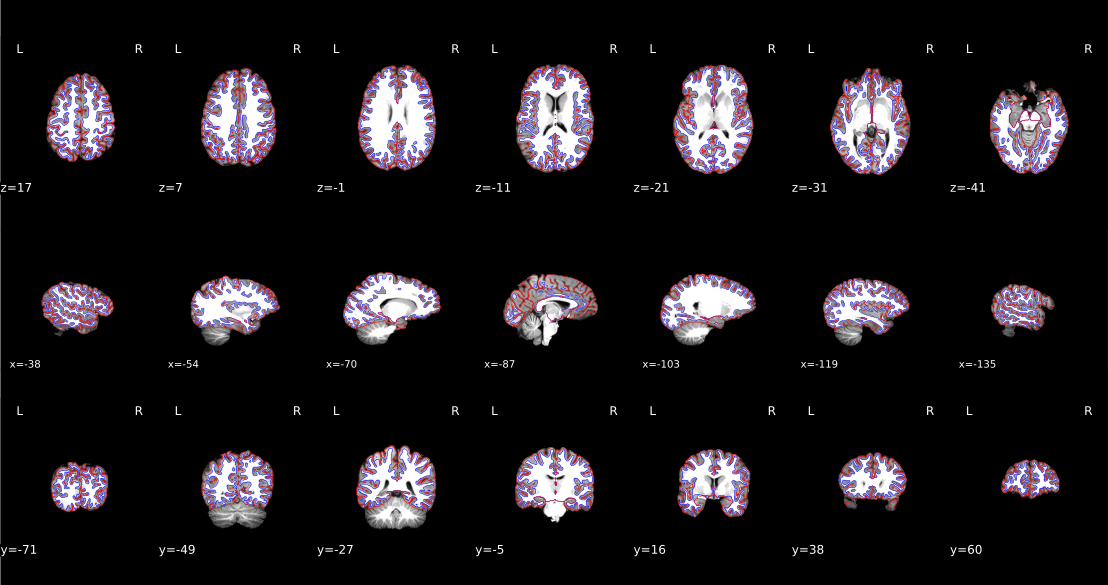

In [7]:
from IPython.core.display import SVG
SVG(filename='fmriprep-output/sub-08/figures/sub-08_desc-reconall_T1w.svg')

### EPI-space to T1-space

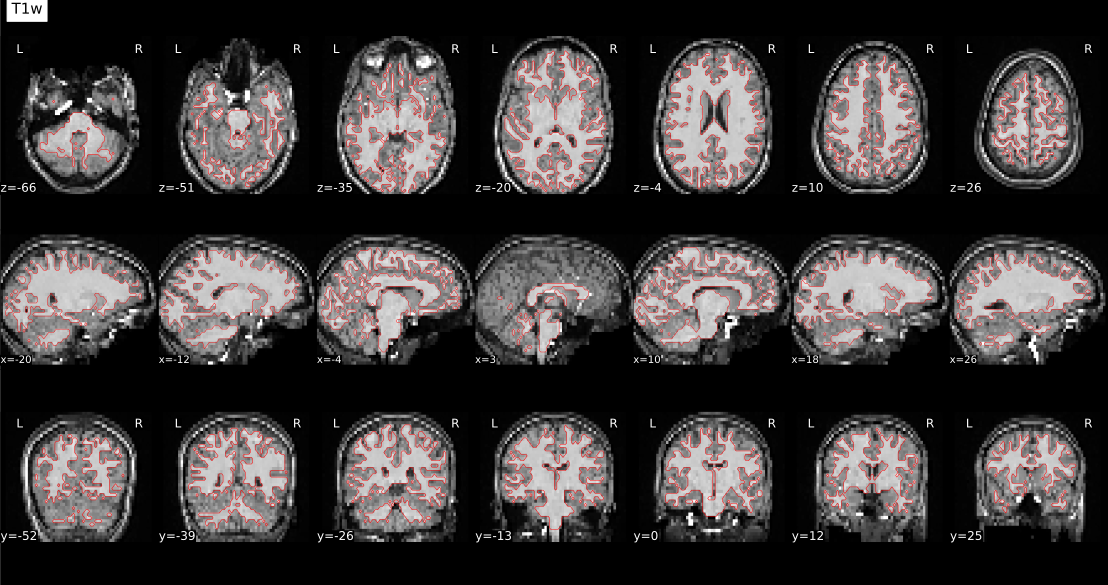

In [9]:
from IPython.core.display import SVG
SVG(filename='fmriprep-output/sub-08/figures/sub-08_task-flanker_run-1_desc-coreg_bold.svg')

## Brain mask and (anatomical/temporal) CompCor ROIs
Brain mask calculated on the BOLD signal (red contour), along with the regions of interest (ROIs) used for the estimation of physiological and movement confounding components that can be then used as nuisance regressors in analysis.
The anatomical CompCor ROI (magenta contour) is a mask combining CSF and WM (white-matter), where voxels containing a minimal partial volume of GM have been removed.
The temporal CompCor ROI (blue contour) contains the top 2% most variable voxels within the brain mask.
The brain edge (or crown) ROI (green contour) picks signals outside but close to the brain, which are decomposed into 24 principal components.

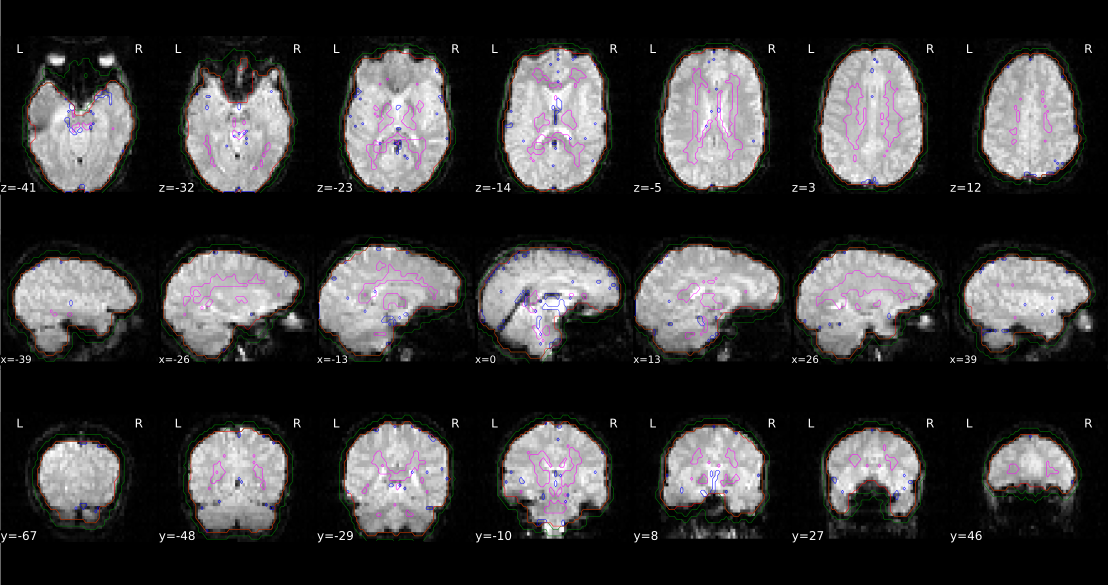

In [10]:
from IPython.core.display import SVG
SVG(filename='fmriprep-output/sub-08/figures/sub-08_task-flanker_run-1_desc-rois_bold.svg')

### Bold Summary
Summary statistics are plotted, which may reveal trends or artifacts in the BOLD data. Global signals calculated within the whole-brain (GS), within the white-matter (WM) and within cerebro-spinal fluid (CSF) show the mean BOLD signal in their corresponding masks. DVARS and FD show the standardized DVARS and framewise-displacement measures for each time point.
A carpet plot shows the time series for all voxels within the brain mask, or if --cifti-output was enabled, all grayordinates. Voxels are grouped into cortical (dark/light blue), and subcortical (orange) gray matter, cerebellum (green) and white matter and CSF (red), indicated by the color map on the left-hand side.

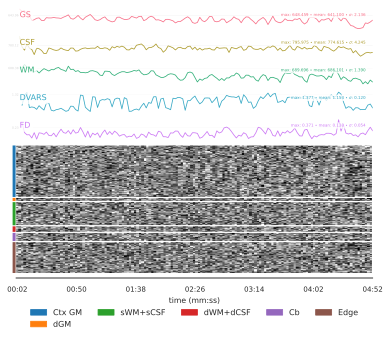

In [11]:
from IPython.core.display import SVG
SVG(filename='fmriprep-output/sub-08/figures/sub-08_task-flanker_run-1_desc-carpetplot_bold.svg')